In [1]:
# Import Packges 

import numpy as np
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import sklearn 
import sspa
import sspa.utils
import gseapy.plot as gp
import networkx
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import statsmodels.api as sm
import plotly.graph_objects as go
import plotly.express as px
import urllib.request
import statsmodels
import bioinfokit as bf
import networkx as nx
import math
import itertools 
import fancyimpute
from scipy.stats import hypergeom as hg
import textwrap
from itertools import chain

# Import and View Data

In [2]:
# Save data into variable ; name after authors; # Read CVS to important
# python 0 means the first thing, if you give it nothing it will give an index for you
# if it reads with pandas, it automatrically puts it into a pd.dataframe!! so you dont need to put it into a pandas data frame
su_data = pd.read_csv('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/COVID_datasets/Su_COVID_metabolomics_processed_ChEBI.csv',index_col=0) # Proccesed data
metabolite_names= pd.read_csv('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/COVID_datasets/name_map_goldman.csv', index_col=1, dtype="object") #dtype= "object" puts everything into a string or object type 
su_data_noscale = pd.read_csv('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/COVID_datasets/Su_data_processed_log2_noScaling.csv', index_col=0)

In [3]:
#Change column names in su_data to strings

su_data.columns = su_data.columns.astype(str) #astype is just named slightly differently than dtype; telling it to be a certin data type

In [4]:
# To View the data set
su_data

1372     16610     72665     27823     30915     37373  \
sample_id                                                                 
1004596     -0.822470  0.370169  0.537246  0.362243 -0.578361 -1.201938   
1008097      0.149291 -0.802638 -1.220563 -0.774417 -0.123663 -0.453530   
1008631      1.012771 -1.033291  0.145690  0.524050 -0.073503 -0.229649   
1012545     -0.979554 -0.395854  2.449097  0.866752 -0.354040 -0.345205   
1022407     -0.739817 -0.288710 -0.782552 -0.526128  0.288048  0.550284   
...               ...       ...       ...       ...       ...       ...   
INCOV135-BL -2.228940 -0.101002 -0.679609  0.000163  0.284214  0.734004   
INCOV136-BL -0.169748  1.599117  0.173275  0.046243 -0.470655  1.219268   
INCOV137-BL  0.317113  0.383352 -0.981562  0.857227 -1.462299  0.594609   
INCOV139-BL  0.856401  1.847067  1.837225  2.220553 -0.167827  0.148805   
INCOV142-BL -0.955167  2.240840 -1.548758 -1.160095 -1.424368  1.334007   

                16831    545959     17050     16359  ...    133693    133694  \
sample_id                                            ...                       
1004596     -1.195697 -0.253528  0.237192 -0.502347  ...  0.057068  0.228500   
1008097     -0.956306 -0.805678 -0.840364  0.320534  ...  0.565895  0.544281   
1008631      1.475643 -0.437623 -0.827898 -0.462676  ...  0.507601  1.009191   
1012545      0.057663 -0.306422 -0.908367 -0.533817  ... -0.091666  0.782065   
1022407     -0.550971 -0.640346 -0.833565 -0.451067  ...  0.233939  0.883763   
...               ...       ...       ...       ...  ...       ...       ...   
INCOV135-BL -0.041038 -0.210435  0.070459 -0.374044  ... -0.525115 -0.495566   
INCOV136-BL  0.504222  1.204577  2.016911  0.431724  ... -0.768909 -0.829643   
INCOV137-BL  0.561018 -0.709397  0.361510 -0.550916  ... -1.380566 -1.338709   
INCOV139-BL  0.901317  0.782439  2.592986 -0.374388  ... -1.104065 -1.005903   
INCOV142-BL -0.021600 -0.290402  2.540530 -0.508633  ... -1.316335 -1.294325   

                28036     28238     76341     89312     17861     89188  \
sample_id                                                                 
1004596     -0.546769 -0.587946 -0.175542 -0.693254 -1.201150  0.403074   
1008097     -0.053133 -0.048306 -0.920090 -1.434730 -0.475391  0.134784   
1008631      0.099614  0.508498 -1.272854  0.448616  1.207374 -0.637957   
1012545     -0.341433  1.612615  0.851680 -0.504009  0.084370 -0.279907   
1022407     -0.576132 -0.567979 -1.182109 -0.260231 -1.009292 -0.095161   
...               ...       ...       ...       ...       ...       ...   
INCOV135-BL -0.182214  0.714288 -0.265526 -0.151931  1.330576 -1.105986   
INCOV136-BL -0.247622 -1.579635  0.567450 -0.364475  1.220314 -0.755291   
INCOV137-BL  2.431694  0.961980  0.630608 -0.262134  0.475143 -1.235598   
INCOV139-BL  1.430243 -0.016018 -0.279534  1.291420 -1.179473  0.417561   
INCOV142-BL -0.292315 -0.281823 -0.788803  0.266498  1.055099 -0.409015   

             WHO_status           Group  
sample_id                                
1004596               0  Healthy Donor   
1008097               0  Healthy Donor   
1008631               0  Healthy Donor   
1012545               0  Healthy Donor   
1022407               0  Healthy Donor   
...                 ...             ...  
INCOV135-BL         1-2        COVID19   
INCOV136-BL         3-4        COVID19   
INCOV137-BL         5-7        COVID19   
INCOV139-BL         3-4        COVID19   
INCOV142-BL         5-7        COVID19   

[263 rows x 335 columns]

In [5]:
# Metabolite names
metabolite_names

Query  \
Match                                                                           
(S)-1-Pyrroline-5-carboxylate                     S-1-pyrroline-5-carboxylate   
Spermidine                                                         spermidine   
1-Methylnicotimide                                         1-methylnicotimide   
12,13-DHOME                                                      12,13-DiHOME   
5-Hydroxyindoleacetic acid                             5-hydroxyindoleacetate   
...                                                                       ...   
NaN                            bilirubin degradation product, C17H20N2O5 (2)*   
NaN                                            tetrahydrocortisol glucuronide   
NaN                                                      N,N-dimethyl-pro-pro   
NaN                                                          oxindolylalanine   
NaN                                       tetrahydrocortisone glucuronide (5)   

                                      HMDB   PubChem  ChEBI    KEGG METLIN  \
Match                                                                        
(S)-1-Pyrroline-5-carboxylate  HMDB0001301      1196   1372  C03912   6145   
Spermidine                     HMDB0001257      1102  16610  C00315    254   
1-Methylnicotimide             HMDB0000699       457  16797  C02918   5667   
12,13-DHOME                    HMDB0004705  10236635  72665  C14829    NaN   
5-Hydroxyindoleacetic acid     HMDB0000763      1826  27823  C05635   2975   
...                                    ...       ...    ...     ...    ...   
NaN                                    NaN       NaN    NaN     NaN    NaN   
NaN                                    NaN       NaN    NaN     NaN    NaN   
NaN                                    NaN       NaN    NaN     NaN    NaN   
NaN                                    NaN       NaN    NaN     NaN    NaN   
NaN                                    NaN       NaN    NaN     NaN    NaN   

                                                         SMILES Comment  
Match                                                                    
(S)-1-Pyrroline-5-carboxylate                    OC(=O)C1CCC=N1       1  
Spermidine                                           NCCCCNCCCN       1  
1-Methylnicotimide                      C[N+]1=CC=CC(=C1)C(N)=O       1  
12,13-DHOME                    CCCCCC(C(C/C=C\CCCCCCCC(=O)O)O)O       1  
5-Hydroxyindoleacetic acid          OC(=O)CC1=CNC2=C1C=C(O)C=C2       1  
...                                                         ...     ...  
NaN                                                         NaN       0  
NaN                                                         NaN       0  
NaN                                                         NaN       0  
NaN                                                         NaN       0  
NaN                                                         NaN       0  

[1050 rows x 8 columns]

In [6]:
# Data without scaling, but in log2 scaling
su_data_noscale

S-1-pyrroline-5-carboxylate  spermidine  1-methylnicotinamide  \
sample_id                                                                    
1004596                         7.657694    7.665769              7.658361   
1008097                         7.660317    7.657277              7.661416   
1008631                         7.659930    7.655047              7.656607   
1012545                         7.656430    7.659101              7.670022   
1022407                         7.657112    7.659885              7.663053   
...                                  ...         ...                   ...   
INCOV135-BL                     7.653604    7.659427              7.670032   
INCOV136-BL                     7.657283    7.668458              7.656762   
INCOV137-BL                     7.659720    7.663594              7.660417   
INCOV139-BL                     7.664123    7.680337              7.655413   
INCOV142-BL                     7.656896    7.679491              7.663510   

             12,13-DiHOME  5-hydroxyindoleacetate  alpha-ketoglutarate  \
sample_id                                                                
1004596          7.663724                7.662524             7.659351   
1008097          7.654588                7.656945             7.659964   
1008631          7.658435                7.659815             7.658102   
1012545          7.672565                7.663384             7.658803   
1022407          7.656197                7.656771             7.660914   
...                   ...                     ...                  ...   
INCOV135-BL      7.657884                7.658987             7.659366   
INCOV136-BL      7.659727                7.656360             7.657333   
INCOV137-BL      7.657807                7.667506             7.655919   
INCOV139-BL      7.673686                7.676436             7.661462   
INCOV142-BL      7.653573                7.656799             7.656398   

             kynurenate  3-hydroxyisobutyrate  3-hydroxy-3-methylglutarate  \
sample_id                                                                    
1004596        7.658413              7.655469                     7.657311   
1008097        7.658863              7.659660                     7.657668   
1008631        7.657036              7.658859                     7.664783   
1012545        7.659934              7.659837                     7.661251   
1022407        7.660706              7.666113                     7.658980   
...                 ...                   ...                          ...   
INCOV135-BL    7.662501              7.664797                     7.659496   
INCOV136-BL    7.656137              7.667457                     7.661209   
INCOV137-BL    7.676821              7.666012                     7.663399   
INCOV139-BL    7.659901              7.666204                     7.668860   
INCOV142-BL    7.666955              7.673558                     7.661745   

             homovanillate (HVA)  ...  \
sample_id                         ...   
1004596                 7.660632  ...   
1008097                 7.658967  ...   
1008631                 7.657067  ...   
1012545                 7.658515  ...   
1022407                 7.657739  ...   
...                          ...  ...   
INCOV135-BL             7.658349  ...   
INCOV136-BL             7.664035  ...   
INCOV137-BL             7.656924  ...   
INCOV139-BL             7.668751  ...   
INCOV142-BL             7.661262  ...   

             bilirubin degradation product, C17H18N2O4 (2)**  \
sample_id                                                      
1004596                                             7.659787   
1008097                                             7.659144   
1008631                                             7.659020   
1012545                                             7.661435   
1022407                                             7.662721   
...                                   

In [7]:
# Replace ChEBI with metabolite names

# Step 1 Convert metabolite names into a dictionary

# Chebi to me keys, names ot be values
list1 = metabolite_names.index
list2 = metabolite_names["ChEBI"] 

# Make a dictionary with two lists 
ChEBI_dict = dict(zip(list2, list1)) # zip is a way of pulling two lists together (need to be same length) and put it into a tupple (pair of things)

In [8]:
#Step 2 Rename the ChEBI ID names with the metabolite names

su_data_met_names = su_data.rename(mapper=ChEBI_dict, axis=1, errors='ignore') # axis =1 because you want to replace columns
#mapper is the data structure you're giving it ; contains the coulmn names and what you want it mapped to; use diction

/var/folders/yq/6fgvx0fj0cs57zmqydzbhbfh0000gn/T/ipykernel_5491/2104761457.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_set=su_data_met_names.mean()


Text(0, 0.5, 'Frequency')

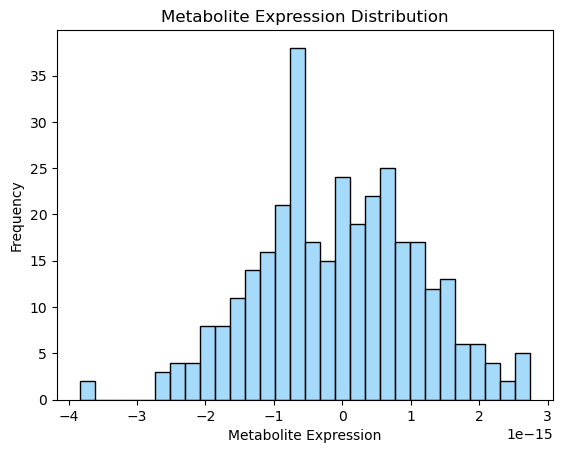

In [9]:
# Distribution of metabolite
data_set=su_data_met_names.mean()
sns.histplot(data=data_set, bins = 30, color = 'lightskyblue', edgecolor = 'black')
plt.title("Metabolite Expression Distribution")
plt.xlabel("Metabolite Expression")
plt.ylabel("Frequency")

In [10]:
# Understanding shape and thus the dimensions of the data frame
print(su_data.shape)
print(su_data.shape[0]) # Rows (in this case, samples IDs)
print(su_data.shape[1]) # Column (in this case, metabolites)

(263, 335)
263
335


In [11]:
# View metdata info
su_data['Group'].value_counts()

Healthy Donor     133
COVID19           130
Name: Group, dtype: int64

In [12]:
# View metdata info
su_data['WHO_status'].value_counts()

0      133
3-4     57
1-2     45
5-7     28
Name: WHO_status, dtype: int64

In [13]:
#Average each WHO status for each metabolite

su_mean_WHO_status = su_data_met_names.groupby(by="WHO_status").mean()
su_mean_WHO_status

(S)-1-Pyrroline-5-carboxylate  Spermidine  12,13-DHOME  \
WHO_status                                                           
0                               -0.027995   -0.388844    -0.085903   
1-2                              0.231394    0.688543     0.555999   
3-4                             -0.309747    0.330401    -0.288059   
5-7                              0.391647    0.067820     0.100874   

            5-Hydroxyindoleacetic acid  Oxoglutaric acid  \
WHO_status                                                 
0                             0.077084         -0.223524   
1-2                           0.373222         -0.213624   
3-4                          -0.263853          0.602062   
5-7                          -0.428842          0.179435   

            (S)-3-Hydroxyisobutyric acid  3-Hydroxymethylglutaric acid  \
WHO_status                                                               
0                              -0.357534                     -0.471480   
1-2                            -0.373944                      0.297518   
3-4                             0.723986                      0.607829   
5-7                             0.825437                      0.524008   

            Homovanillic acid  3-Phosphoglyceric acid  Cholic acid  ...  \
WHO_status                                                          ...   
0                   -0.251939               -0.543787    -0.009554  ...   
1-2                  0.222624                1.121942    -0.149511  ...   
3-4                  0.386637                0.309430     0.185543  ...   
5-7                  0.051837                0.149957    -0.092048  ...   

            Linoleoyl ethanolamide  Palmitoylcholine  Oleoylcholine  \
WHO_status                                                            
0                        -0.462136          0.031576      -0.016535   
1-2                      -0.343507          0.155239       0.204634   
3-4                       0.701928         -0.285765      -0.326927   
5-7                       1.318287          0.182257       0.415195   

            Arachidonoylcholine  4-Hydroxyphenylacetylglutamine  \
WHO_status                                                        
0                      0.120369                       -0.236338   
1-2                    0.045123                       -0.208055   
3-4                   -0.316153                        0.440754   
5-7                   -0.000676                        0.559729   

            1H-Indole-3-carboxaldehyde  3-Amino-2-piperidone  \
WHO_status                                                     
0                             0.314219             -0.150523   
1-2                           0.018674             -0.252575   
3-4                          -0.288076              0.255061   
5-7                          -0.936111              0.601677   

            2-Hydroxydecanedioic acid  4-Chlorobenzoate  \
WHO_status                                                
0                           -0.271010         -0.155870   
1-2                          0.474304         -0.578254   
3-4                          0.334834          0.473823   
5-7                         -0.156605          0.705152   

            2,4-Di-tert-butylphenol  
WHO_status                           
0                          0.246147  
1-2                        0.190689  
3-4                       -0.607421  
5-7                       -0.239129  

[4 rows x 333 columns]

In [14]:
#Average each Group  for each metabolite

su_mean_Group =su_data_met_names.groupby(by="Group").mean()
su_mean_Group

(S)-1-Pyrroline-5-carboxylate  Spermidine  12,13-DHOME  \
Group                                                                    
COVID19                              0.028641    0.397817     0.087885   
Healthy Donor                       -0.027995   -0.388844    -0.085903   

                5-Hydroxyindoleacetic acid  Oxoglutaric acid  \
Group                                                          
COVID19                          -0.078863          0.228682   
Healthy Donor                     0.077084         -0.223524   

                (S)-3-Hydroxyisobutyric acid  3-Hydroxymethylglutaric acid  \
Group                                                                        
COVID19                             0.365784                       0.48236   
Healthy Donor                      -0.357534                      -0.47148   

                Homovanillic acid  3-Phosphoglyceric acid  Cholic acid  ...  \
Group                                                                   ...   
COVID19                  0.257753                0.556336     0.009774  ...   
Healthy Donor           -0.251939               -0.543787    -0.009554  ...   

                Linoleoyl ethanolamide  Palmitoylcholine  Oleoylcholine  \
Group                                                                     
COVID19                       0.472801         -0.032305       0.016917   
Healthy Donor                -0.462136          0.031576      -0.016535   

                Arachidonoylcholine  4-Hydroxyphenylacetylglutamine  \
Group                                                                 
COVID19                   -0.123147                        0.241792   
Healthy Donor              0.120369                       -0.236338   

                1H-Indole-3-carboxaldehyde  3-Amino-2-piperidone  \
Group                                                              
COVID19                          -0.321470              0.153996   
Healthy Donor                     0.314219             -0.150523   

                2-Hydroxydecanedioic acid  4-Chlorobenzoate  \
Group                                                         
COVID19                          0.277264          0.159467   
Healthy Donor                   -0.271010         -0.155870   

                2,4-Di-tert-butylphenol  
Group                                    
COVID19                       -0.251828  
Healthy Donor                  0.246147  

[2 rows x 333 columns]

# Making boxplots

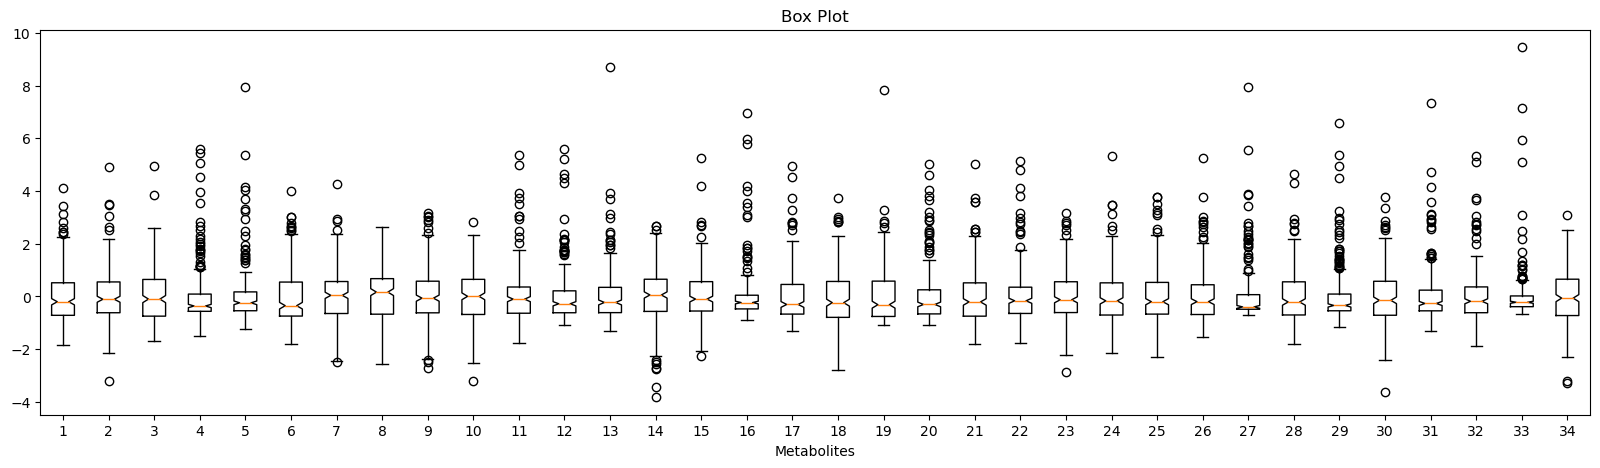

In [15]:
#Boxplot of metabolites
# [start : end : stepsize]

#Boxplot needs the input to be an array in matplotlib.pyplot
su_array=np.array(su_data)
su_df=pd.DataFrame(su_data)

plt.figure(figsize=(20,5))
plt.boxplot(su_df.iloc[:,1::10], notch= True) # notch = True gives the little indent
plt.title("Box Plot")
plt.xlabel("Metabolites")

plt.show()


# #How do I add labels if I wanted to see what the metabolites were? I know it says labels= sequence, but I dont know what that means in code
    # 2 days to do it - if youre using a data frame to plot them it will do it automattically, otherwise you have to add them manually - plot.plt.labels command 

## When using an array you can index doing [:::], but if using a data frame you need to put .iloc[:::]

# iloc - takes the index and give the numbers of where it appears in the frame
# for loc, you need to tell it the label name; use loc when you want specific things that you tell it by name

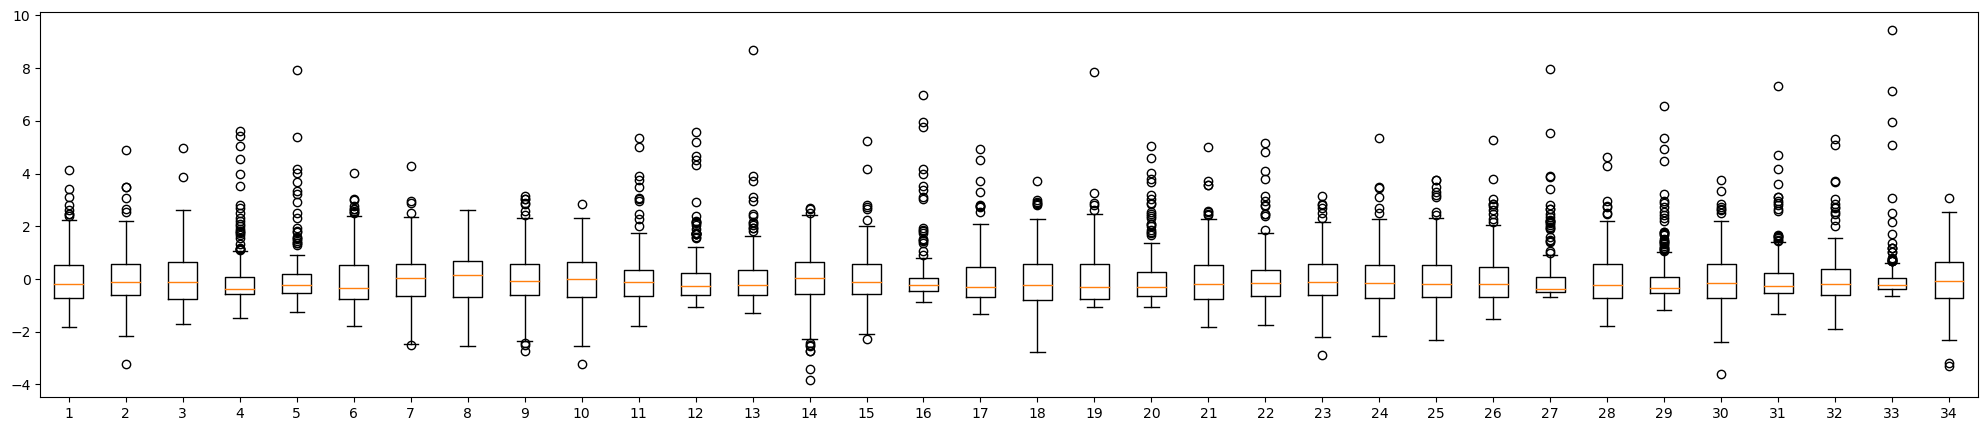

In [16]:
#Filter the data so only looking at a subset of metabolites
su_data_filt = su_data.iloc[:, 1::10]
su_data_filt

plt.figure(figsize=(25,5))
plt.boxplot(su_data_filt)
#plt.savefig('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Plots_COVID/boxplot.png', dpi= 300, bbox_inches='tight')
plt.show()
#matlab doesnt infer data name/labels so try using a different package (like Seaborn)

In [17]:
# Understanding shape and thus the dimensions of the data frame - in this case its the shrunken version of the data
print(su_data_filt.shape)
print(su_data_filt.shape[0]) # Rows
print(su_data_filt.shape[1]) # Column

(263, 34)
263
34


# Making heatmaps

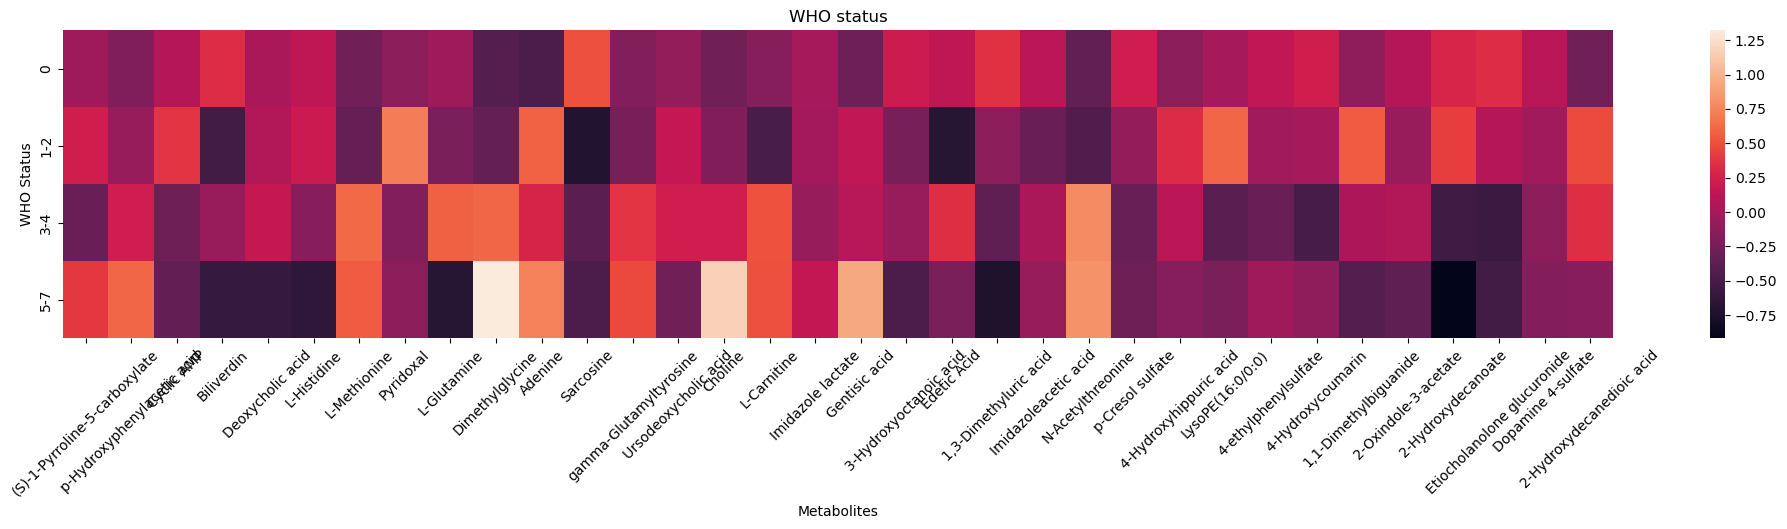

In [18]:
# Making a heatmap - WHO status
plt.figure(figsize=(25,4))

sns.heatmap(su_mean_WHO_status.iloc[:,::10], cmap="rocket",)
plt.title("WHO status")
plt.xlabel("Metabolites")
plt.ylabel("WHO Status")
plt.xticks(rotation=45)

plt.show()


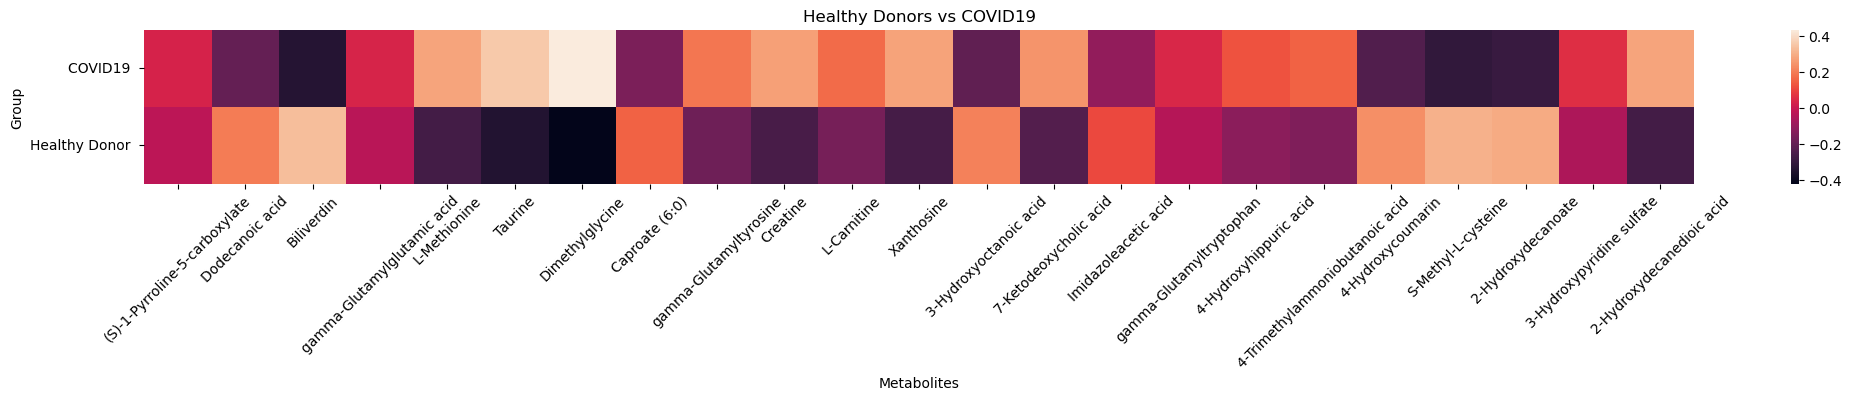

In [19]:
# Making a heatmap - Group
plt.figure(figsize=(25,2))

sns.heatmap(su_mean_Group.iloc[:,::15], cmap="rocket")

##Have to put labels below the plot
plt.title("Healthy Donors vs COVID19")
plt.xlabel("Metabolites")
plt.ylabel("Group")
plt.xticks(rotation=45) # Need to put this after of plotting the data for heatmaps


plt.show()

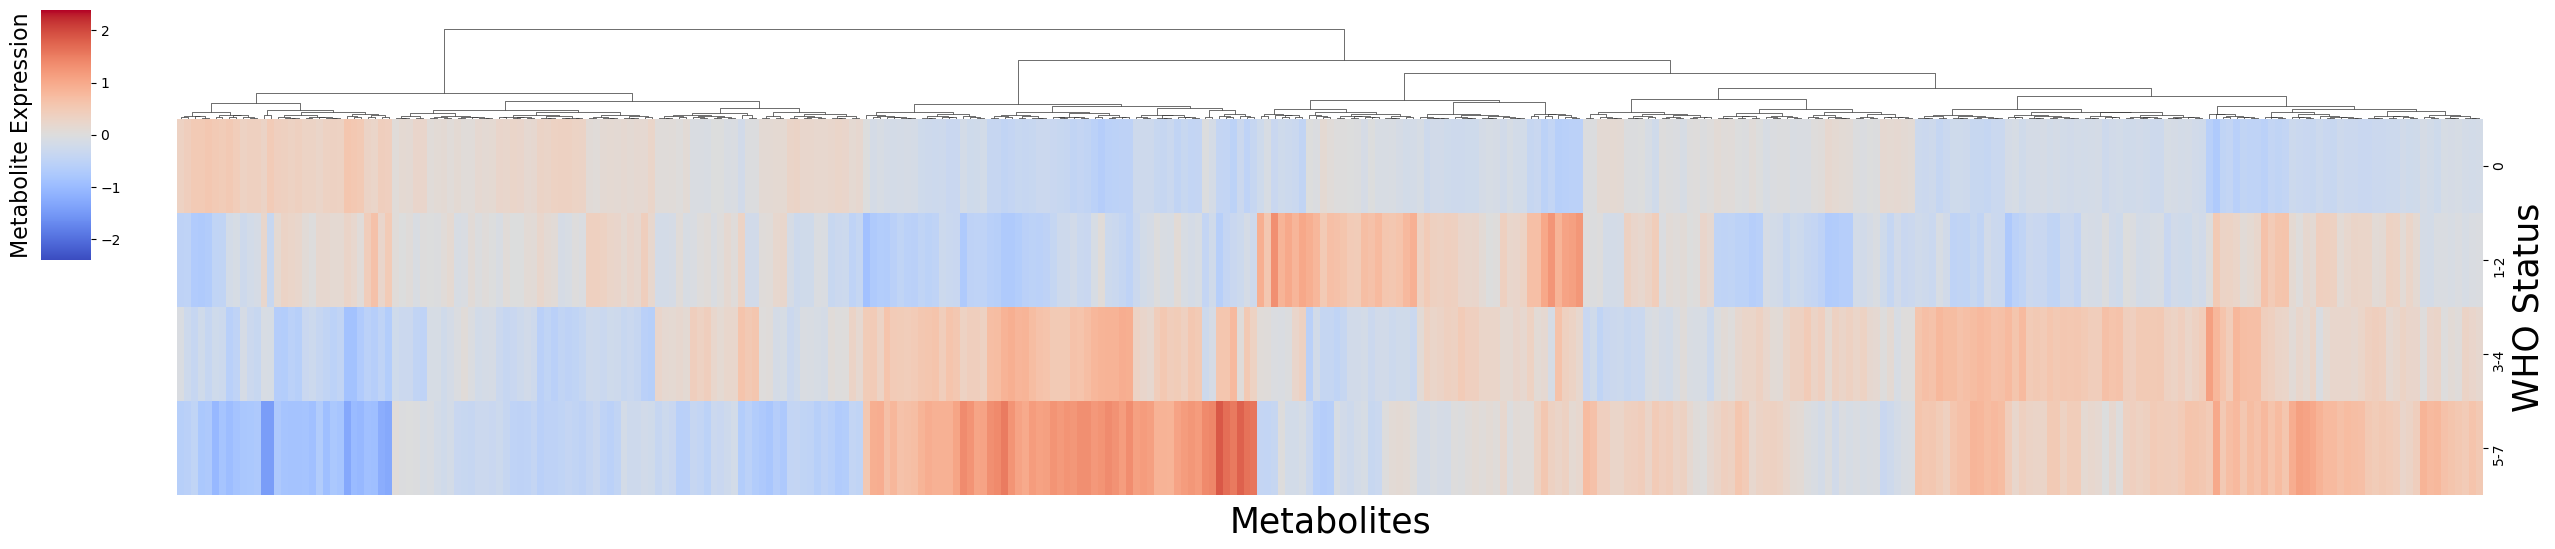

In [20]:
# Cluster heatmap
g_who = sns.clustermap(su_mean_WHO_status, cmap="coolwarm", method = 'ward', xticklabels = False, figsize=(25, 5), row_cluster=False,
    dendrogram_ratio=(0.05, .2), cbar_pos=(0, .5, .02, .5), vmin=-2.4, vmax=2.4)

g_who.ax_heatmap.set_xlabel("Metabolites", fontsize=25)
g_who.ax_heatmap.set_ylabel("WHO Status", fontsize=25)
g_who.ax_cbar.set_ylabel("Metabolite Expression",size=16, labelpad=-80)

plt.show()

# Making violin plots

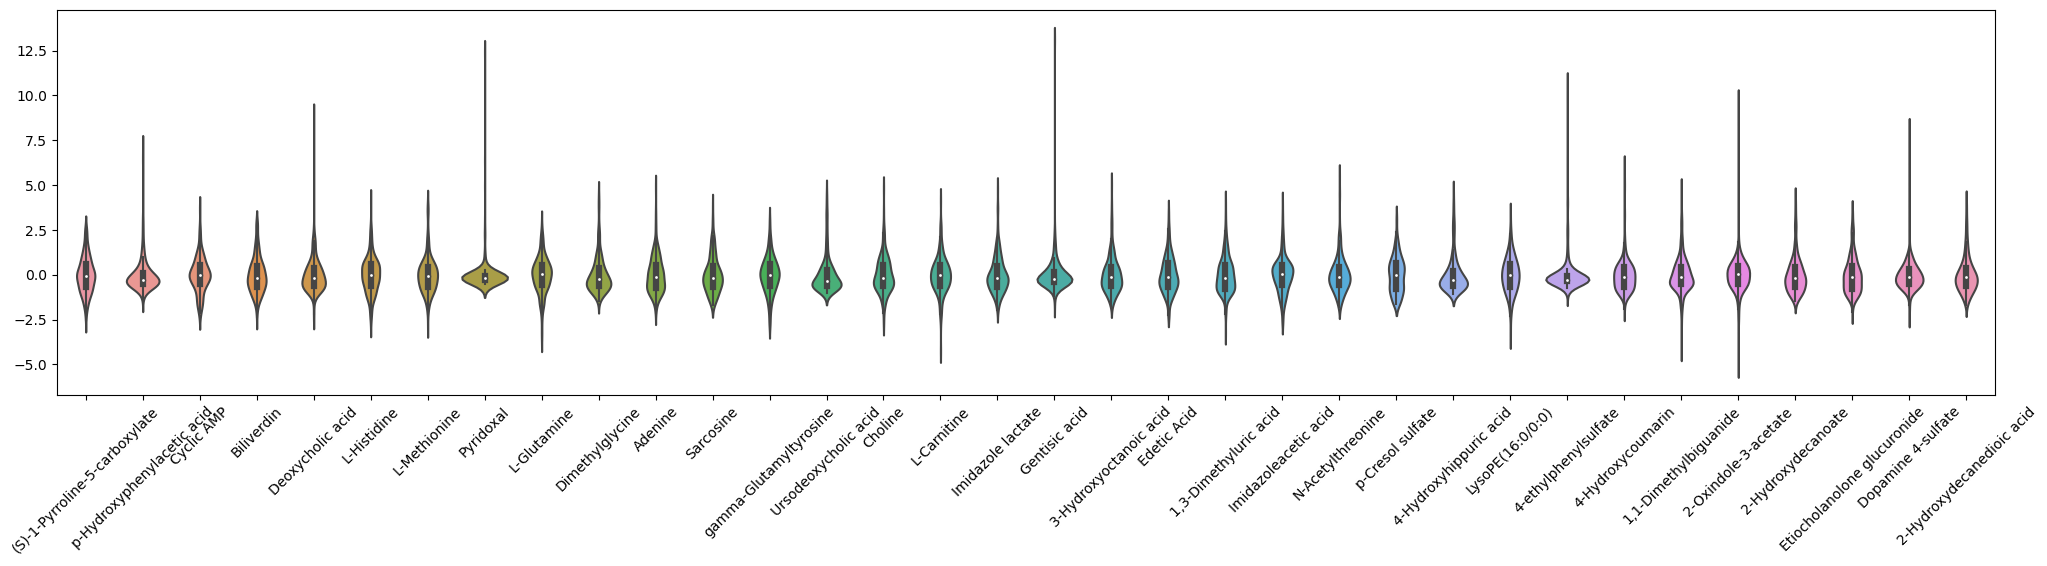

In [21]:
# Violin Plot

plt.figure(figsize=(25,5))
plt.xticks(rotation=45) # Need to put this ahead of plotting the data for violin plots
sns.violinplot(data=su_data_met_names.iloc[:,::10])
plt.show()


In [22]:
# Converting wide into long so that I can look at multiple metabolites at a time

su_data_long = pd.melt(su_data_met_names.iloc[:,:-2], ignore_index= False) #melt gets rid of your index

# first coulmn is .index
# first row is .column

#Make lists to combine into a new dictionary
list_ID = su_data_met_names.index
list_Group = su_data_met_names["Group"] 
list_WHO = su_data_met_names["WHO_status"]

# Make a dictionary with two lists 
dict_group = dict(zip(list_ID, list_Group)) # zip is a way of pulling two lists together (need to be same length) and put it into a tupple (pair of things)
dict_WHO = dict(zip(list_ID, list_WHO))
## when using more than 2, use merge instead of zip because is faster and more efficent 


su_data_long['Group'] = su_data_long.index.map(dict_group) #puts in a new column based on a a mapper and use d a dictionary that will map the group column to the index which is the sample IDs - mapper is replaced with dictionary sample ID and group 
su_data_long['WHO_status'] = su_data_long.index.map(dict_WHO) #puts a new column of WHO status 

# Look at type of data the columns are
print(su_data_long.dtypes)

# Look at data after its been converted to long form
su_data_long

variable       object
value         float64
Group          object
WHO_status     object
dtype: object


variable     value           Group  \
sample_id                                                              
1004596      (S)-1-Pyrroline-5-carboxylate -0.822470  Healthy Donor    
1008097      (S)-1-Pyrroline-5-carboxylate  0.149291  Healthy Donor    
1008631      (S)-1-Pyrroline-5-carboxylate  1.012771  Healthy Donor    
1012545      (S)-1-Pyrroline-5-carboxylate -0.979554  Healthy Donor    
1022407      (S)-1-Pyrroline-5-carboxylate -0.739817  Healthy Donor    
...                                    ...       ...             ...   
INCOV135-BL        2,4-Di-tert-butylphenol -1.105986        COVID19    
INCOV136-BL        2,4-Di-tert-butylphenol -0.755291        COVID19    
INCOV137-BL        2,4-Di-tert-butylphenol -1.235598        COVID19    
INCOV139-BL        2,4-Di-tert-butylphenol  0.417561        COVID19    
INCOV142-BL        2,4-Di-tert-butylphenol -0.409015        COVID19    

            WHO_status  
sample_id               
1004596              0  
1008097              0  
1008631              0  
1012545              0  
1022407              0  
...                ...  
INCOV135-BL        1-2  
INCOV136-BL        3-4  
INCOV137-BL        5-7  
INCOV139-BL        3-4  
INCOV142-BL        5-7  

[87579 rows x 4 columns]

In [23]:
# Filter data so not viewing every metabolite

#Boolean mask - What is a boolean mask? Pandas provides a feature called Boolean Masks that let's you filter DataFrames based on conditions, can filter 
su_data_long_filt = su_data_long[su_data_long.variable.isin(su_data_met_names.columns[0:10])]

Text(0, 0.5, 'Value')

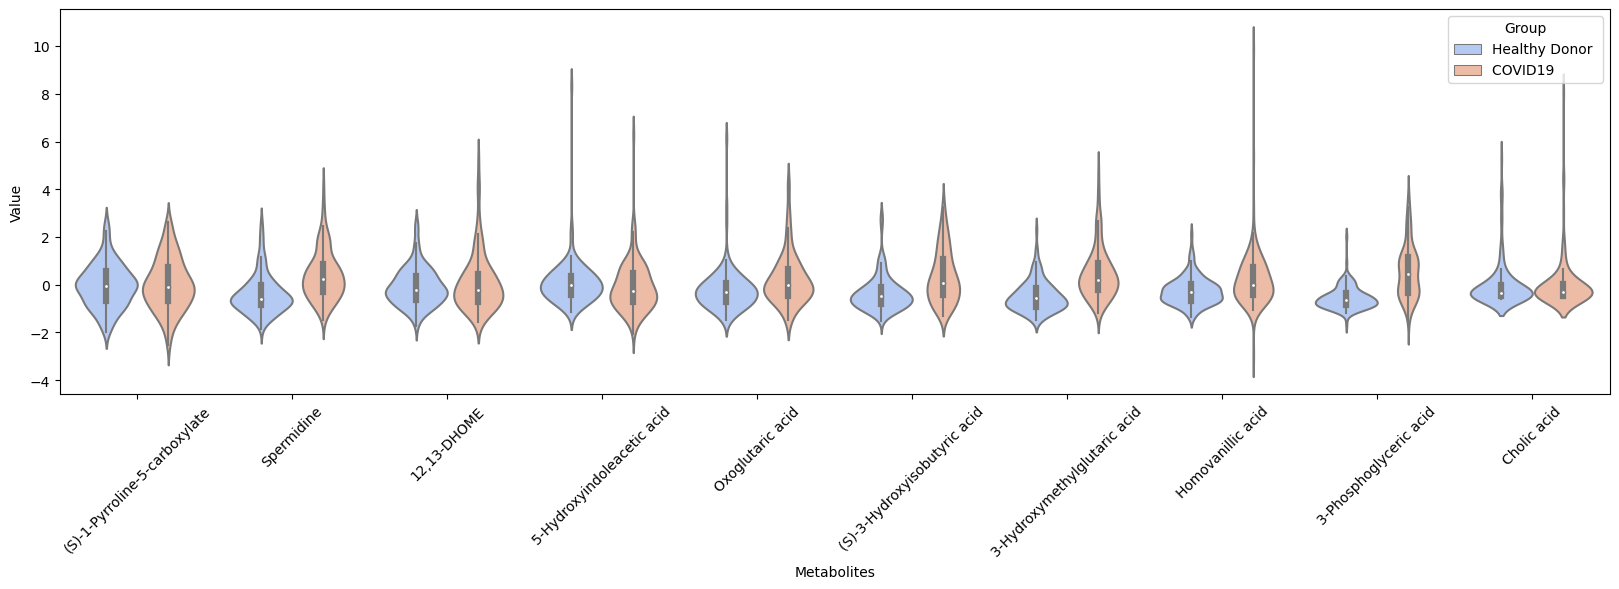

In [24]:
# Group Violin plot

#Plot dimensions
plt.figure(figsize=(20,5)) # has to be above the graph


#Making the violin plot
plt.xticks(rotation=45)
sns.violinplot(data=su_data_long_filt, x = 'variable' , y= 'value',  hue= "Group", palette = "coolwarm")

# Labels
plt.xlabel("Metabolites") # Has to be below
plt.ylabel("Value")

# Save plots
#plt.savefig('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Plots_COVID/Violin_plot_Group.png', dpi= 300, bbox_inches='tight')


Text(0, 0.5, 'Value')

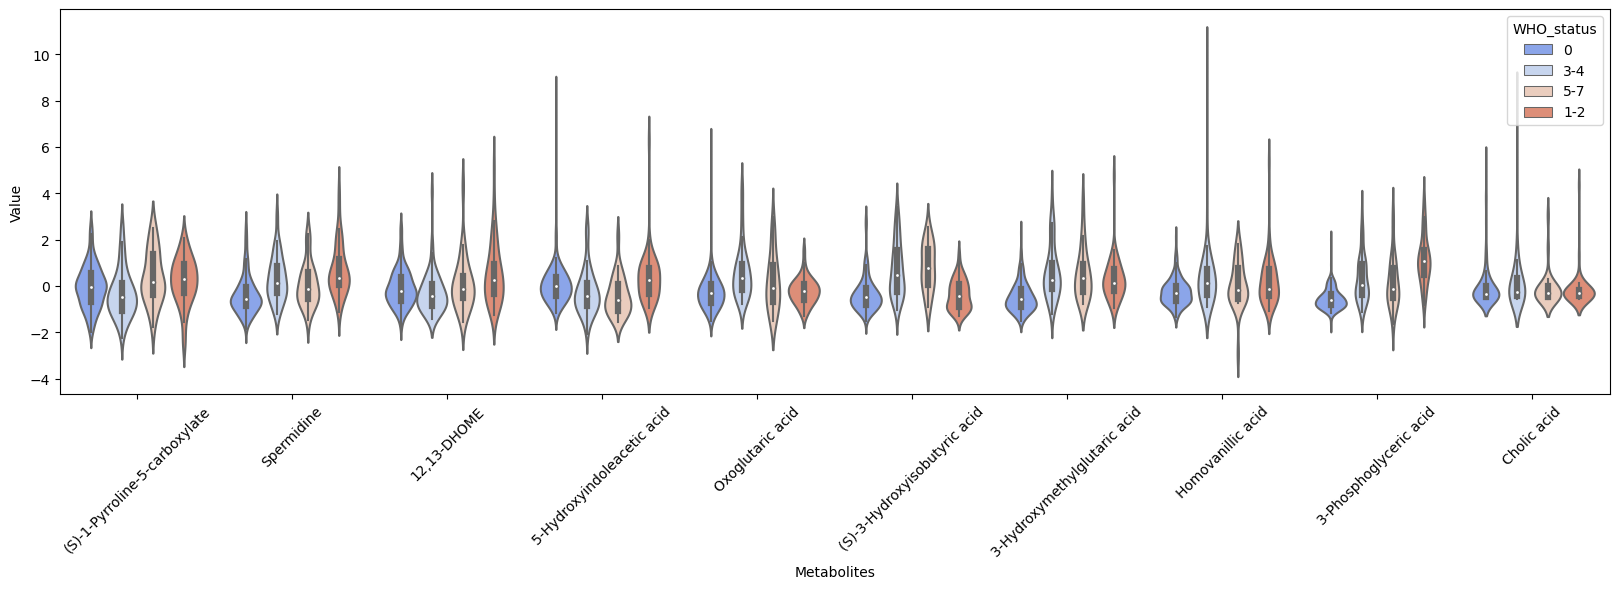

In [25]:
# WHO Status Violin Plot 
#Plot dimensions
plt.figure(figsize=(20,5)) # has to be above the graph


#Making the violin plot
plt.xticks(rotation=45)
sns.violinplot(data=su_data_long_filt, x = 'variable' , y= 'value',  hue= "WHO_status", palette = "coolwarm")

# Labels
plt.xlabel("Metabolites") # Has to be below
plt.ylabel("Value")

# Save figure
#plt.savefig('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Plots_COVID/Violin_plot_WHO_status.png', dpi= 300, bbox_inches='tight')

# Viewing Data

In [26]:
#Keep only metabolites so we can run PCA (removeing the metadata); PCA plots can only take integers so need to remove strings
#[:] means keep all rows; :-2 means keep columns from 0 to the 3rd to last- removing the last to columns which in this case matters because they are strings
su_data_metabolites = su_data.iloc[:, :-2]


In [27]:
#Look at whats su_data_metabolites
su_data_metabolites

1372     16610     72665     27823     30915     37373  \
sample_id                                                                 
1004596     -0.822470  0.370169  0.537246  0.362243 -0.578361 -1.201938   
1008097      0.149291 -0.802638 -1.220563 -0.774417 -0.123663 -0.453530   
1008631      1.012771 -1.033291  0.145690  0.524050 -0.073503 -0.229649   
1012545     -0.979554 -0.395854  2.449097  0.866752 -0.354040 -0.345205   
1022407     -0.739817 -0.288710 -0.782552 -0.526128  0.288048  0.550284   
...               ...       ...       ...       ...       ...       ...   
INCOV135-BL -2.228940 -0.101002 -0.679609  0.000163  0.284214  0.734004   
INCOV136-BL -0.169748  1.599117  0.173275  0.046243 -0.470655  1.219268   
INCOV137-BL  0.317113  0.383352 -0.981562  0.857227 -1.462299  0.594609   
INCOV139-BL  0.856401  1.847067  1.837225  2.220553 -0.167827  0.148805   
INCOV142-BL -0.955167  2.240840 -1.548758 -1.160095 -1.424368  1.334007   

                16831    545959     17050     16359  ...     64032    133677  \
sample_id                                            ...                       
1004596     -1.195697 -0.253528  0.237192 -0.502347  ...  0.481654  0.125720   
1008097     -0.956306 -0.805678 -0.840364  0.320534  ... -0.917883  0.741096   
1008631      1.475643 -0.437623 -0.827898 -0.462676  ... -0.747197  0.529527   
1012545      0.057663 -0.306422 -0.908367 -0.533817  ...  0.075265 -0.288374   
1022407     -0.550971 -0.640346 -0.833565 -0.451067  ... -0.436802  0.594955   
...               ...       ...       ...       ...  ...       ...       ...   
INCOV135-BL -0.041038 -0.210435  0.070459 -0.374044  ... -0.519903 -0.485733   
INCOV136-BL  0.504222  1.204577  2.016911  0.431724  ...  0.466086 -0.633350   
INCOV137-BL  0.561018 -0.709397  0.361510 -0.550916  ... -0.478024 -1.539176   
INCOV139-BL  0.901317  0.782439  2.592986 -0.374388  ...  0.656113 -1.152791   
INCOV142-BL -0.021600 -0.290402  2.540530 -0.508633  ...  0.601246 -1.430479   

               133693    133694     28036     28238     76341     89312  \
sample_id                                                                 
1004596      0.057068  0.228500 -0.546769 -0.587946 -0.175542 -0.693254   
1008097      0.565895  0.544281 -0.053133 -0.048306 -0.920090 -1.434730   
1008631      0.507601  1.009191  0.099614  0.508498 -1.272854  0.448616   
1012545     -0.091666  0.782065 -0.341433  1.612615  0.851680 -0.504009   
1022407      0.233939  0.883763 -0.576132 -0.567979 -1.182109 -0.260231   
...               ...       ...       ...       ...       ...       ...   
INCOV135-BL -0.525115 -0.495566 -0.182214  0.714288 -0.265526 -0.151931   
INCOV136-BL -0.768909 -0.829643 -0.247622 -1.579635  0.567450 -0.364475   
INCOV137-BL -1.380566 -1.338709  2.431694  0.961980  0.630608 -0.262134   
INCOV139-BL -1.104065 -1.005903  1.430243 -0.016018 -0.279534  1.291420   
INCOV142-BL -1.316335 -1.294325 -0.292315 -0.281823 -0.788803  0.266498   

                17861     89188  
sample_id                        
1004596     -1.201150  0.403074  
1008097     -0.475391  0.134784  
1008631      1.207374 -0.637957  
1012545      0.084370 -0.279907  
1022407     -1.009292 -0.095161  
...               ...       ...  
INCOV135-BL  1.330576 -1.105986  
INCOV136-BL  1.220314 -0.755291  
INCOV137-BL  0.475143 -1.235598  
INCOV139-BL -1.179473  0.417561  
INCOV142-BL  1.055099 -0.409015  

[263 rows x 333 columns]

# PCA analysis

In [28]:
# To do PCA plots
from sklearn.decomposition import PCA
pca1 = PCA(n_components=5).fit_transform(su_data_metabolites)
pca1


array([[-6.70905582,  1.07459116,  2.01243762,  1.04367128, -0.39545735],
       [-5.65953578, -2.18503683,  0.20932044, -3.30138167,  2.71753469],
       [-3.82682786,  3.66488145,  5.08883678, -2.06234054,  0.28726628],
       ...,
       [ 8.9807321 , 10.7404149 ,  3.65210936, -4.53294095, -5.01401105],
       [ 0.42635051,  7.07990313, -3.24192214,  5.1354528 , -5.76421374],
       [ 9.96210221, -4.16948344, -4.81243123,  2.26960952, -2.40383049]])

In [29]:
#Scatterplot using seaborn
df = pd.DataFrame(data = pca1, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=su_data.index)
df

PC1        PC2       PC3       PC4       PC5
sample_id                                                     
1004596     -6.709056   1.074591  2.012438  1.043671 -0.395457
1008097     -5.659536  -2.185037  0.209320 -3.301382  2.717535
1008631     -3.826828   3.664881  5.088837 -2.062341  0.287266
1012545     -6.220486   0.173996  2.802701 -3.420435 -0.810308
1022407     -4.229942  -5.356346  2.327520  1.261946  0.159914
...               ...        ...       ...       ...       ...
INCOV135-BL  1.859933  -3.178313 -1.568337 -3.929738 -3.047134
INCOV136-BL  6.788054  -1.691607 -8.954958  2.042842 -4.812846
INCOV137-BL  8.980732  10.740415  3.652109 -4.532941 -5.014011
INCOV139-BL  0.426351   7.079903 -3.241922  5.135453 -5.764214
INCOV142-BL  9.962102  -4.169483 -4.812431  2.269610 -2.403830

[263 rows x 5 columns]

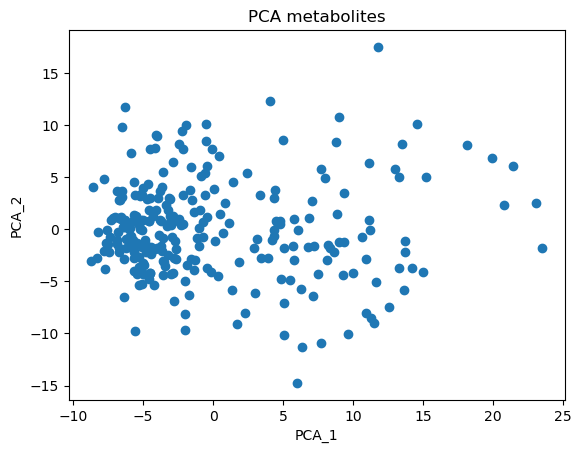

In [30]:
# Make scatter plot

plt.title("PCA metabolites")
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.scatter(df.PC1, df.PC2)

In [31]:
# df.head print the first 5 rows of the data frame so you can see the start of it
df.head()

PC1       PC2       PC3       PC4       PC5
sample_id                                                  
1004596   -6.709056  1.074591  2.012438  1.043671 -0.395457
1008097   -5.659536 -2.185037  0.209320 -3.301382  2.717535
1008631   -3.826828  3.664881  5.088837 -2.062341  0.287266
1012545   -6.220486  0.173996  2.802701 -3.420435 -0.810308
1022407   -4.229942 -5.356346  2.327520  1.261946  0.159914

In [32]:
#df.shape will tell you the shape of the data frame - works with 
#su_data.shape will tell you the number of row and number of columns in the data
df.shape, su_data.shape

((263, 5), (263, 335))

In [33]:
su_data.head()
#the row index is sample_id, so need to change it on the other data frame
# when you do .index, tells you the index of the data frame; su_data.index is the row name of su_data so when you asign them
#eaqual, we want to replace df.index with su_data.index so the row index is the same so you can get the correct mergeing
df.index=su_data.index


In [34]:
# Can merge the data frame back together (only because we didnt change the order of the data)
# to merge data frame back together can us pd.merge
# can do in two ways 
    #Way 1: by column - based on values in the column
    #Way 2: right_index = True , left_index = True -> will merge based on the rows

df_merge=pd.merge(df, su_data,right_index= True, left_index= True)
df_merge

##This merged everything from both data frames so got all the metabolites and the metadata and combined it with the PCA scores

PC1        PC2       PC3       PC4       PC5      1372  \
sample_id                                                                  
1004596     -6.709056   1.074591  2.012438  1.043671 -0.395457 -0.822470   
1008097     -5.659536  -2.185037  0.209320 -3.301382  2.717535  0.149291   
1008631     -3.826828   3.664881  5.088837 -2.062341  0.287266  1.012771   
1012545     -6.220486   0.173996  2.802701 -3.420435 -0.810308 -0.979554   
1022407     -4.229942  -5.356346  2.327520  1.261946  0.159914 -0.739817   
...               ...        ...       ...       ...       ...       ...   
INCOV135-BL  1.859933  -3.178313 -1.568337 -3.929738 -3.047134 -2.228940   
INCOV136-BL  6.788054  -1.691607 -8.954958  2.042842 -4.812846 -0.169748   
INCOV137-BL  8.980732  10.740415  3.652109 -4.532941 -5.014011  0.317113   
INCOV139-BL  0.426351   7.079903 -3.241922  5.135453 -5.764214  0.856401   
INCOV142-BL  9.962102  -4.169483 -4.812431  2.269610 -2.403830 -0.955167   

                16610     72665     27823     30915  ...    133693    133694  \
sample_id                                            ...                       
1004596      0.370169  0.537246  0.362243 -0.578361  ...  0.057068  0.228500   
1008097     -0.802638 -1.220563 -0.774417 -0.123663  ...  0.565895  0.544281   
1008631     -1.033291  0.145690  0.524050 -0.073503  ...  0.507601  1.009191   
1012545     -0.395854  2.449097  0.866752 -0.354040  ... -0.091666  0.782065   
1022407     -0.288710 -0.782552 -0.526128  0.288048  ...  0.233939  0.883763   
...               ...       ...       ...       ...  ...       ...       ...   
INCOV135-BL -0.101002 -0.679609  0.000163  0.284214  ... -0.525115 -0.495566   
INCOV136-BL  1.599117  0.173275  0.046243 -0.470655  ... -0.768909 -0.829643   
INCOV137-BL  0.383352 -0.981562  0.857227 -1.462299  ... -1.380566 -1.338709   
INCOV139-BL  1.847067  1.837225  2.220553 -0.167827  ... -1.104065 -1.005903   
INCOV142-BL  2.240840 -1.548758 -1.160095 -1.424368  ... -1.316335 -1.294325   

                28036     28238     76341     89312     17861     89188  \
sample_id                                                                 
1004596     -0.546769 -0.587946 -0.175542 -0.693254 -1.201150  0.403074   
1008097     -0.053133 -0.048306 -0.920090 -1.434730 -0.475391  0.134784   
1008631      0.099614  0.508498 -1.272854  0.448616  1.207374 -0.637957   
1012545     -0.341433  1.612615  0.851680 -0.504009  0.084370 -0.279907   
1022407     -0.576132 -0.567979 -1.182109 -0.260231 -1.009292 -0.095161   
...               ...       ...       ...       ...       ...       ...   
INCOV135-BL -0.182214  0.714288 -0.265526 -0.151931  1.330576 -1.105986   
INCOV136-BL -0.247622 -1.579635  0.567450 -0.364475  1.220314 -0.755291   
INCOV137-BL  2.431694  0.961980  0.630608 -0.262134  0.475143 -1.235598   
INCOV139-BL  1.430243 -0.016018 -0.279534  1.291420 -1.179473  0.417561   
INCOV142-BL -0.292315 -0.281823 -0.788803  0.266498  1.055099 -0.409015   

             WHO_status           Group  
sample_id                                
1004596               0  Healthy Donor   
1008097               0  Healthy Donor   
1008631               0  Healthy Donor   
1012545               0  Healthy Donor   
1022407               0  Healthy Donor   
...                 ...             ...  
INCOV135-BL         1-2        COVID19   
INCOV136-BL         3-4        COVID19   
INCOV137-BL         5-7        COVID19   
INCOV139-BL         3-4        COVID19   
INCOV142-BL         5-7        COVID19   

[263 rows x 340 columns]

In [35]:
# Indexing is always with square brackets
df_merge =pd.merge(df, su_data[["Group", "WHO_status"]], right_index= True, left_index= True)
df_merge

PC1        PC2       PC3       PC4       PC5  \
sample_id                                                        
1004596     -6.709056   1.074591  2.012438  1.043671 -0.395457   
1008097     -5.659536  -2.185037  0.209320 -3.301382  2.717535   
1008631     -3.826828   3.664881  5.088837 -2.062341  0.287266   
1012545     -6.220486   0.173996  2.802701 -3.420435 -0.810308   
1022407     -4.229942  -5.356346  2.327520  1.261946  0.159914   
...               ...        ...       ...       ...       ...   
INCOV135-BL  1.859933  -3.178313 -1.568337 -3.929738 -3.047134   
INCOV136-BL  6.788054  -1.691607 -8.954958  2.042842 -4.812846   
INCOV137-BL  8.980732  10.740415  3.652109 -4.532941 -5.014011   
INCOV139-BL  0.426351   7.079903 -3.241922  5.135453 -5.764214   
INCOV142-BL  9.962102  -4.169483 -4.812431  2.269610 -2.403830   

                      Group WHO_status  
sample_id                               
1004596      Healthy Donor           0  
1008097      Healthy Donor           0  
1008631      Healthy Donor           0  
1012545      Healthy Donor           0  
1022407      Healthy Donor           0  
...                     ...        ...  
INCOV135-BL        COVID19         1-2  
INCOV136-BL        COVID19         3-4  
INCOV137-BL        COVID19         5-7  
INCOV139-BL        COVID19         3-4  
INCOV142-BL        COVID19         5-7  

[263 rows x 7 columns]

PCA plots

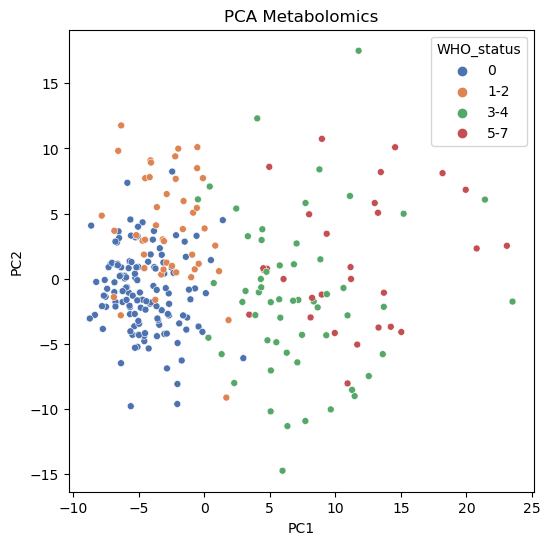

In [36]:

#Scatter plot to visualize COVID19 severity score (0 = healthy;  7 = most severe)
plt.figure(figsize=(6,6))
plt.title("PCA Metabolomics")
plt.xlabel("PC1")
plt.ylabel("PC2")
sns.scatterplot(x=pca1[:, 0 ], y=pca1[:, 1], hue=su_data["WHO_status"], hue_order=['0','1-2','3-4','5-7'], s=25, palette = 'deep' )
plt.savefig('PCA_Who_Status.png', dpi= 300)

<AxesSubplot:title={'center':'PCA metabolites - Group'}, xlabel='PCA_1', ylabel='PCA_2'>

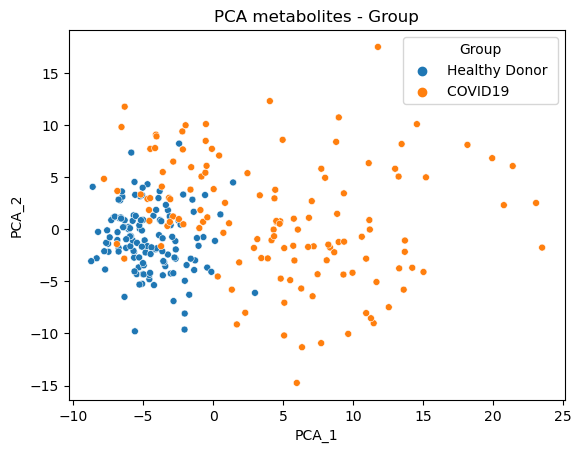

In [37]:

#Scatter plot to visualize healthy donors vs COVID19
plt.title("PCA metabolites - Group")
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
sns.scatterplot(x=pca1[:, 0 ], y=pca1[:, 1], hue=su_data["Group"], s=25)
#plt.savefig('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Plots_COVID/PCA_Group.png', dpi= 300, bbox_inches='tight')


# Making Pairplots

In [38]:
#sns.pairplot(df_merge, hue="Group", palette="dark")
#plt.title("PCA metabolites - Group")
#plt.savefig('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Plots_COVID/pairplot_Group.png', dpi= 300, bbox_inches='tight')

In [39]:

#sns.pairplot(df_merge, hue="WHO_status", hue_order=['0','1-2','3-4','5-7'], palette="deep")
#plt.savefig('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Plots_COVID/pairplot_who_status.png', dpi= 300, bbox_inches='tight')

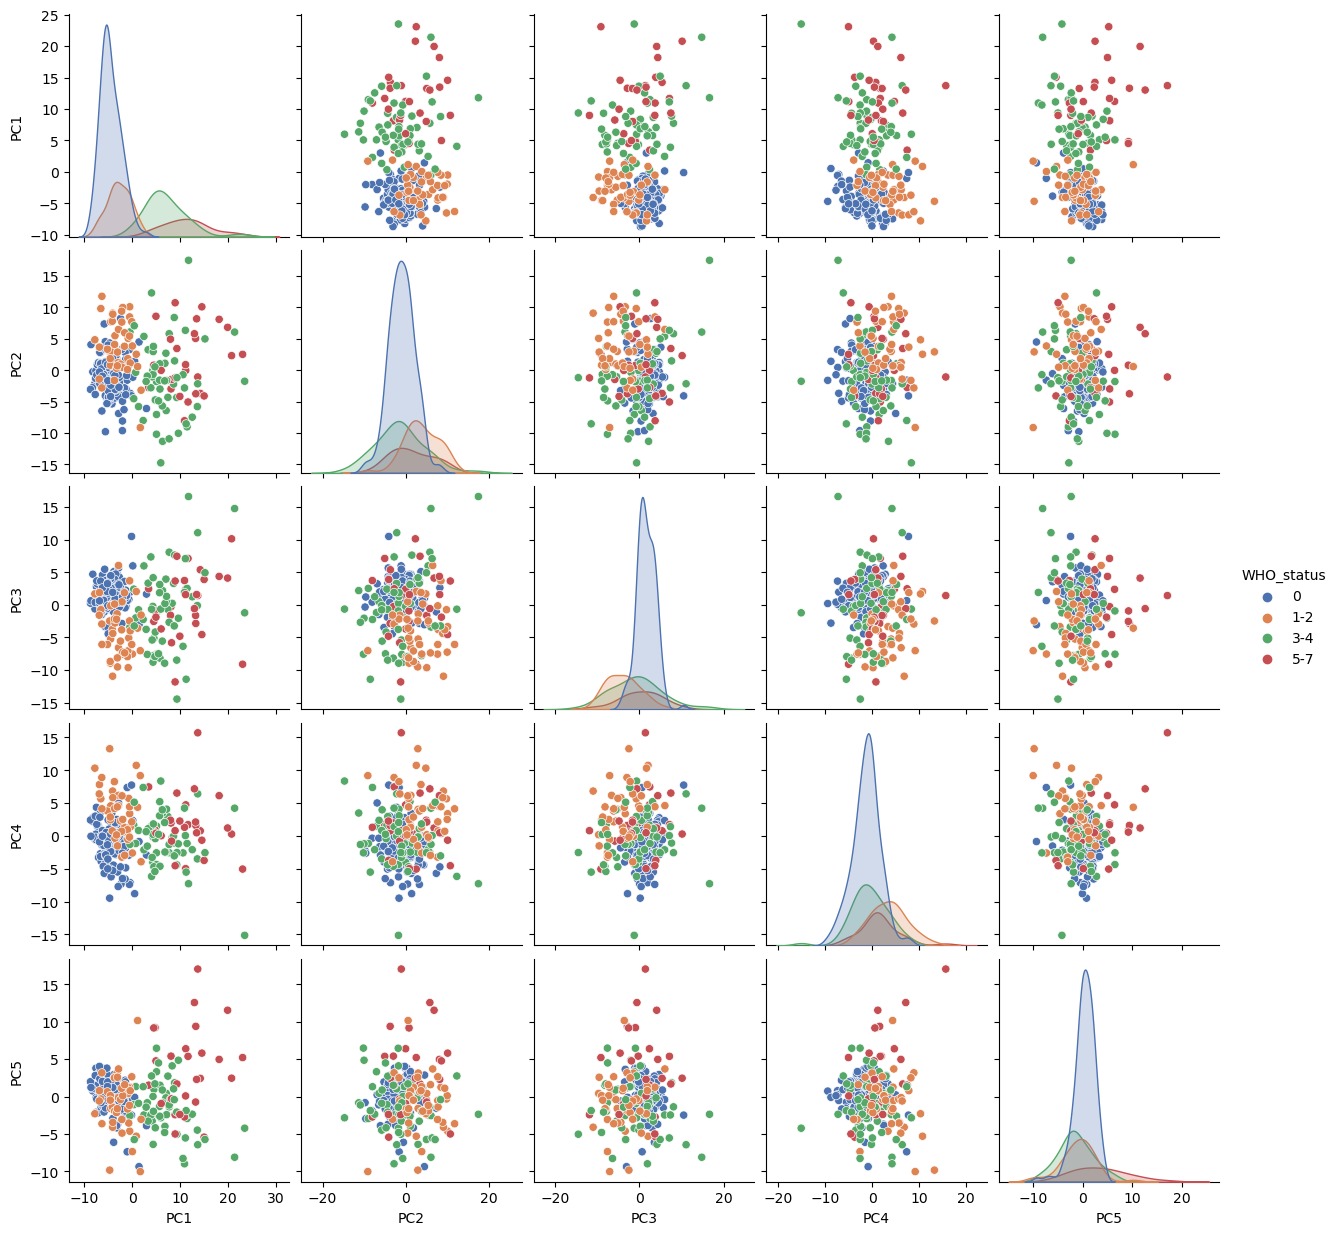

In [40]:
# Seaborn pairplot with changes colors and kind of graph
sns.pairplot(df_merge, hue="WHO_status", hue_order=['0','1-2','3-4','5-7'], palette="deep")

#plt.savefig('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Plots_COVID/pairplot_who_status_contour.png', dpi= 300, bbox_inches='tight')

# Making Volcano Plots

In [41]:
# Make volano plot

# Make COVID groups vs. Healthy Group using unscaled, log2 transformed data; drop the sample ID and WHO_status, and group
## UNSCALED
# This is on unscaled data
Healthy_group_unscaled = su_data_noscale[su_data_noscale["WHO_status"] == "0"]
Healthy_group_unscaled = Healthy_group_unscaled.iloc[:,:-2]

COVID19_group_unscaled = su_data_noscale[su_data_noscale["WHO_status"] != "0"]
COVID19_group_unscaled = COVID19_group_unscaled.iloc[:,:-2]


##SCALED
# Make COVID groups vs. Healthy Group using scaled data
Healthy_group_scaled = su_data[su_data["WHO_status"] == "0"]
Healthy_group_scaled_no_meta = Healthy_group_scaled.iloc[:,:-2]

COVID19_group_scaled = su_data[su_data["WHO_status"] != "0"]
COVID19_group_scaled_no_meta = COVID19_group_scaled.iloc[:,:-2]



/var/folders/yq/6fgvx0fj0cs57zmqydzbhbfh0000gn/T/ipykernel_5491/564299605.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.hist(su_data.mean(axis=0), bins=10) # Log transformed and mean of 0 and standard deviation of 1; should show 0 being near the center; the mean should be at 0; univariant scaled


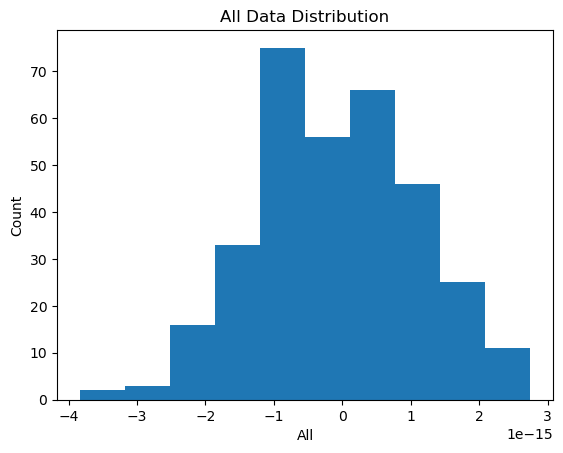

In [42]:
#Check for normal distribution
#This data is scaled

plt.title("All Data Distribution")
plt.xlabel("All")
plt.ylabel("Count")

plt.hist(su_data.mean(axis=0), bins=10) # Log transformed and mean of 0 and standard deviation of 1; should show 0 being near the center; the mean should be at 0; univariant scaled
# Chat with Cecelia about it 
#plt.savefig('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Plots_COVID/histogram_all_scaled.png', dpi= 300, bbox_inches='tight')
plt.show()

/var/folders/yq/6fgvx0fj0cs57zmqydzbhbfh0000gn/T/ipykernel_5491/2273230274.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.kdeplot(x=su_data.mean())


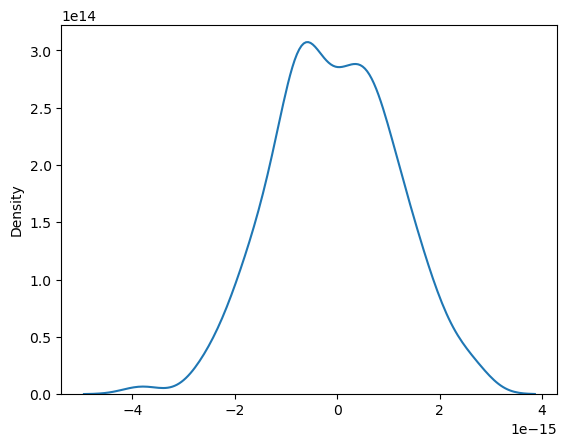

In [43]:
#Check for normal distribution
#Kernal Density

sns.kdeplot(x=su_data.mean())
plt.show()

/var/folders/yq/6fgvx0fj0cs57zmqydzbhbfh0000gn/T/ipykernel_5491/2186645200.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.histplot(x= su_data.mean(), bins=20)


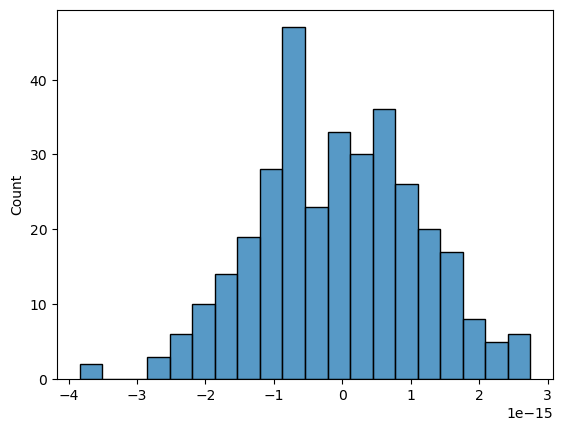

In [44]:
#Check for normal distribution
#Seaborn 

sns.histplot(x= su_data.mean(), bins=20)
plt.show()

/var/folders/yq/6fgvx0fj0cs57zmqydzbhbfh0000gn/T/ipykernel_5491/635844213.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.hist(su_data_noscale.median(axis=1), bins=10) # Log transformed and mean of 0 and standard deviation of 1; should show 0 being near the center; the mean should be at 0; univariant scaled


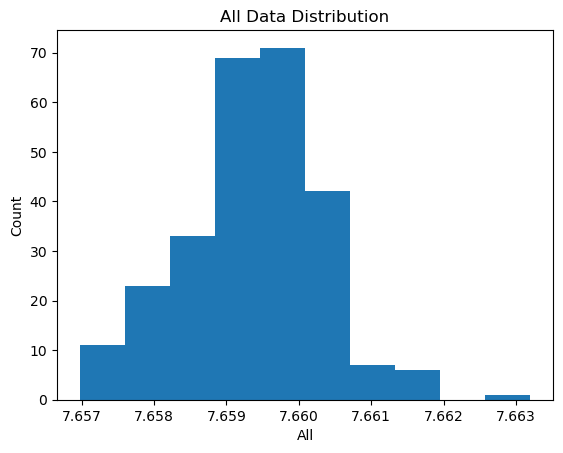

In [45]:
#Check for normal distribution
#This data is unscaled

plt.title("All Data Distribution")
plt.xlabel("All")
plt.ylabel("Count")

plt.hist(su_data_noscale.median(axis=1), bins=10) # Log transformed and mean of 0 and standard deviation of 1; should show 0 being near the center; the mean should be at 0; univariant scaled
#plt.savefig('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Plots_COVID/histogram_all_scaled.png', dpi= 300, bbox_inches='tight')
plt.show()

/var/folders/yq/6fgvx0fj0cs57zmqydzbhbfh0000gn/T/ipykernel_5491/4148628316.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.hist(Healthy_group_scaled.mean(axis=0), bins=20)


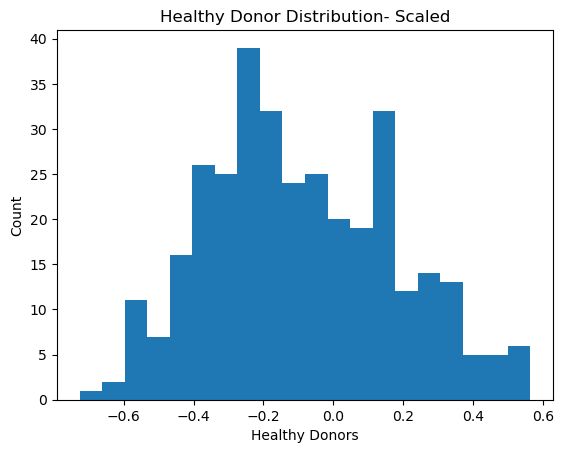

In [46]:
# Histogram Healthy donor scaled

plt.title("Healthy Donor Distribution- Scaled")
plt.xlabel("Healthy Donors")
plt.ylabel("Count")

plt.hist(Healthy_group_scaled.mean(axis=0), bins=20)
plt.show()



/var/folders/yq/6fgvx0fj0cs57zmqydzbhbfh0000gn/T/ipykernel_5491/207415733.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.hist(COVID19_group_scaled.median(axis=0), bins=20) # the x axis is the columns


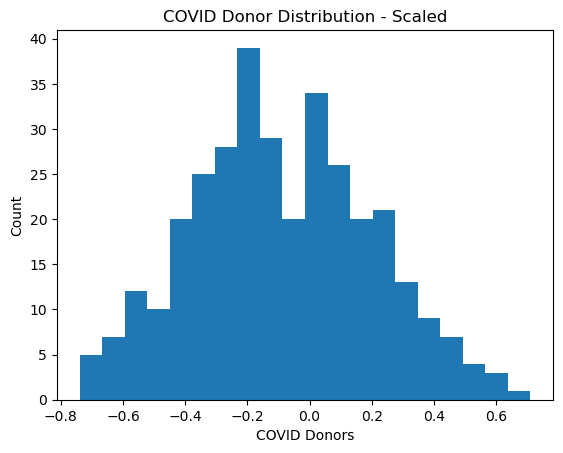

In [47]:
# Look at distribution of just COVID donors

plt.title("COVID Donor Distribution - Scaled")
plt.xlabel("COVID Donors")
plt.ylabel("Count")
plt.hist(COVID19_group_scaled.median(axis=0), bins=20) # the x axis is the columns
plt.show()

In [48]:
def t_tests(matrix, classes, multiple_correction_method, testtype="ttest"):
    metabolites = matrix.columns.tolist()
    matrix['Group'] = pd.factorize(classes)[0]
    disease = matrix.loc[matrix["Group"] == 0]
    disease.drop(['Group'], axis=1, inplace=True)
    ctrl = matrix.loc[matrix["Group"] != 0]
    ctrl.drop(['Group'], axis=1, inplace=True)
    if testtype == "mwu":
        pvalues = stats.mannwhitneyu(disease, ctrl, axis=0)[1] # T test for the non-parametric (not normally distributed); some people think its still not going to be normal so they feel more comfortable to do the ManWhitneyU tesy
    else:
        pvalues = stats.ttest_ind(disease, ctrl)[1]
        
    padj = sm.stats.multipletests(pvalues, 0.05, method=multiple_correction_method)
    results = pd.DataFrame(zip(metabolites, pvalues, padj[1]),
                           columns=["Metabolite", "P-value", "P-adjust"])
    return results

In [49]:
# Run T test with multiple corrections

#Levene's test can be carried out to check that variances are equal for all samples
#stats.levene(Healthy_group, COVID19_group)

#Calculate the T-test for the means of two independent samples of scores.
# Use scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)

t_test_scores= stats.ttest_ind(Healthy_group_scaled_no_meta, COVID19_group_scaled_no_meta, axis=0, equal_var= False) # Put equal var as false because I dont know if its equal...
t_test_pval = t_test_scores.pvalue


# Correct for multiple corrections
t_test_pval_corrected = statsmodels.stats.multitest.multipletests(t_test_pval, alpha=0.05, method='fdr_bh', is_sorted = False )
pval_only = t_test_pval_corrected[1] # it gives you 3 different outputs, and p value is the first so want to juse take the P val

In [50]:
# Results from T test with multiple corrections
#Calculate the p values using T test on the data that has not been scaled (but still log)
data_volcano = su_data_noscale.drop(["WHO_status"], axis=1) #write the name of what you want to drop, and axis =1 means drop column where axis =0 would drop row

# First input = your data
# Second input = the column you're analyzing, need to put it as df["Name of coulmn"] because pd.factorize takes a series (each column of a data frame is a series)
# Third input = correction method; fdr_bh is multiple correction
# Forth input = if you want to run a T test (if normal) or man whitneyu (if not normal)

results = t_tests(data_volcano, data_volcano["Group"], "fdr_bh")
results.index= results.Metabolite # Need to merge by indenx so each index has the same data frame so we are making the index of this to be Metabolite; defining the index name
results


/var/folders/yq/6fgvx0fj0cs57zmqydzbhbfh0000gn/T/ipykernel_5491/2839508329.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disease.drop(['Group'], axis=1, inplace=True)
/var/folders/yq/6fgvx0fj0cs57zmqydzbhbfh0000gn/T/ipykernel_5491/2839508329.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctrl.drop(['Group'], axis=1, inplace=True)


Metabolite  \
Metabolite                                                                                         
S-1-pyrroline-5-carboxylate                                          S-1-pyrroline-5-carboxylate   
spermidine                                                                            spermidine   
1-methylnicotinamide                                                        1-methylnicotinamide   
12,13-DiHOME                                                                        12,13-DiHOME   
5-hydroxyindoleacetate                                                    5-hydroxyindoleacetate   
...                                                                                          ...   
bilirubin degradation product, C17H20N2O5 (2)**  bilirubin degradation product, C17H20N2O5 (2)**   
tetrahydrocortisol glucuronide                                    tetrahydrocortisol glucuronide   
N,N-dimethyl-pro-pro                                                        N,N-dimethyl-pro-pro   
oxindolylalanine                                                                oxindolylalanine   
tetrahydrocortisone glucuronide (5)                          tetrahydrocortisone glucuronide (5)   

                                                      P-value      P-adjust  
Metabolite                                                                   
S-1-pyrroline-5-carboxylate                      9.581490e-01  9.672453e-01  
spermidine                                       1.038179e-07  4.139740e-07  
1-methylnicotinamide                             2.504628e-01  3.003788e-01  
12,13-DiHOME                                     1.831847e-01  2.270825e-01  
5-hydroxyindoleacetate                           2.504726e-01  3.003788e-01  
...                                                       ...           ...  
bilirubin degradation product, C17H20N2O5 (2)**  1.781237e-07  6.845958e-07  
tetrahydrocortisol glucuronide                   1.013526e-01  1.356565e-01  
N,N-dimethyl-pro-pro                             1.081014e-08  4.997734e-08  
oxindolylalanine                                 1.121556e-02  1.838818e-02  
tetrahydrocortisone glucuronide (5)              2.738093e-21  1.310177e-19  

[957 rows x 3 columns]

In [51]:
#Calculate Fold Change

# Calculating fold change: (Y - X)/X or is it (Y-X) - ask Cecelia?
# Need to use the UNSCALED values to calculate fold change; the data is already log2 transformed
fold_changes = (np.mean(COVID19_group_unscaled, axis=0)) - (np.mean(Healthy_group_unscaled, axis=0))

# Convert into a data frame
fold_changes = pd.DataFrame(fold_changes, columns= ["Fold_Change"]) # to name a column write column = ["Name of column"]; need to add the name of the column as a list 

fold_changes

Fold_Change
S-1-pyrroline-5-carboxylate                        -0.000019
spermidine                                          0.004581
1-methylnicotinamide                               -0.002032
12,13-DiHOME                                        0.000907
5-hydroxyindoleacetate                             -0.000874
...                                                      ...
bilirubin degradation product, C17H20N2O5 (2)**    -0.005402
tetrahydrocortisol glucuronide                     -0.001046
N,N-dimethyl-pro-pro                                0.002765
oxindolylalanine                                   -0.000893
tetrahydrocortisone glucuronide (5)                -0.004779

[957 rows x 1 columns]

In [52]:
# Merge data frames and assign th right fold change to the write p value and merge by index

volcano_df = pd.merge(fold_changes, results, right_index= True, left_index= True)
volcano_df.head()

Fold_Change                   Metabolite  \
S-1-pyrroline-5-carboxylate    -0.000019  S-1-pyrroline-5-carboxylate   
spermidine                      0.004581                   spermidine   
1-methylnicotinamide           -0.002032         1-methylnicotinamide   
12,13-DiHOME                    0.000907                 12,13-DiHOME   
5-hydroxyindoleacetate         -0.000874       5-hydroxyindoleacetate   

                                  P-value      P-adjust  
S-1-pyrroline-5-carboxylate  9.581490e-01  9.672453e-01  
spermidine                   1.038179e-07  4.139740e-07  
1-methylnicotinamide         2.504628e-01  3.003788e-01  
12,13-DiHOME                 1.831847e-01  2.270825e-01  
5-hydroxyindoleacetate       2.504726e-01  3.003788e-01

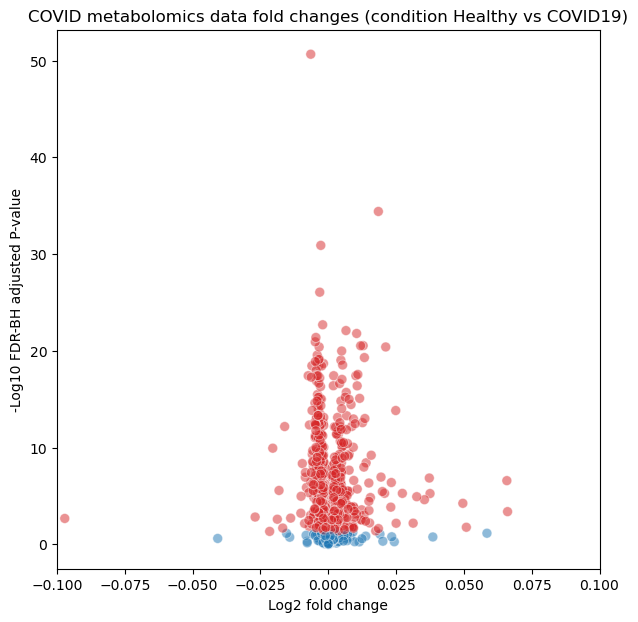

In [53]:
# Make graph 
#plt.scatter(x=volcano_df["Fold_Change"],y=-np.log2(volcano_df["P-adjust"]))

#need to log normalize the p values
# .tolist() converts into a list, which you would want if you had it as an array? ask Cecelia

# Making plots
fig, ax = plt.subplots(figsize=(7, 7))
metab_sig_padj = ["tab:red" if i <= 0.05 else "tab:blue" for i in volcano_df["P-adjust"].tolist()] #if p value is below 0.05 put it as red and if it isnt put it as blue
sns.scatterplot(y=-np.log10(volcano_df["P-adjust"].tolist()), x=volcano_df["Fold_Change"].tolist(), s=50, alpha=0.5, zorder=3, c=metab_sig_padj)

# Label titles
plt.ylabel("-Log10 FDR-BH adjusted P-value")
plt.xlabel("Log2 fold change")
plt.title("COVID metabolomics data fold changes (condition Healthy vs COVID19)")

ax.set_xlim([-0.1, 0.1])

# Show and save figures
#plt.savefig('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Plots_COVID/Volcano.png', dpi= 300, bbox_inches='tight')
plt.show()

# Looks slightly unexpected - take one of the metabolites and manually calculate the fold change that its numerically corrected by the code 
#trouble shoot run line by line and print the line by line output and command every line, check commentation of the function
# for i in whatever; list comprehension advance coding, but it does everything in one line; is quciker because apend is slow; it used to optmize code

# Data bases - Reactome and KEGG

In [54]:
#Load Reactome pathways and KEGG pathways
# This returns a GMT format pandas DataFrame containing the pathway information
#reactome_pathways  = sspa.process_reactome(organism="Homo sapiens") # download_latest=True if you want to update
kegg_human_pathways  = sspa.process_kegg(organism="hsa") # Using reactome because KEGG you have to pay for it, Reactome is more responsive and helpful

# download Reactome latest
reactome_pathways = sspa.process_reactome("Homo sapiens", download_latest=True, filepath=".") # Currently on version 83
reactome_pathways_83 = sspa.process_gmt('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Reactome_Homo_sapiens_pathways_compounds_R83.gmt')
# download KEGG latest
## kegg_human_pathways = sspa.process_kegg("Homo sapiens", download_latest=True, filepath=".")

Beginning Reactome download...
Reactome DB file saved to ./Reactome_Homo_sapiens_pathways_compounds_R83.gmt
Complete!


In [55]:
# View reactome pathway
reactome_pathways.head()

Pathway_name       0       1       2      3  \
R-HSA-1059683          Interleukin-6 signaling   30616  456216    None   None   
R-HSA-109581                         Apoptosis   61120    4705  456216  28494   
R-HSA-109582                        Hemostasis   15366   91144   15377  15378   
R-HSA-109606   Intrinsic Pathway for Apoptosis  456216   28494   36080  15377   
R-HSA-109703               PKB-mediated events  456216   57836   15377  58165   

                    4       5       6      7      8  ...  1491  1492  1493  \
R-HSA-1059683    None    None    None   None   None  ...  None  None  None   
R-HSA-109581    36080   15377   43474  47575  30616  ...  None  None  None   
R-HSA-109582    15379  456215  456216  35366  57895  ...  None  None  None   
R-HSA-109606    43474   47575   30616   None   None  ...  None  None  None   
R-HSA-109703   456215   30616    None   None   None  ...  None  None  None   

               1494  1495  1496  1497  1498  1499  1500  
R-HSA-1059683  None  None  None  None  None  None  None  
R-HSA-109581   None  None  None  None  None  None  None  
R-HSA-109582   None  None  None  None  None  None  None  
R-HSA-109606   None  None  None  None  None  None  None  
R-HSA-109703   None  None  None  None  None  None  None  

[5 rows x 1502 columns]

In [56]:
reactome_pathways_83 ## What is happening here?

Pathway_name       2  \
Pathway_ID                                                                 
R-HSA-1059683                            Interleukin-6 signaling   30616   
R-HSA-109581                                           Apoptosis   61120   
R-HSA-109582                                          Hemostasis   15366   
R-HSA-109606                     Intrinsic Pathway for Apoptosis  456216   
R-HSA-109703                                 PKB-mediated events  456216   
...                                                          ...     ...   
R-HSA-983695   Antigen activates B Cell Receptor (BCR) leadin...   57540   
R-HSA-983705              Signaling by the B Cell Receptor (BCR)   57540   
R-HSA-983712                               Ion channel transport   15365   
R-HSA-991365                       Activation of GABAB receptors   58189   
R-HSA-997272   Inhibition  of voltage gated Ca2+ channels via...   59888   

                    3       4       5       6       7       8      9      10  \
Pathway_ID                                                                     
R-HSA-1059683  456216                                                          
R-HSA-109581     4705  456216   28494   36080   15377   43474  47575   30616   
R-HSA-109582    91144   15377   15378   15379  456215  456216  35366   57895   
R-HSA-109606    28494   36080   15377   43474   47575   30616                  
R-HSA-109703    57836   15377   58165  456215   30616                          
...               ...     ...     ...     ...     ...     ...    ...     ...   
R-HSA-983695   456216   57836  203600   36080   29108   17815  30616   58456   
R-HSA-983705    11750  456216   29034   57836   58189  203600  29105   36080   
R-HSA-983712    17544   57613   49552   15377   15378   35475  30616  456216   
R-HSA-991365    29103   17552   59888   43474   18420   37565                  
R-HSA-997272    29103                                                          

               ... 1493 1494 1495 1496 1497 1498 1499 1500 1501 1502  
Pathway_ID     ...                                                    
R-HSA-1059683  ...                                                    
R-HSA-109581   ...                                                    
R-HSA-109582   ...                                                    
R-HSA-109606   ...                                                    
R-HSA-109703   ...                                                    
...            ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
R-HSA-983695   ...                                                    
R-HSA-983705   ...                                                    
R-HSA-983712   ...                                                    
R-HSA-991365   ...                                                    
R-HSA-997272   ...                                                    

[2291 rows x 1502 columns]

In [57]:
# Remove group and who status
su_data_names = su_data_met_names.iloc[:,:-2]

In [58]:
#Creat a list out of the names from the metabolites

compound_names = su_data_names.columns.tolist() # .columns.tolist() converts the column names from the data frame into a list

In [59]:
# Identifier_conversion function to get identifier mappings

#Convert the metabolite names into ChEBI IDs
conversion_table = sspa.identifier_conversion(input_type="name", compound_list=compound_names)
conversion_table

# Identifier conversion: Use Metaboanalyst API for identifier conversion; (pd.DataFrame) Dataframe containing identifier matches
#References: https://cwieder.github.io/py-ssPA/gendocs_docs/reference/identifier_conversion/

Query                          Match  \
0    (S)-1-Pyrroline-5-carboxylate  (S)-1-Pyrroline-5-carboxylate   
1                       Spermidine                     Spermidine   
2                      12,13-DHOME                    12,13-DHOME   
3       5-Hydroxyindoleacetic acid     5-Hydroxyindoleacetic acid   
4                 Oxoglutaric acid               Oxoglutaric acid   
..                             ...                            ...   
328     1H-Indole-3-carboxaldehyde     1H-Indole-3-carboxaldehyde   
329           3-Amino-2-piperidone           3-Amino-2-piperidone   
330      2-Hydroxydecanedioic acid      2-Hydroxydecanedioic acid   
331               4-Chlorobenzoate               4-Chlorobenzoate   
332        2,4-Di-tert-butylphenol        2,4-Di-tert-butylphenol   

            HMDB   PubChem  ChEBI    KEGG METLIN  \
0    HMDB0001301      1196   1372  C03912   6145   
1    HMDB0001257      1102  16610  C00315    254   
2    HMDB0004705  10236635  72665  C14829   None   
3    HMDB0000763      1826  27823  C05635   2975   
4    HMDB0000208        51  30915  C00026   5218   
..           ...       ...    ...     ...    ...   
328  HMDB0029737     10256  28238  C08493   None   
329  HMDB0000323   5200225  76341    None   5312   
330  HMDB0000424    128458  89312    None   5413   
331    METPA0283      None  17861  C02370   None   
332  HMDB0013816      7311  89188    None   None   

                               SMILES Comment  
0                      OC(=O)C1CCC=N1       1  
1                          NCCCCNCCCN       1  
2    CCCCCC(C(C/C=C\CCCCCCCC(=O)O)O)O       1  
3         OC(=O)CC1=CNC2=C1C=C(O)C=C2       1  
4                 OC(=O)CCC(=O)C(O)=O       1  
..                                ...     ...  
328              O=CC1=CNC2=C1C=CC=C2       1  
329                       NC1CCCNC1=O       1  
330           O=C(O)CCCCCCCC(O)C(=O)O       1  
331                              None       1  
332  CC(C)(C)C1=CC=C(O)C(=C1)C(C)(C)C       1  

[333 rows x 9 columns]

In [60]:
# Count how many identifiers have matches 
conversion_table["Comment"].value_counts() #Anything with a 1 has a matching metabolote name, anything with a 0 does not have a matching metabolite name

1    332
0      1
Name: Comment, dtype: int64

In [61]:
# Map the identifiers to your dataset

#Converts our data (that I added the metabolite identifier names to) back to the ChEBI IDs to make the pathways
processed_data_mapped = sspa.map_identifiers(conversion_table, output_id_type="ChEBI", matrix=su_data_met_names)
processed_data_mapped

### I LOSE A METABOLITE HERE!! SO DONT USE THIS

#map_identifiers : Map desired identifiers to input data; Sample-by-compound metabolomics data matrix with mapped identifiers, any compounds without a matching ID will be dropped

1372     16610     72665     27823     30915     37373  \
sample_id                                                                 
1004596     -0.822470  0.370169  0.537246  0.362243 -0.578361 -1.201938   
1008097      0.149291 -0.802638 -1.220563 -0.774417 -0.123663 -0.453530   
1008631      1.012771 -1.033291  0.145690  0.524050 -0.073503 -0.229649   
1012545     -0.979554 -0.395854  2.449097  0.866752 -0.354040 -0.345205   
1022407     -0.739817 -0.288710 -0.782552 -0.526128  0.288048  0.550284   
...               ...       ...       ...       ...       ...       ...   
INCOV135-BL -2.228940 -0.101002 -0.679609  0.000163  0.284214  0.734004   
INCOV136-BL -0.169748  1.599117  0.173275  0.046243 -0.470655  1.219268   
INCOV137-BL  0.317113  0.383352 -0.981562  0.857227 -1.462299  0.594609   
INCOV139-BL  0.856401  1.847067  1.837225  2.220553 -0.167827  0.148805   
INCOV142-BL -0.955167  2.240840 -1.548758 -1.160095 -1.424368  1.334007   

                16831    545959     17050     16359  ...     64032    133677  \
sample_id                                            ...                       
1004596     -1.195697 -0.253528  0.237192 -0.502347  ...  0.481654  0.125720   
1008097     -0.956306 -0.805678 -0.840364  0.320534  ... -0.917883  0.741096   
1008631      1.475643 -0.437623 -0.827898 -0.462676  ... -0.747197  0.529527   
1012545      0.057663 -0.306422 -0.908367 -0.533817  ...  0.075265 -0.288374   
1022407     -0.550971 -0.640346 -0.833565 -0.451067  ... -0.436802  0.594955   
...               ...       ...       ...       ...  ...       ...       ...   
INCOV135-BL -0.041038 -0.210435  0.070459 -0.374044  ... -0.519903 -0.485733   
INCOV136-BL  0.504222  1.204577  2.016911  0.431724  ...  0.466086 -0.633350   
INCOV137-BL  0.561018 -0.709397  0.361510 -0.550916  ... -0.478024 -1.539176   
INCOV139-BL  0.901317  0.782439  2.592986 -0.374388  ...  0.656113 -1.152791   
INCOV142-BL -0.021600 -0.290402  2.540530 -0.508633  ...  0.601246 -1.430479   

               133693    133694     28036     28238     76341     89312  \
sample_id                                                                 
1004596      0.057068  0.228500 -0.546769 -0.587946 -0.175542 -0.693254   
1008097      0.565895  0.544281 -0.053133 -0.048306 -0.920090 -1.434730   
1008631      0.507601  1.009191  0.099614  0.508498 -1.272854  0.448616   
1012545     -0.091666  0.782065 -0.341433  1.612615  0.851680 -0.504009   
1022407      0.233939  0.883763 -0.576132 -0.567979 -1.182109 -0.260231   
...               ...       ...       ...       ...       ...       ...   
INCOV135-BL -0.525115 -0.495566 -0.182214  0.714288 -0.265526 -0.151931   
INCOV136-BL -0.768909 -0.829643 -0.247622 -1.579635  0.567450 -0.364475   
INCOV137-BL -1.380566 -1.338709  2.431694  0.961980  0.630608 -0.262134   
INCOV139-BL -1.104065 -1.005903  1.430243 -0.016018 -0.279534  1.291420   
INCOV142-BL -1.316335 -1.294325 -0.292315 -0.281823 -0.788803  0.266498   

                17861     89188  
sample_id                        
1004596     -1.201150  0.403074  
1008097     -0.475391  0.134784  
1008631      1.207374 -0.637957  
1012545      0.084370 -0.279907  
1022407     -1.009292 -0.095161  
...               ...       ...  
INCOV135-BL  1.330576 -1.105986  
INCOV136-BL  1.220314 -0.755291  
INCOV137-BL  0.475143 -1.235598  
INCOV139-BL -1.179473  0.417561  
INCOV142-BL  1.055099 -0.409015  

[263 rows x 332 columns]

In [62]:
# Confirm that metabolites without names have been dropped
print(su_data_names.shape)
print(processed_data_mapped.shape)

(263, 333)
(263, 332)


In [63]:
#Download latest metabolic network pathways from MetExplore
# MetExplorePaths(model, id_type, filepath = None)
## model (str) : identifier of genome scale metabolic model available on MetExplore
## id_type (str) : identifier type for the model pathways
## filepath (str) : filepath to save the pathway file to, default is None (save to variable)

# These are genomescale metaboloic models 

#ihuman = sspa.MetExplorePaths(model='6422', id_type="chebi", filepath=None) # Class for downloading metexplore metabolic models in the form of pathways with mapped identifiers
#print(ihuman.nMetab, "total metabolites in the metabolic network")
#print(ihuman.nMappedID, "metabolites with ChEBI identifiers")
#coverage = int(ihuman.nMappedID)/int(ihuman.nMetab)*100
#print("the coverage of metabolites in term of ChEBI identifiers for the network is", round(coverage,1),"%")

In [64]:
## if using Reactome database as the pathway database
# count all compounds in the dataset
print(len(compound_names), "compounds in the dataset")

# find how many input compound names in the dataset had a matching ChEBI ID
chebi_matches = conversion_table[(conversion_table["Comment"] == "1") & (conversion_table["ChEBI"].isnull()==False)]["ChEBI"]
print(len(chebi_matches), "compounds from the dataset that have ChEBI IDs")

# count all unique compounds in the Reactome database
all_reactome_cpds = set(sum(sspa.utils.pathwaydf_to_dict(reactome_pathways).values(), []))
print(len(all_reactome_cpds), "total unique compounds in Reactome - how many metabolites in all of Reactome")

# find the intesect between all reactome compounds and all ChEBI IDs annotated to the dataset
mapped_annotated_cpds = set(processed_data_mapped.columns) & all_reactome_cpds
print(len(mapped_annotated_cpds), "metabolites present in both the dataset and Reactome pathways - aka only this amount of metabolites in my datasets are mapped to a pathway")
# of the 333 metabolites, only 77 are present in pathways in reactomes ; Reactome pathways have low coverage

333 compounds in the dataset
332 compounds from the dataset that have ChEBI IDs
2391 total unique compounds in Reactome - how many metabolites in all of Reactome
77 metabolites present in both the dataset and Reactome pathways - aka only this amount of metabolites in my datasets are mapped to a pathway


In [65]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [66]:
# ## Visualise this in barchart form

# sns.set_context('notebook')
# sns.set_style('ticks')
# ax = sns.barplot(y=[len(compound_names), len(chebi_matches), 
#     len(mapped_annotated_cpds)], x=['# of metabolites in dataset', 'Metabolites matching to CHEBI', '# of metabolites from dataset that map to a Reactome pathway'])
# wrap_labels(ax, 20, break_long_words=False)
# plt.tight_layout()
# plt.show()

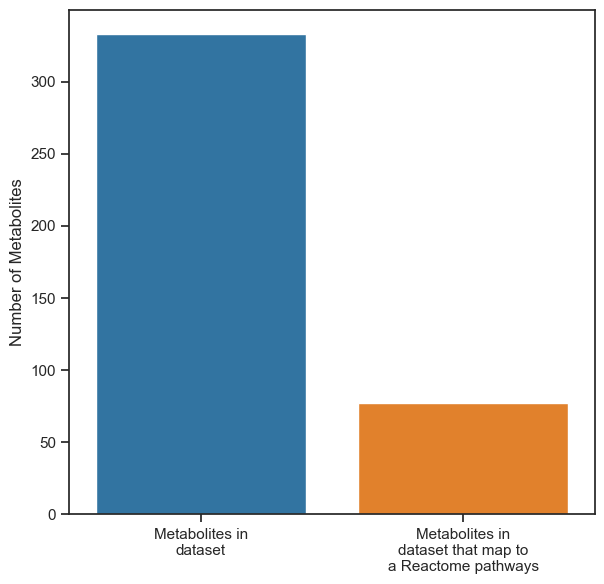

In [67]:
# Visualise this in barchart form
plt.figure(figsize=(6,6))
sns.set_context('notebook')
sns.set_style('ticks')
ax = sns.barplot(y=[len(compound_names), len(mapped_annotated_cpds)], 
                x=['Metabolites in dataset', 'Metabolites in dataset that map to a Reactome pathways'])
wrap_labels(ax, 20, break_long_words=False)
plt.tight_layout()
plt.ylabel("Number of Metabolites")
plt.show()

In [68]:
print(len(compound_names))
print(len(mapped_annotated_cpds))

333
77


In [69]:
77/333*100


23.123123123123122

# Conventional Data Analysis - ssPA

Single sample pathway analysis methods

In [70]:
# ssclustPA
ssclustpa_proj_res = sspa.sspa_ssClustPA(su_data, reactome_pathways, min_entity = 2)
ssclustpa_proj_res

R-HSA-110331  R-HSA-112310  R-HSA-112311  R-HSA-112315  \
sample_id                                                             
1004596          0.612266      0.882718      0.821508      0.859477   
1008097          0.233183     -1.338472      1.385439     -0.952793   
1008631          1.473881     -0.891019      0.465264     -0.856388   
1012545          0.465256      1.198426      0.620605      1.049518   
1022407          0.707896      1.085715      1.010327      1.266541   
...                   ...           ...           ...           ...   
INCOV135-BL     -0.996754     -0.803446     -0.084963     -0.735517   
INCOV136-BL     -1.727794     -0.867532     -1.015467     -1.110194   
INCOV137-BL     -0.992685     -1.080282     -0.665432     -1.102264   
INCOV139-BL     -1.059427      2.443051     -0.850103      1.783468   
INCOV142-BL     -1.383367      0.320102     -0.305432      0.563939   

             R-HSA-112316  R-HSA-1237112  R-HSA-1266738  R-HSA-1368082  \
sample_id                                                                
1004596          0.859477      -1.503746      -1.001937       1.001937   
1008097         -0.952793      -0.777702       1.103654      -1.103654   
1008631         -0.856388      -1.029775       1.062813      -1.062813   
1012545          1.049518       0.426893      -0.360651       0.360651   
1022407          1.266541      -0.534112      -0.517576       0.517576   
...                   ...            ...            ...            ...   
INCOV135-BL     -0.735517       0.305539       0.943728      -0.943728   
INCOV136-BL     -1.110194       1.760979      -1.005491       1.005491   
INCOV137-BL     -1.102264       1.432165       0.897403      -0.897403   
INCOV139-BL      1.783468       0.824393      -1.206307       1.206307   
INCOV142-BL      0.563939      -0.422609      -1.273259       1.273259   

             R-HSA-1368108  R-HSA-1428517  ...  R-HSA-9709957  R-HSA-9711123  \
sample_id                                  ...                                 
1004596          -1.001937       0.540911  ...      -0.971360      -1.001937   
1008097           1.103654      -0.169635  ...       0.631020       1.103654   
1008631           1.062813       0.352248  ...       1.103820       1.062813   
1012545          -0.360651       1.133884  ...      -0.680531      -0.360651   
1022407          -0.517576       0.077433  ...      -1.322882      -0.517576   
...                    ...            ...  ...            ...            ...   
INCOV135-BL       0.943728      -0.639868  ...       0.453035       0.943728   
INCOV136-BL      -1.005491      -0.817644  ...      -0.907886      -1.005491   
INCOV137-BL       0.897403       1.089508  ...       4.093736       0.897403   
INCOV139-BL      -1.206307      -1.870633  ...      -1.799182      -1.206307   
INCOV142-BL      -1.273259       1.481866  ...       0.468573      -1.273259   

             R-HSA-9717189  R-HSA-9717207  R-HSA-9734207  R-HSA-9735804  \
sample_id                                                                 
1004596          -0.264491      -0.481936       1.179456      -1.149237   
1008097          -1.266075      -0.785367       0.448631      -0.843672   
1008631           0.714006       0.397592       1.097976      -1.293409   
1012545           0.093753      -0.062982       0.715403      -1.121549   
1022407          -0.788806      -0.612332       0.869266      -1.235266   
...                    ...            ...            ...            ...   
INCOV135-BL      -0.504556      -0.816064      -0.431394       0.705303   
INCOV136-BL      -0.741193      -0.881153      -1.733724       2.109157   
INCOV137-BL       5.705584       7.162080      -1.219066       1.572850   
INCOV139-BL       0.297619       0.716478      -1.530550       1.820681   
INCOV142-BL       2.258553       1.776117      -2.902465       3.218816   

             R-HSA-9748784  R-HSA-9749641  R-HSA-9753281  R-HSA-975634  
sample_id                           

In [71]:
# kPCA
kpca_scores = sspa.sspa_kpca(su_data, reactome_pathways)
kpca_scores.shape # Shape does not include index
kpca_scores

R-HSA-110331  R-HSA-112310  R-HSA-112311  R-HSA-112315  \
sample_id                                                             
1004596         -0.132625      0.116570     -0.525324     -0.341057   
1008097         -0.066326      0.562160     -0.437752     -0.429874   
1008631         -0.635373      0.591693     -0.405636     -0.554063   
1012545         -0.006082     -0.097101     -0.408973     -0.134598   
1022407         -0.489754     -0.126461     -0.428649     -0.124315   
...                   ...           ...           ...           ...   
INCOV135-BL      0.623289      0.221956      0.119247     -0.192782   
INCOV136-BL      0.507104     -0.190711      0.415538      0.266411   
INCOV137-BL      0.629146     -0.021088      0.350175      0.058558   
INCOV139-BL      0.578855     -0.345034      0.102470      0.185720   
INCOV142-BL      0.467924     -0.403334      0.568511      0.392753   

             R-HSA-112316  R-HSA-1237112  R-HSA-1266738  R-HSA-1368082  \
sample_id                                                                
1004596         -0.341057      -0.589968       0.591590       0.591590   
1008097         -0.429874      -0.473981      -0.647908      -0.647908   
1008631         -0.554063      -0.516610      -0.637767      -0.637767   
1012545         -0.134598       0.483868       0.323059       0.323059   
1022407         -0.124315      -0.291602       0.386204       0.386204   
...                   ...            ...            ...            ...   
INCOV135-BL     -0.192782       0.378288      -0.586796      -0.586796   
INCOV136-BL      0.266411       0.623957       0.647968       0.647968   
INCOV137-BL      0.058558       0.417775      -0.568340      -0.568340   
INCOV139-BL      0.185720       0.668055       0.685132       0.685132   
INCOV142-BL      0.392753      -0.117090       0.684710       0.684710   

             R-HSA-1368108  R-HSA-1428517  ...  R-HSA-9709957  R-HSA-9711123  \
sample_id                                  ...                                 
1004596           0.591590       0.299798  ...      -0.302784       0.591590   
1008097          -0.647908      -0.243076  ...       0.269165      -0.647908   
1008631          -0.637767       0.231975  ...       0.362058      -0.637767   
1012545           0.323059       0.384479  ...      -0.143989       0.323059   
1022407           0.386204      -0.108381  ...      -0.372630       0.386204   
...                    ...            ...  ...            ...            ...   
INCOV135-BL      -0.586796      -0.388396  ...       0.189600      -0.586796   
INCOV136-BL       0.647968      -0.516234  ...      -0.292411       0.647968   
INCOV137-BL      -0.568340       0.540988  ...      -0.025474      -0.568340   
INCOV139-BL       0.685132      -0.405828  ...      -0.321534       0.685132   
INCOV142-BL       0.684710       0.317106  ...      -0.009272       0.684710   

             R-HSA-9717189  R-HSA-9717207  R-HSA-9734207  R-HSA-9735804  \
sample_id                                                                 
1004596          -0.354446      -0.301712      -0.181516      -0.251663   
1008097          -0.388074      -0.342489      -0.168234      -0.331469   
1008631           0.005851      -0.006643      -0.468735      -0.450763   
1012545           0.281106       0.260653      -0.000377      -0.061087   
1022407          -0.439894      -0.356451      -0.486571      -0.524493   
...                    ...            ...            ...            ...   
INCOV135-BL      -0.320906      -0.403381       0.382229       0.406984   
INCOV136-BL      -0.320380      -0.319519       0.582675       0.615090   
INCOV137-BL       0.399491       0.400392       0.597079       0.662975   
INCOV139-BL       0.125505       0.222792       0.615859       0.660087   
INCOV142-BL       0.563533       0.508254       0.268815       0.319669   

             R-HSA-9748784  R-HSA-9749641  R-HSA-9753281  R-HSA-975634  
sample_id                           

In [72]:
#Pathways present to drop

#kpca_scores["R-HSA-400253"] # Circadian Clock
#kpca_scores["R-HSA-1266738"] # Developmental Biology
#kpca_scores["R-HSA-8963743"] # Digestion and absorption
#kpca_scores["R-HSA-1643685"] # Disease
#kpca_scores["R-HSA-73894"] # DNA Repair
#kpca_scores["R-HSA-9748784"] # Drug ADME
#kpca_scores["R-HSA-74160"] # Gene expression (Transcription)
#kpca_scores["R-HSA-168256"] # Immune System
#kpca_scores["R-HSA-1430728"] # Metabolism
#kpca_scores["R-HSA-392499"] # Metabolism of proteins
#kpca_scores["R-HSA-8953854"] # Metabolism of RNA
#kpca_scores["R-HSA-112316"] # Neuronal System
#kpca_scores["R-HSA-1852241"] # Organelle biogenesis and maintenance
#kpca_scores["R-HSA-9709957"] # Sensory Perception
#kpca_scores["R-HSA-162582"] # Signal Transduction
#kpca_scores["R-HSA-382551"] # Transport of small molecules
## Dropped 16

In [73]:
# Drop vauge overarching pathways
print(kpca_scores.shape)
kpca_scores = kpca_scores.drop(columns=["R-HSA-400253", "R-HSA-1266738", "R-HSA-8963743", "R-HSA-1643685", "R-HSA-73894", "R-HSA-9748784", "R-HSA-74160", "R-HSA-168256",
     "R-HSA-1430728", "R-HSA-392499", "R-HSA-8953854", "R-HSA-112316", "R-HSA-1852241", "R-HSA-9709957", "R-HSA-162582", "R-HSA-382551" ]) #Cellular responses to stimuli
print(kpca_scores.shape)

(263, 165)
(263, 149)


In [74]:
# Pathways present in dataset
print("Number of pathways in the datset", len(set(kpca_scores.columns.to_list()))) # tells you if there is duplicates; a set only contains unique values
pathways_present_in_data = kpca_scores.columns.to_list()

Number of pathways in the datset 149


In [75]:
# Look at distribution of pathway scores

kpca_1 = kpca_scores.iloc[:,::20]
kpca_1["Group"] = df_merge["Group"]

kpca_2 = kpca_scores.iloc[:,10::20]
kpca_2["Group"] = df_merge["Group"]

## Do the same with the metabolomics and look at 

/var/folders/yq/6fgvx0fj0cs57zmqydzbhbfh0000gn/T/ipykernel_5491/2948382112.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kpca_1["Group"] = df_merge["Group"]
/var/folders/yq/6fgvx0fj0cs57zmqydzbhbfh0000gn/T/ipykernel_5491/2948382112.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kpca_2["Group"] = df_merge["Group"]


In [76]:
#Look at variation of PA scores 
#sns.pairplot(data=kpca_1, hue="Group", kind="reg", plot_kws={'line_kws':{'color':'black'}}) ## line_kws are additional keywords added to a scatterplot
#sns.pairplot(data=kpca_2, hue="Group", kind="reg", plot_kws={'line_kws':{'color':'black'}}) ## line_kws are additional keywords added to a scatterplot

# Vizualizing Pathway Scores -kPCA

In [77]:
reactome_pathways.head()

Pathway_name       0       1       2      3  \
R-HSA-1059683          Interleukin-6 signaling   30616  456216    None   None   
R-HSA-109581                         Apoptosis   61120    4705  456216  28494   
R-HSA-109582                        Hemostasis   15366   91144   15377  15378   
R-HSA-109606   Intrinsic Pathway for Apoptosis  456216   28494   36080  15377   
R-HSA-109703               PKB-mediated events  456216   57836   15377  58165   

                    4       5       6      7      8  ...  1491  1492  1493  \
R-HSA-1059683    None    None    None   None   None  ...  None  None  None   
R-HSA-109581    36080   15377   43474  47575  30616  ...  None  None  None   
R-HSA-109582    15379  456215  456216  35366  57895  ...  None  None  None   
R-HSA-109606    43474   47575   30616   None   None  ...  None  None  None   
R-HSA-109703   456215   30616    None   None   None  ...  None  None  None   

               1494  1495  1496  1497  1498  1499  1500  
R-HSA-1059683  None  None  None  None  None  None  None  
R-HSA-109581   None  None  None  None  None  None  None  
R-HSA-109582   None  None  None  None  None  None  None  
R-HSA-109606   None  None  None  None  None  None  None  
R-HSA-109703   None  None  None  None  None  None  None  

[5 rows x 1502 columns]

In [78]:
reactome_pathways.shape
# There is 2291 possible pathways 
# There are 1502 possible metabolites in those pathways


(2291, 1502)

In [79]:
# Chebi to me keys, names ot be values
list3 = reactome_pathways.index
list4 = reactome_pathways["Pathway_name"] 
print("Pathway code", len(set(list3)))
print("Pathway name", len(set(list4)))
# Make a dictionary with two lists 
reactome_dict = dict(zip(list3, list4)) # zip is a way of pulling two lists together (need to be same length) and put it into a tupple (pair of things)

reactome_dict_rev = dict(zip(list4, list3))

print("Dictionary - code and name", len(reactome_dict))
print("Dictionary - name and code", len(reactome_dict_rev))

Pathway code 2291
Pathway name 2274
Dictionary - code and name 2291
Dictionary - name and code 2274


In [80]:
## What is the difference? 
# reactome_pathways = sspa.process_reactome("Homo sapiens", download_latest=True, filepath=".") - 2291

# reactome_dict_metabolites = sspa.utils.pathwaydf_to_dict(reactome_pathways) - 2040

In [81]:
kPCA_names = kpca_scores 

In [82]:
kpca_scores_stack = kPCA_names.stack().reset_index()
kpca_scores_stack.columns = ["sample_ID", "Pathway", "Pathway_score"]
kpca_scores_stack

sample_ID        Pathway  Pathway_score
0          1004596   R-HSA-110331      -0.132625
1          1004596   R-HSA-112310       0.116570
2          1004596   R-HSA-112311      -0.525324
3          1004596   R-HSA-112315      -0.341057
4          1004596  R-HSA-1237112      -0.589968
...            ...            ...            ...
39182  INCOV142-BL  R-HSA-9734207       0.268815
39183  INCOV142-BL  R-HSA-9735804       0.319669
39184  INCOV142-BL  R-HSA-9749641       0.092651
39185  INCOV142-BL  R-HSA-9753281       0.721816
39186  INCOV142-BL   R-HSA-975634       0.684710

[39187 rows x 3 columns]

Text(0, 0.5, 'Frequency')

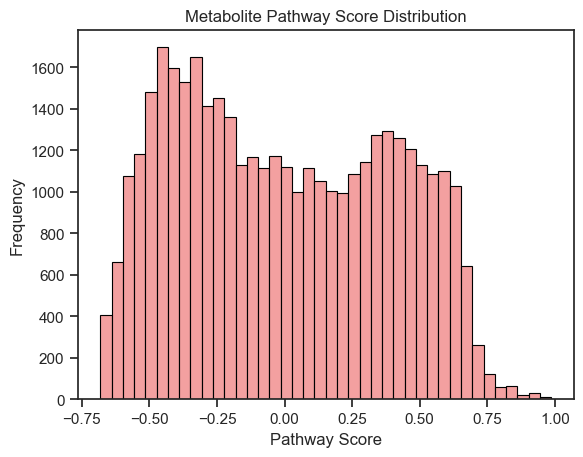

In [83]:
# Distribution of pathway scores metabolite

sns.histplot(data=kpca_scores_stack, x= kpca_scores_stack["Pathway_score"], color = 'lightcoral', bins=40, legend= False, edgecolor = 'black')
plt.title("Metabolite Pathway Score Distribution")
plt.xlabel("Pathway Score")
plt.ylabel("Frequency")

<AxesSubplot:xlabel='variable', ylabel='value'>

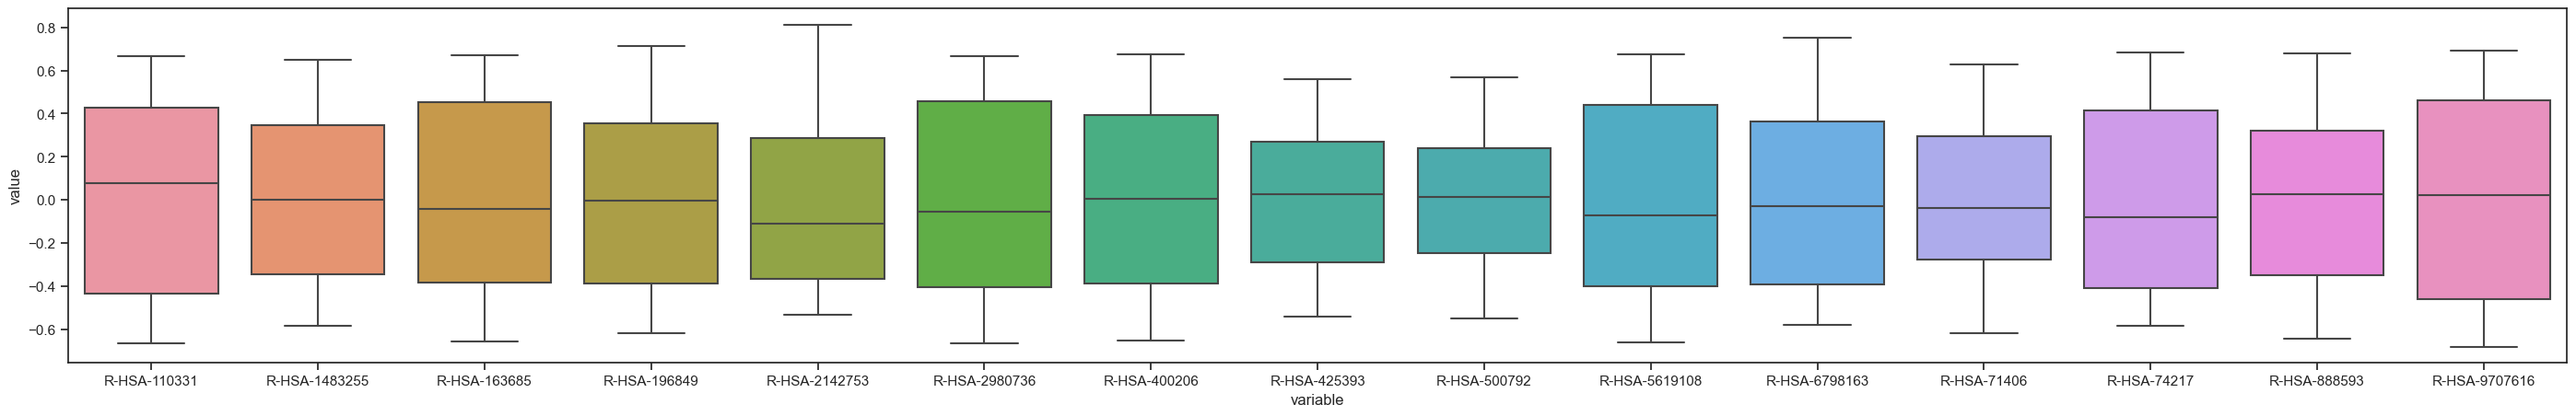

In [84]:
filter = kPCA_names.iloc[:,::10]
filter = pd.melt(filter)
plt.figure(figsize=(35,5))
sns.boxplot(x = 'variable' , y= 'value', data=filter)

In [85]:
# Add Group and WHO_status back

kpca_scores_meta = pd.merge(kPCA_names, su_data[["Group", "WHO_status"]],right_index= True, left_index= True)
kpca_scores_meta

R-HSA-110331  R-HSA-112310  R-HSA-112311  R-HSA-112315  \
sample_id                                                             
1004596         -0.132625      0.116570     -0.525324     -0.341057   
1008097         -0.066326      0.562160     -0.437752     -0.429874   
1008631         -0.635373      0.591693     -0.405636     -0.554063   
1012545         -0.006082     -0.097101     -0.408973     -0.134598   
1022407         -0.489754     -0.126461     -0.428649     -0.124315   
...                   ...           ...           ...           ...   
INCOV135-BL      0.623289      0.221956      0.119247     -0.192782   
INCOV136-BL      0.507104     -0.190711      0.415538      0.266411   
INCOV137-BL      0.629146     -0.021088      0.350175      0.058558   
INCOV139-BL      0.578855     -0.345034      0.102470      0.185720   
INCOV142-BL      0.467924     -0.403334      0.568511      0.392753   

             R-HSA-1237112  R-HSA-1368082  R-HSA-1368108  R-HSA-1428517  \
sample_id                                                                 
1004596          -0.589968       0.591590       0.591590       0.299798   
1008097          -0.473981      -0.647908      -0.647908      -0.243076   
1008631          -0.516610      -0.637767      -0.637767       0.231975   
1012545           0.483868       0.323059       0.323059       0.384479   
1022407          -0.291602       0.386204       0.386204      -0.108381   
...                    ...            ...            ...            ...   
INCOV135-BL       0.378288      -0.586796      -0.586796      -0.388396   
INCOV136-BL       0.623957       0.647968       0.647968      -0.516234   
INCOV137-BL       0.417775      -0.568340      -0.568340       0.540988   
INCOV139-BL       0.668055       0.685132       0.685132      -0.405828   
INCOV142-BL      -0.117090       0.684710       0.684710       0.317106   

             R-HSA-1483148  R-HSA-1483206  ...  R-HSA-9711123  R-HSA-9717189  \
sample_id                                  ...                                 
1004596           0.357311      -0.506412  ...       0.591590      -0.354446   
1008097          -0.036215      -0.499267  ...      -0.647908      -0.388074   
1008631           0.439055      -0.434929  ...      -0.637767       0.005851   
1012545           0.574675      -0.309088  ...       0.323059       0.281106   
1022407           0.634959      -0.333504  ...       0.386204      -0.439894   
...                    ...            ...  ...            ...            ...   
INCOV135-BL      -0.638504       0.191872  ...      -0.586796      -0.320906   
INCOV136-BL       0.455358       0.442776  ...       0.647968      -0.320380   
INCOV137-BL      -0.495511       0.572809  ...      -0.568340       0.399491   
INCOV139-BL       0.667057       0.347313  ...       0.685132       0.125505   
INCOV142-BL      -0.493211       0.520040  ...       0.684710       0.563533   

             R-HSA-9717207  R-HSA-9734207  R-HSA-9735804  R-HSA-9749641  \
sample_id                                                                 
1004596          -0.301712      -0.181516      -0.251663      -0.342181   
1008097          -0.342489      -0.168234      -0.331469       0.233177   
1008631          -0.006643      -0.468735      -0.450763      -0.205197   
1012545           0.260653      -0.000377      -0.061087      -0.509621   
1022407          -0.356451      -0.486571      -0.524493      -0.380291   
...                    ...            ...            ...            ...   
INCOV135-BL      -0.403381       0.382229       0.406984       0.101448   
INCOV136-BL      -0.319519       0.582675       0.615090       0.057158   
INCOV137-BL       0.400392       0.597079       0.662975       0.155841   
INCOV139-BL       0.222792       0.615859       0.660087       0.578107   
INCOV142-BL       0.508254       0.268815       0.319669       0.092651   

             R-HSA-9753281  R-HSA-975634           Group  WHO_status  
sample_id                

In [86]:
# Make a mean score for each group for each pathway 
# Add that as a node attriiubute - mean in COVID and mean in control for each pathway node 

In [87]:
# Filter kPCA to reduce number of pathways

kpca_scores_filt = kpca_scores_meta.iloc[:,:160:10]
kpca_scores_filt.shape

(263, 16)

In [88]:
# Average kPCA by Group and average kPCA by WHO_status

kPCA_WHO_status =kpca_scores_meta.groupby(by="WHO_status").mean()
kPCA_Group =kpca_scores_meta.groupby(by="Group").mean()

In [89]:
# Restack
kPCA_WHO_status_stack = kPCA_WHO_status.stack().reset_index()
kPCA_WHO_status_stack.columns = ["WHO_status", "Pathway", "Mean_Pathway_score"]
kPCA_WHO_status_stack

WHO_status        Pathway  Mean_Pathway_score
0            0   R-HSA-110331           -0.288637
1            0   R-HSA-112310            0.101868
2            0   R-HSA-112311           -0.142209
3            0   R-HSA-112315           -0.158051
4            0  R-HSA-1237112           -0.296531
..         ...            ...                 ...
591        5-7  R-HSA-9734207            0.362994
592        5-7  R-HSA-9735804            0.420997
593        5-7  R-HSA-9749641            0.250507
594        5-7  R-HSA-9753281            0.042001
595        5-7   R-HSA-975634           -0.009944

[596 rows x 3 columns]

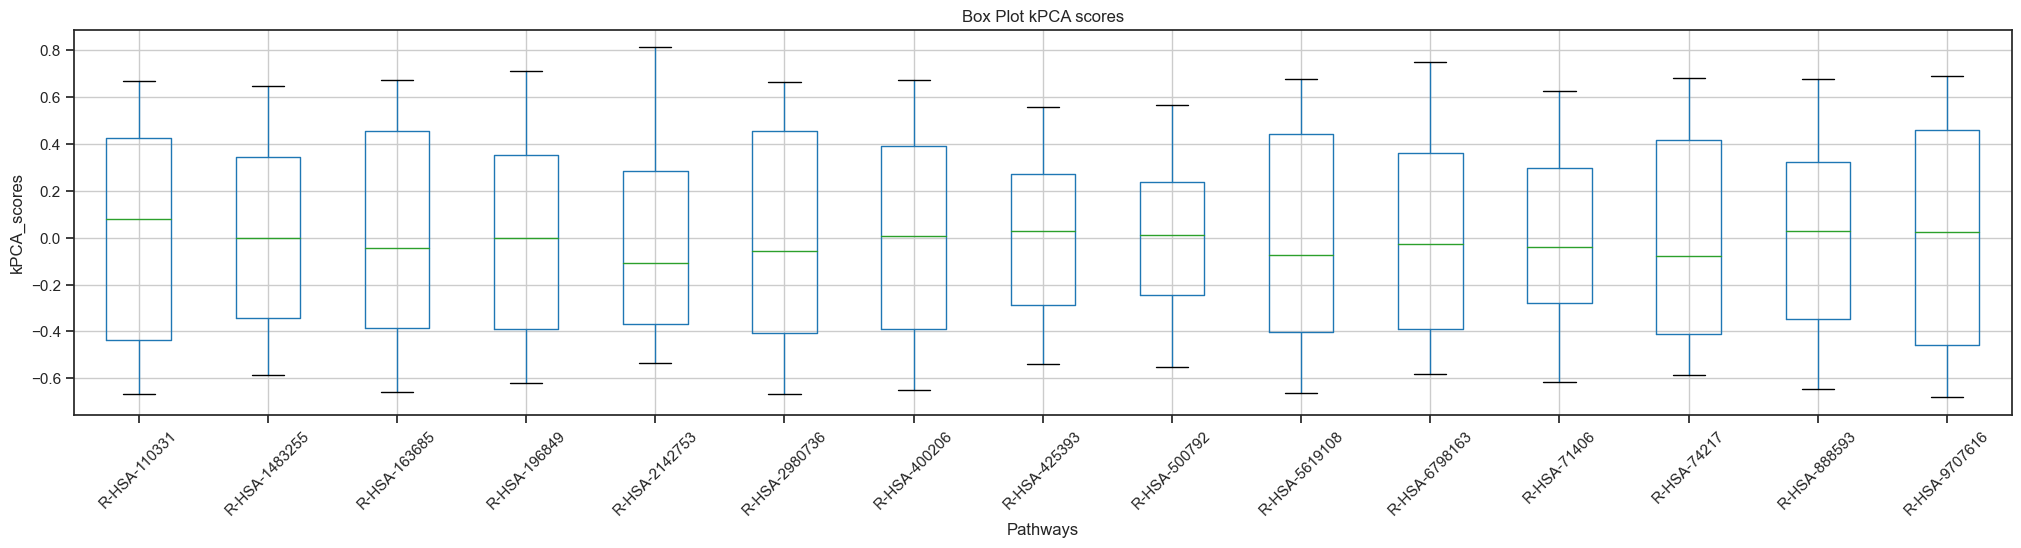

In [90]:
# Boxplot of kPCA using Pandas

plt.figure(figsize=(25,5))
kpca_scores_filt.boxplot(rot=45)
plt.title("Box Plot kPCA scores")
plt.xlabel("Pathways")
plt.ylabel("kPCA_scores")

#plt.savefig('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Plots_COVID/kPCA_boxplot.png', dpi= 300, bbox_inches='tight')
plt.show()

<Figure size 2000x1000 with 0 Axes>

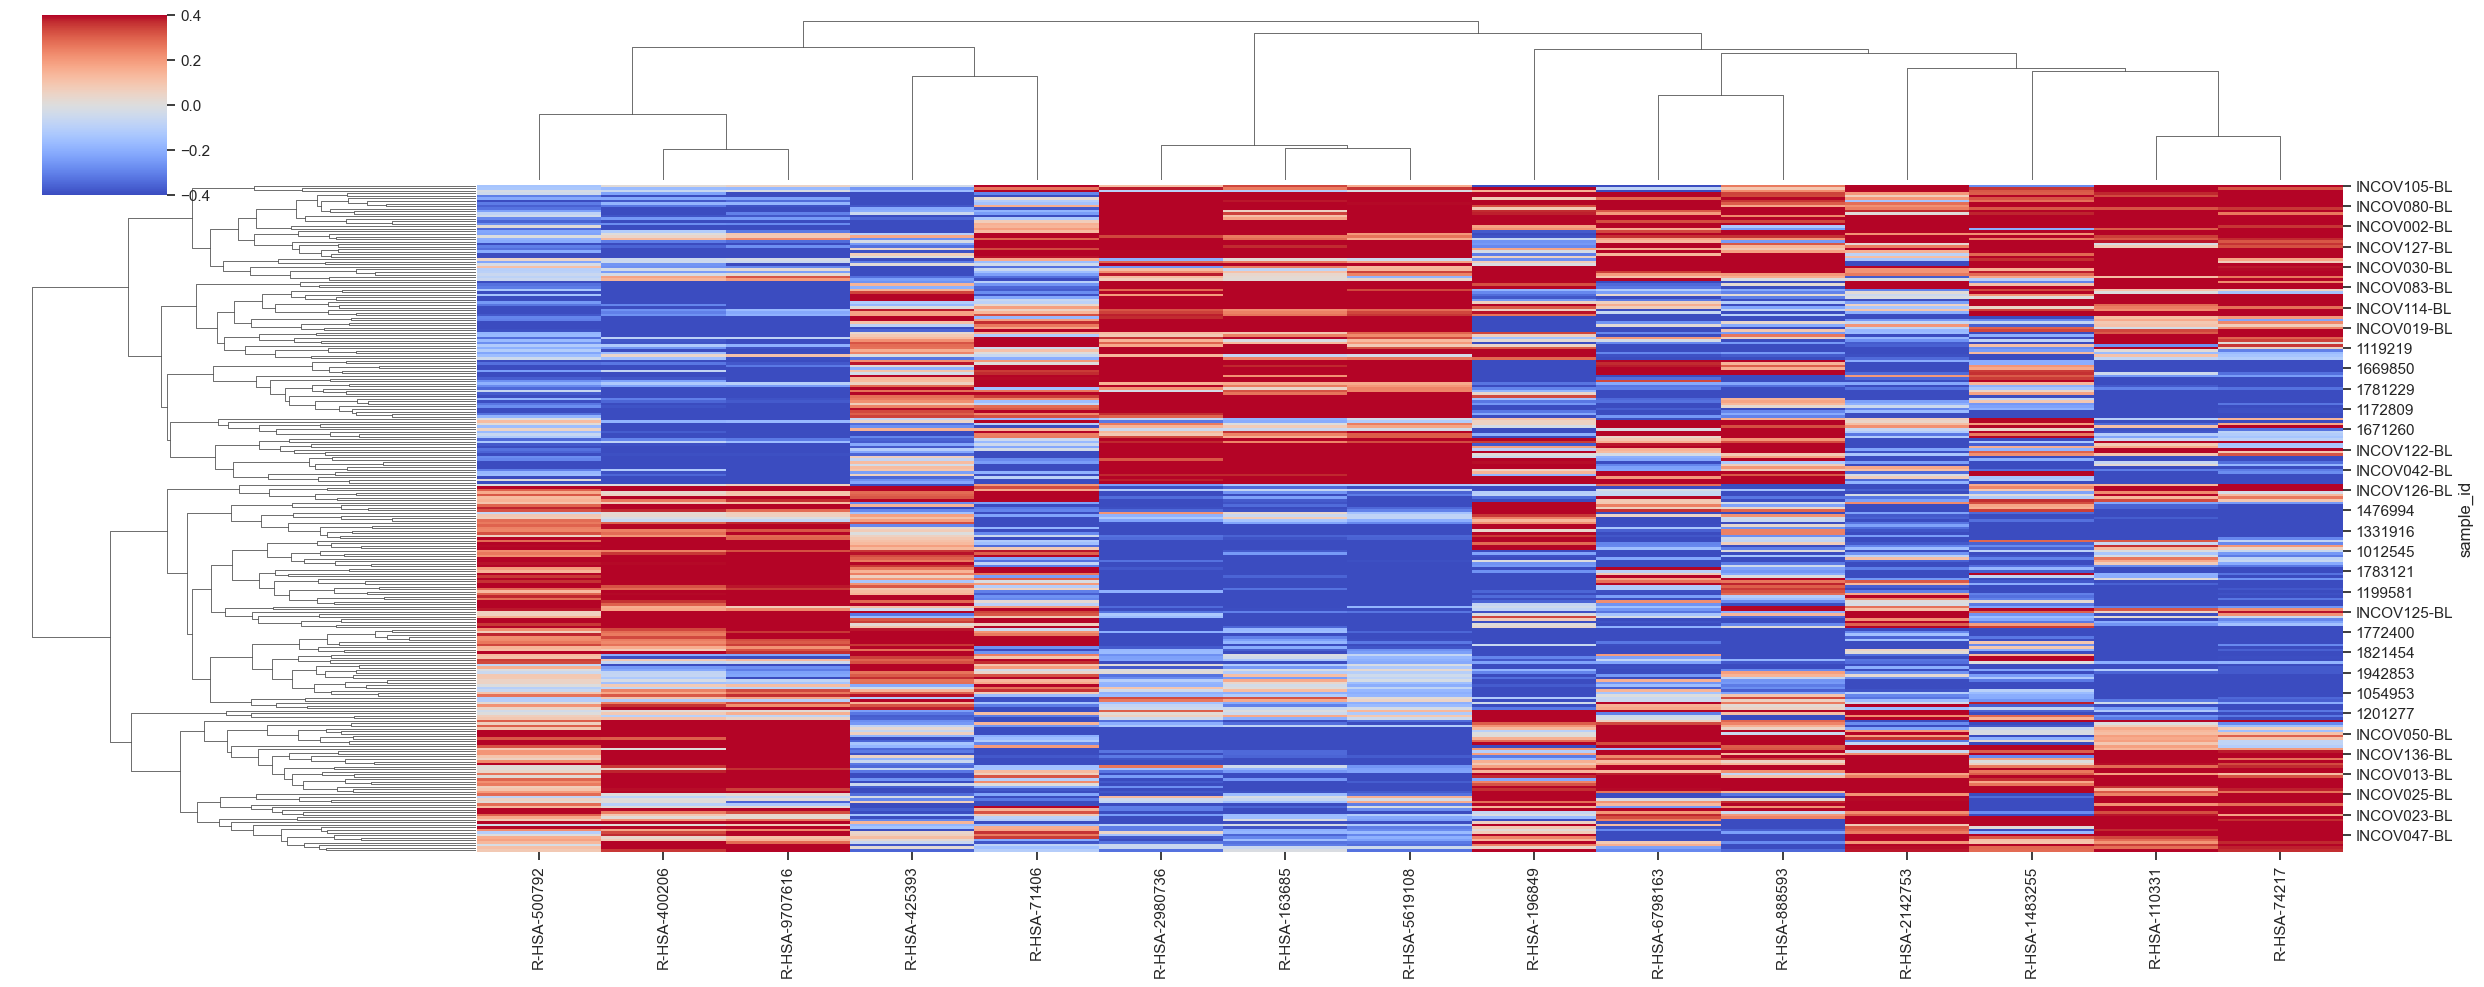

In [91]:
# Clustered heatmap

plt.figure(figsize=(20,10))
sns.clustermap(kpca_scores_filt.iloc[:,:-1], cmap= "coolwarm", vmin=-0.4, vmax=0.4, figsize = (25,10))


<Figure size 2000x500 with 0 Axes>

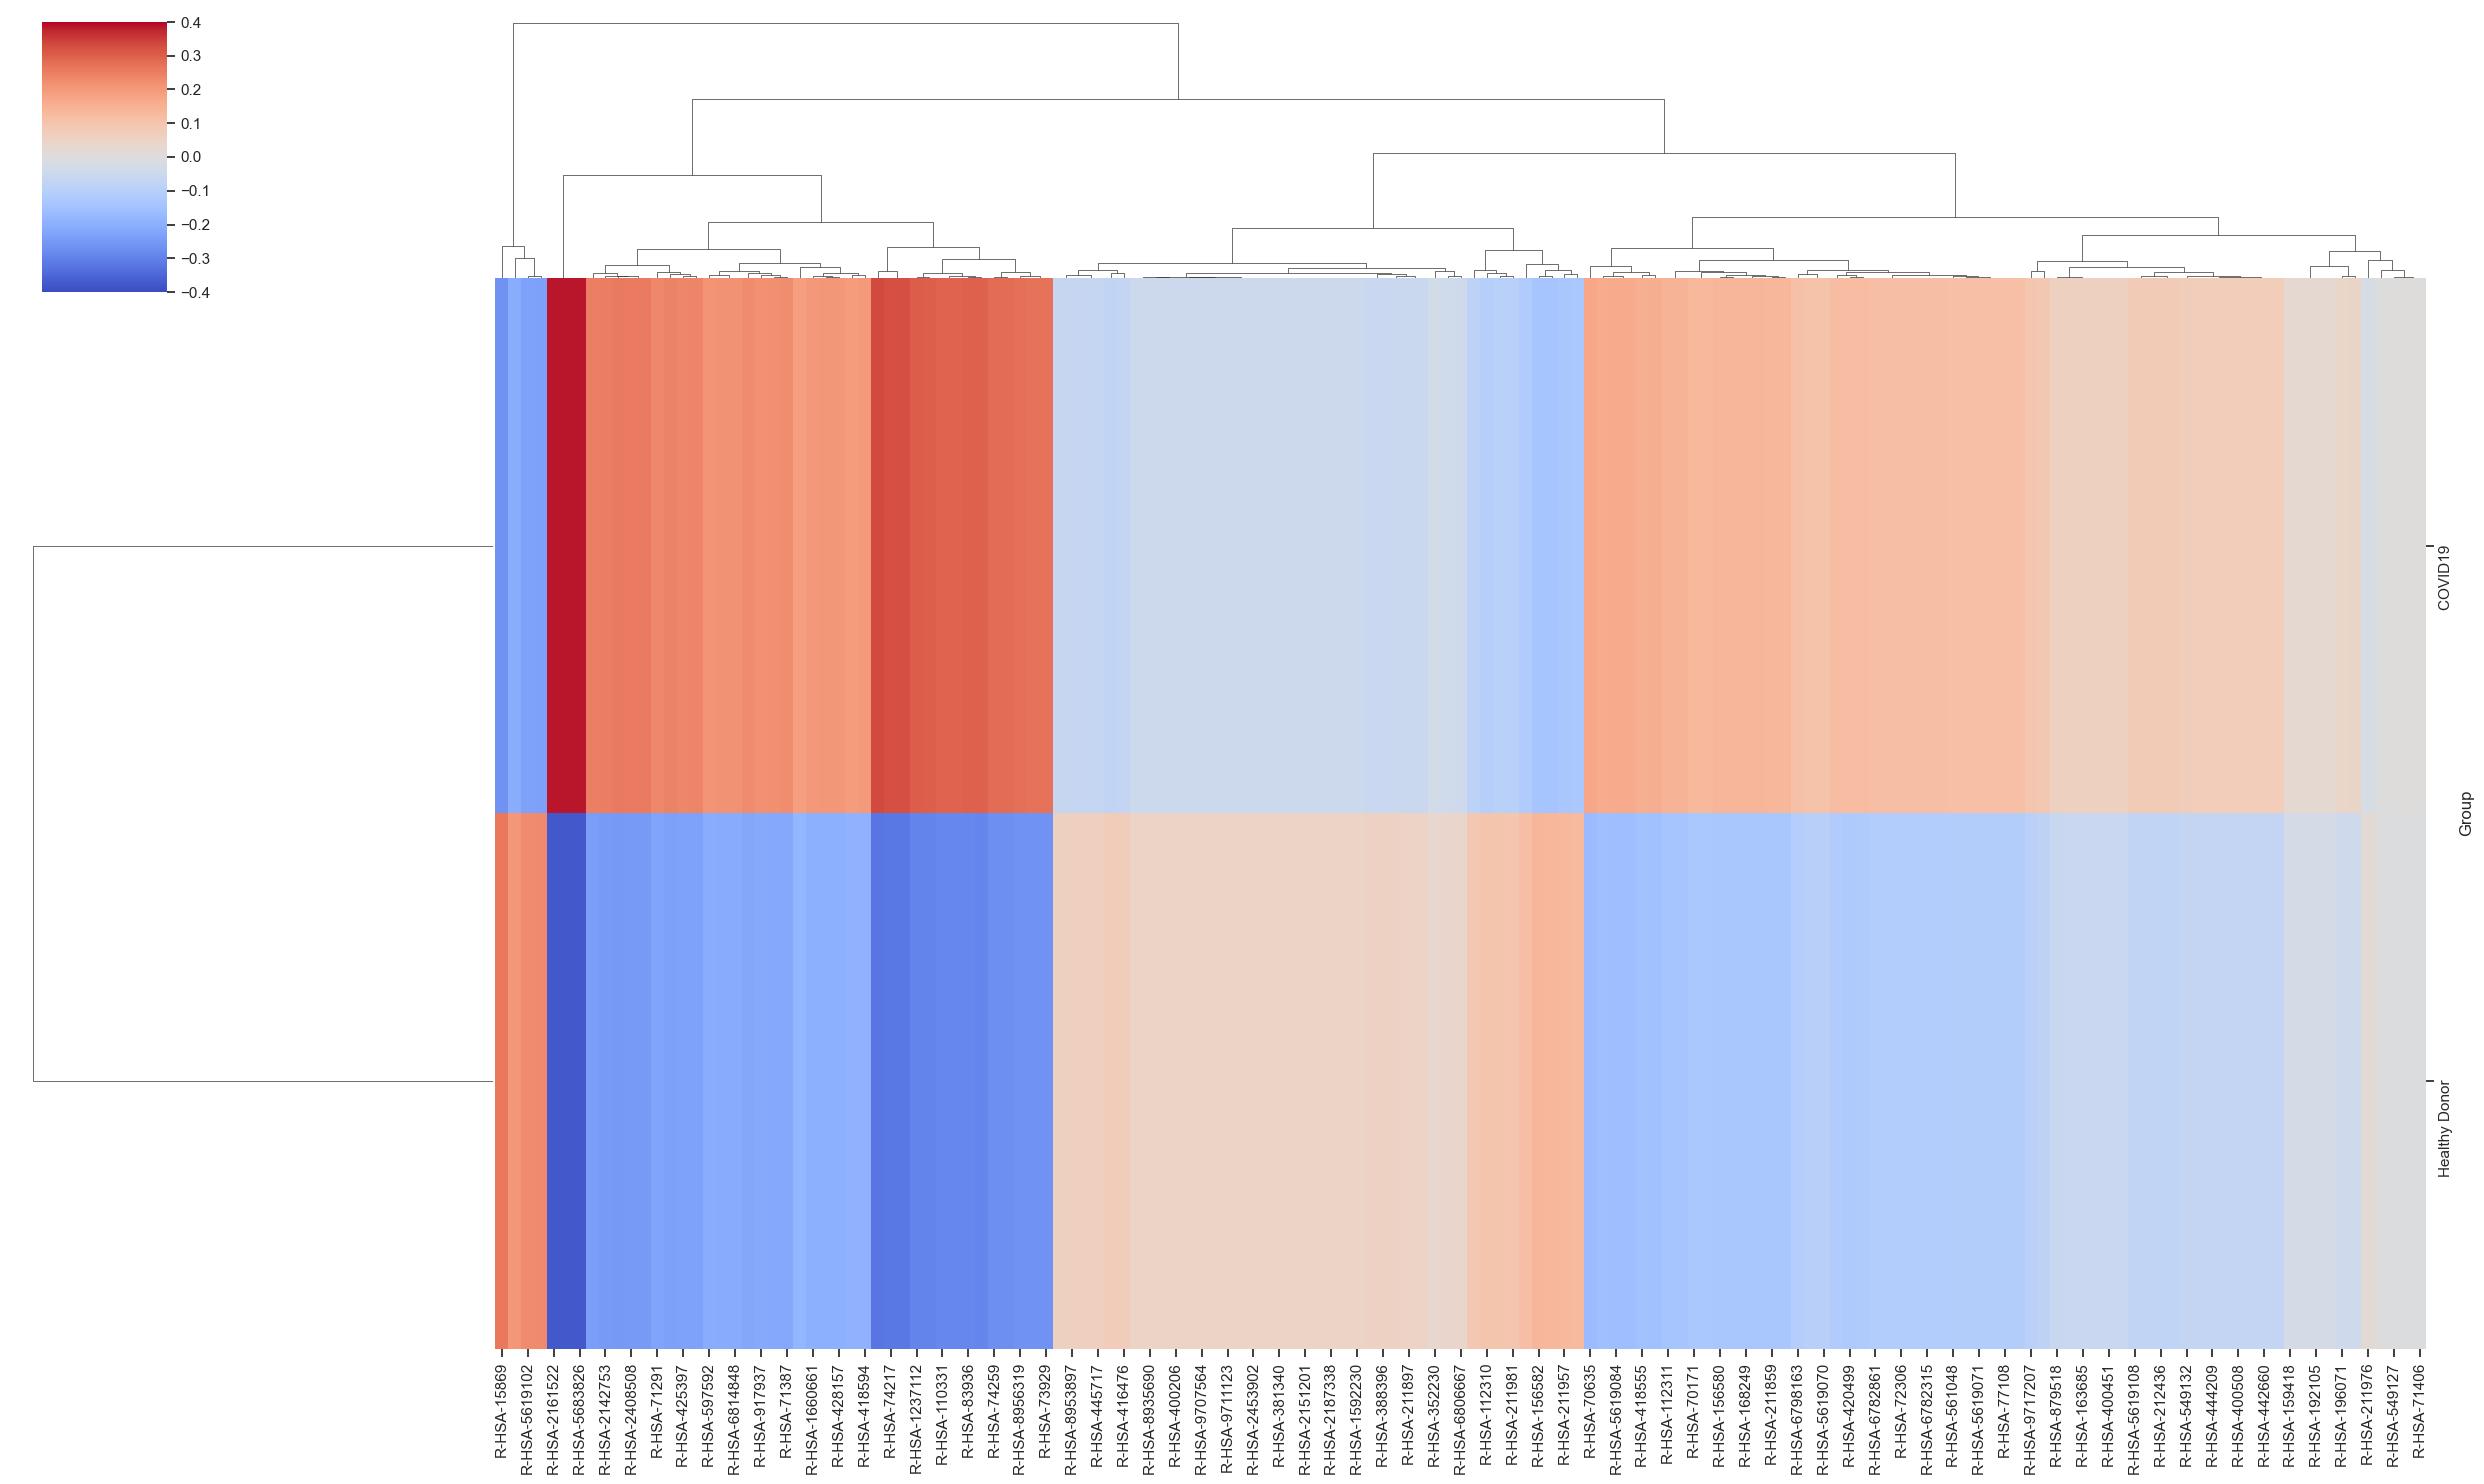

In [92]:
# Clustered heatmap by Group

plt.figure(figsize=(20,5))
sns.clustermap(kPCA_Group, cmap= "coolwarm", figsize = (25,15), vmin=-0.4, vmax=0.4,)
#plt.savefig('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Plots_kPCA_COVID/clutstered_heatmap_group.png', dpi= 300, bbox_inches='tight')


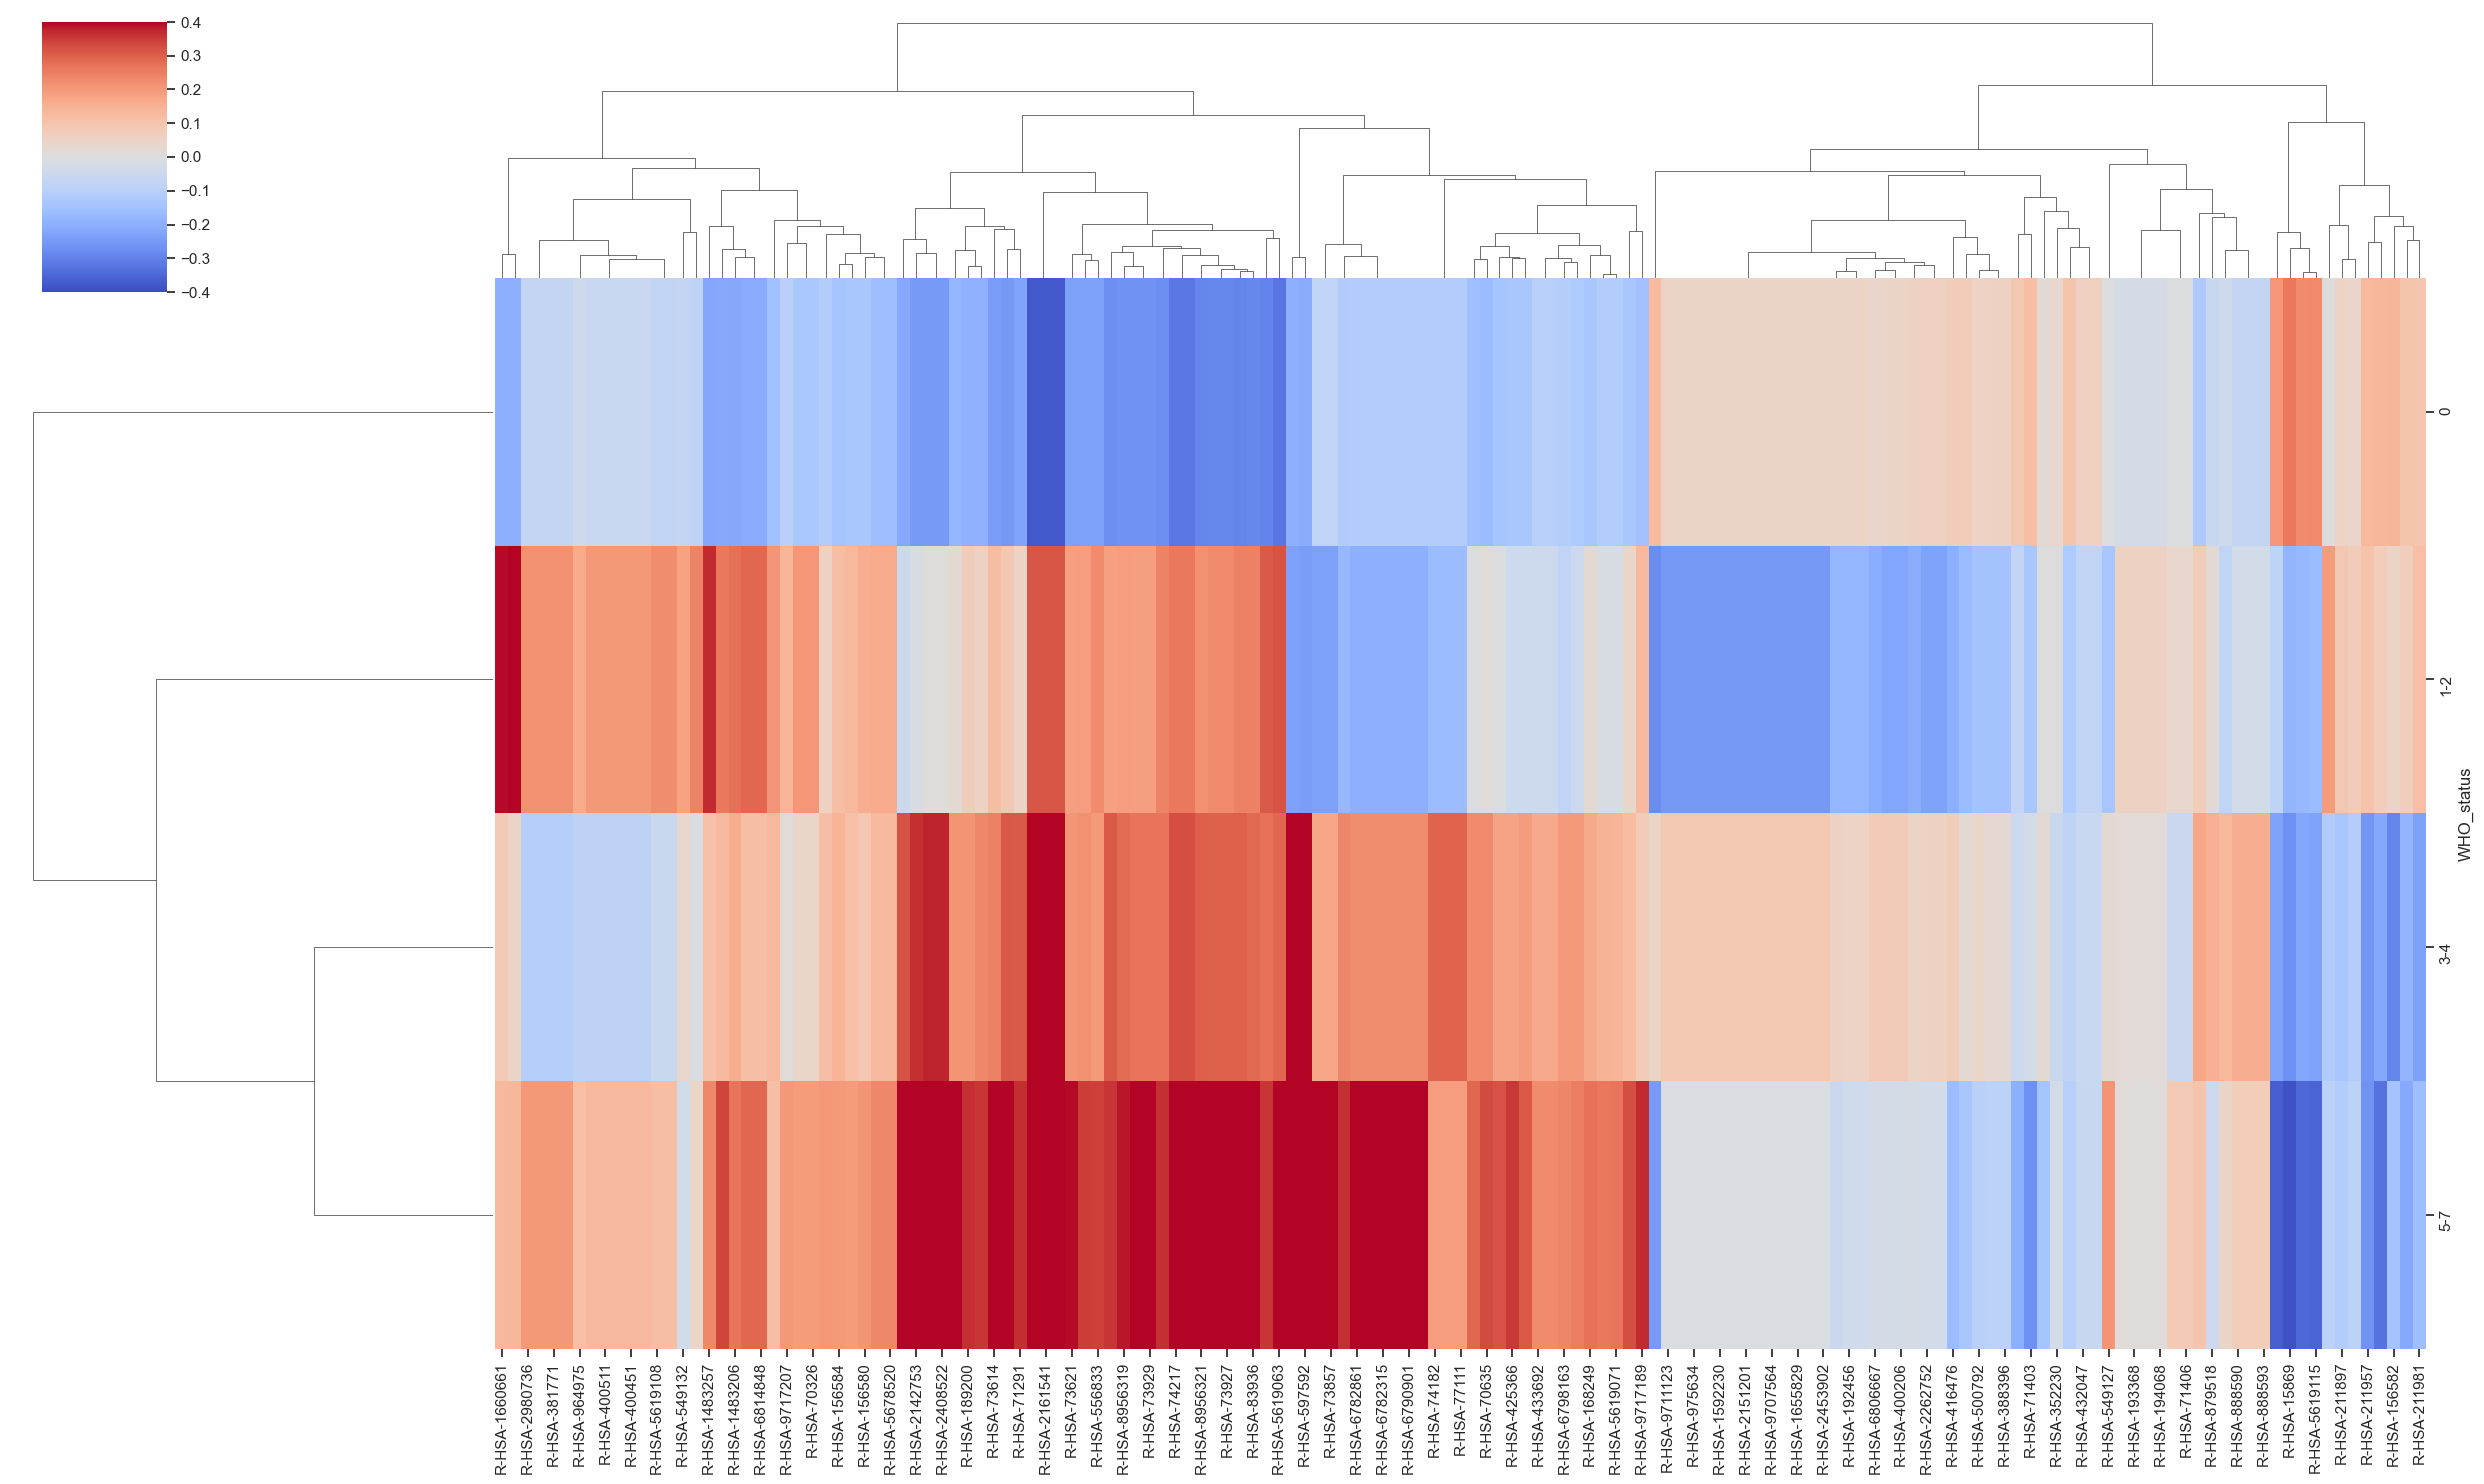

In [93]:
# Clustered heatmap by WHO_status

sns.clustermap(kPCA_WHO_status, cmap= "coolwarm", vmin=-0.4, vmax=0.4, figsize = (25,15))
plt.savefig('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Plots_kPCA_COVID/clutstered_heatmap_who.png', dpi= 300, bbox_inches='tight')

<Figure size 3000x2000 with 0 Axes>

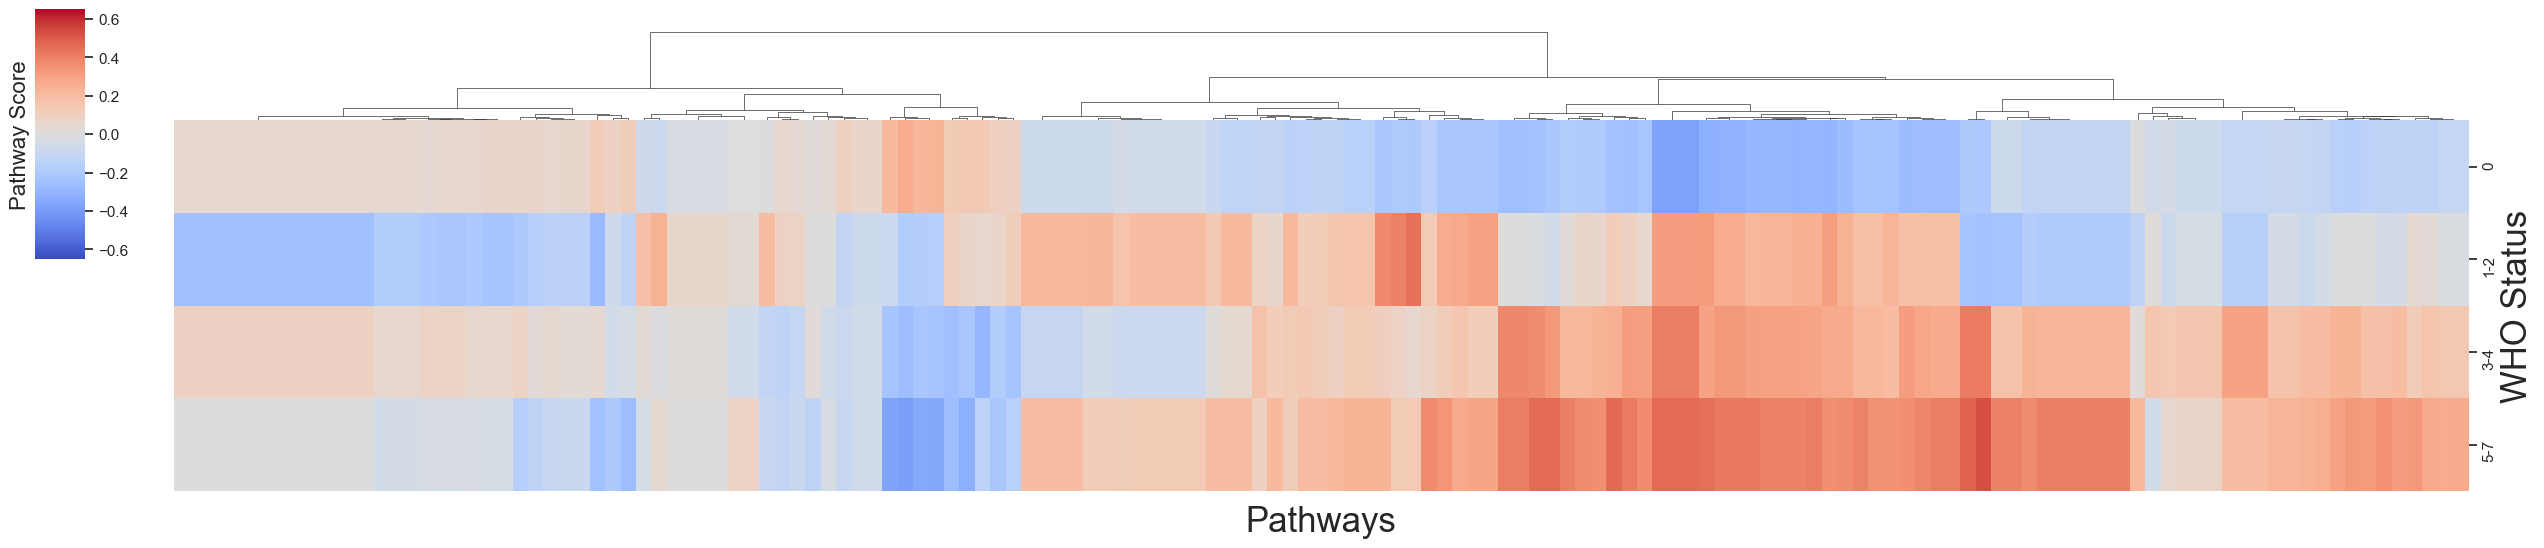

In [94]:
# Clustered heatmap by WHO status

plt.figure(figsize=(30,20))

g_pathway_who = sns.clustermap(kPCA_WHO_status, cmap= "coolwarm", figsize = (25, 5), vmin=-0.65, vmax=0.65, method = 'ward', xticklabels = False,  row_cluster=False,
    dendrogram_ratio=(0.05, .2), cbar_pos=(0, .5, .02, .5))
g_pathway_who.ax_cbar.set_ylabel("Pathway Score",size=16, labelpad=-85)
g_pathway_who.ax_heatmap.set_xlabel("Pathways", fontsize=25)
g_pathway_who.ax_heatmap.set_ylabel("WHO Status", fontsize=25)


plt.show()

In [95]:
# PCA analysis

# To calculate PCA
from sklearn.decomposition import PCA
kPCA_pca = PCA(n_components=2).fit_transform(kPCA_names)
kPCA_pca

#Convert PCA from array into a dataframe
kPCA_pca_df = pd.DataFrame(data = kPCA_pca, columns = ['PC1', 'PC2'], index=kpca_scores_meta.index)
kPCA_pca_df


PC1       PC2
sample_id                      
1004596      3.516710 -1.597888
1008097     -2.685280 -3.335722
1008631     -2.177287 -2.941238
1012545      2.922851 -1.608871
1022407      4.017393 -1.533984
...               ...       ...
INCOV135-BL -2.865569  0.056006
INCOV136-BL  2.306912  4.472946
INCOV137-BL -4.088721  2.413588
INCOV139-BL  2.286032  3.921798
INCOV142-BL  1.061363  3.927538

[263 rows x 2 columns]

In [96]:
# Merge data frame to add metadata back

kPCA_pca_merge = pd.merge(kPCA_pca_df, kpca_scores_meta[["Group", "WHO_status"]], right_index= True, left_index= True)
kPCA_pca_merge

PC1       PC2           Group WHO_status
sample_id                                                 
1004596      3.516710 -1.597888  Healthy Donor           0
1008097     -2.685280 -3.335722  Healthy Donor           0
1008631     -2.177287 -2.941238  Healthy Donor           0
1012545      2.922851 -1.608871  Healthy Donor           0
1022407      4.017393 -1.533984  Healthy Donor           0
...               ...       ...             ...        ...
INCOV135-BL -2.865569  0.056006        COVID19         1-2
INCOV136-BL  2.306912  4.472946        COVID19         3-4
INCOV137-BL -4.088721  2.413588        COVID19         5-7
INCOV139-BL  2.286032  3.921798        COVID19         3-4
INCOV142-BL  1.061363  3.927538        COVID19         5-7

[263 rows x 4 columns]

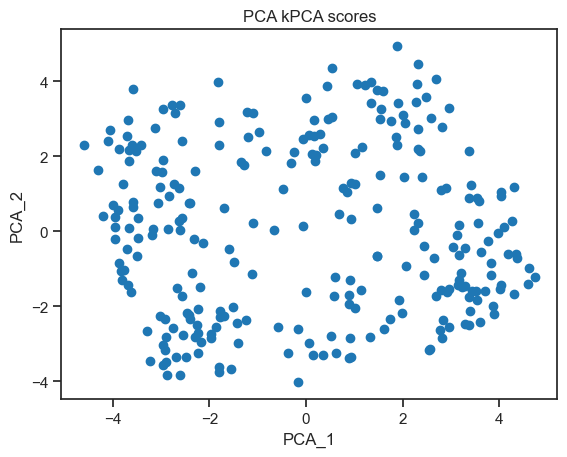

In [97]:
# Graph PCA results
plt.title("PCA kPCA scores")
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.scatter(kPCA_pca_merge.PC1, kPCA_pca_merge.PC2)


<AxesSubplot:title={'center':'PCA kPCA scores'}, xlabel='PCA_1', ylabel='PCA_2'>

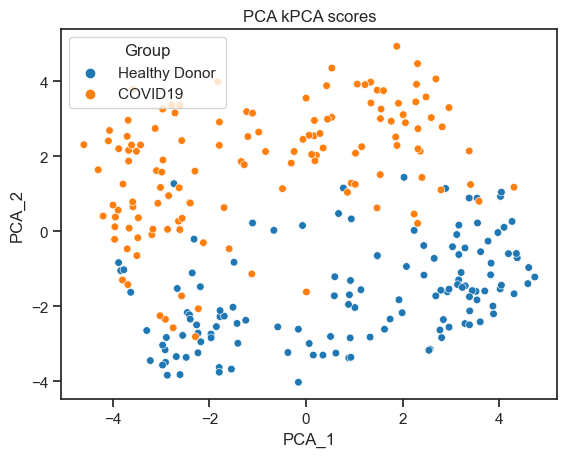

In [98]:
#PCA WHO Status

plt.title("PCA kPCA scores")
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
sns.scatterplot(x=kPCA_pca[:, 0 ], y=kPCA_pca[:, 1], hue=kPCA_pca_merge["Group"], s=30)



<AxesSubplot:title={'center':'PCA kPCA scores'}, xlabel='PC1', ylabel='PC2'>

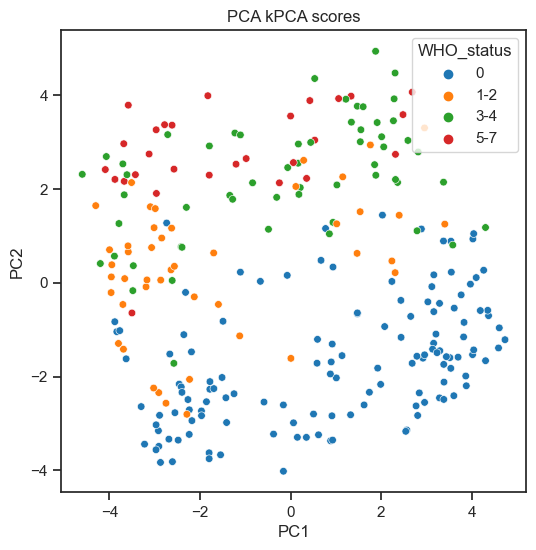

In [99]:
#PCA WHO Status
plt.figure(figsize=(6,6))
plt.title("PCA kPCA scores")
plt.xlabel("PC1")
plt.ylabel("PC2")
sns.scatterplot(x=kPCA_pca[:, 0], y=kPCA_pca[:, 1], hue=kPCA_pca_merge["WHO_status"], hue_order=['0','1-2','3-4','5-7'], s=30)


In [100]:
# Calculate p-value

kPCA_ttest_pval = sspa.t_tests(kPCA_names,kpca_scores_meta["Group"],"fdr_bh")

#Sort by value
kPCA_ttest_pval = kPCA_ttest_pval.sort_values("P-adjust")
kPCA_ttest_pval

# make a new column using log10
kPCA_ttest_pval["-log10_P_adjusted"] = -np.log10(kPCA_ttest_pval["P-adjust"])
kPCA_ttest_pval


Entity       P-value      P-adjust  -log10_P_adjusted
85   R-HSA-5619063  1.429531e-69  2.130001e-67          66.671620
134  R-HSA-8956321  8.839744e-67  6.585610e-65          64.181404
95   R-HSA-5683826  1.067469e-65  3.181057e-64          63.497429
42   R-HSA-2161522  1.067469e-65  3.181057e-64          63.497429
43   R-HSA-2161541  1.067469e-65  3.181057e-64          63.497429
..             ...           ...           ...                ...
37    R-HSA-211976  4.084241e-01  4.196910e-01           0.377070
81    R-HSA-549127  7.510258e-01  7.664579e-01           0.115512
110    R-HSA-71406  8.189446e-01  8.216209e-01           0.085329
136  R-HSA-8978868  8.216209e-01  8.216209e-01           0.085329
7    R-HSA-1428517  8.189446e-01  8.216209e-01           0.085329

[149 rows x 4 columns]

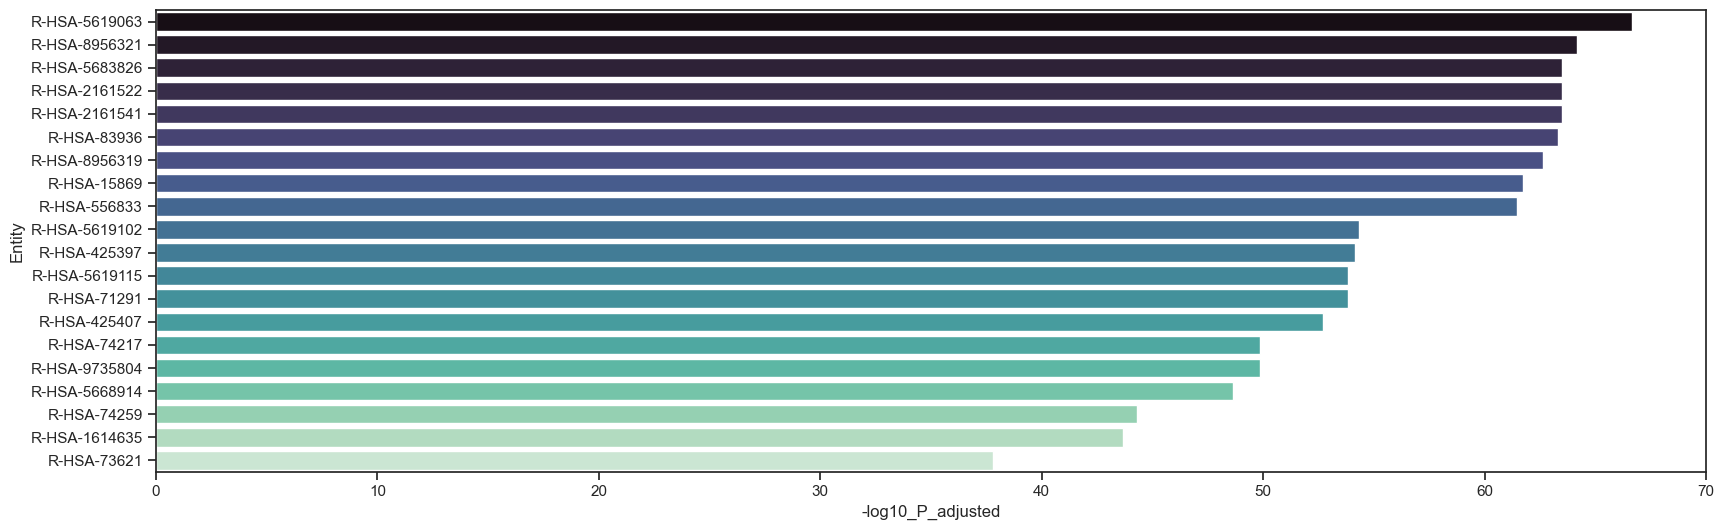

In [101]:
# View top 20 kPCA - P-adjusted 
kPCA_top_20_pathways = kPCA_ttest_pval.iloc[:20, :] #select the top 20 most significant pathways
plt.figure(figsize=(20, 6))
sns.barplot(data=kPCA_top_20_pathways, y="Entity", x="-log10_P_adjusted", orient="h", palette="mako")
#plt.axvline(0.05, c="black")
plt.savefig('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Plots_kPCA_COVID/Top_10_kPCA_ttest.png', dpi= 300, bbox_inches='tight')
plt.show()
# Ask how to convert this to a log scale? 



Calculating Correlations

In [102]:
kPCA_names = kPCA_names.iloc[:, :-1]
kPCA_names

R-HSA-110331  R-HSA-112310  R-HSA-112311  R-HSA-112315  \
sample_id                                                             
1004596         -0.132625      0.116570     -0.525324     -0.341057   
1008097         -0.066326      0.562160     -0.437752     -0.429874   
1008631         -0.635373      0.591693     -0.405636     -0.554063   
1012545         -0.006082     -0.097101     -0.408973     -0.134598   
1022407         -0.489754     -0.126461     -0.428649     -0.124315   
...                   ...           ...           ...           ...   
INCOV135-BL      0.623289      0.221956      0.119247     -0.192782   
INCOV136-BL      0.507104     -0.190711      0.415538      0.266411   
INCOV137-BL      0.629146     -0.021088      0.350175      0.058558   
INCOV139-BL      0.578855     -0.345034      0.102470      0.185720   
INCOV142-BL      0.467924     -0.403334      0.568511      0.392753   

             R-HSA-1237112  R-HSA-1368082  R-HSA-1368108  R-HSA-1428517  \
sample_id                                                                 
1004596          -0.589968       0.591590       0.591590       0.299798   
1008097          -0.473981      -0.647908      -0.647908      -0.243076   
1008631          -0.516610      -0.637767      -0.637767       0.231975   
1012545           0.483868       0.323059       0.323059       0.384479   
1022407          -0.291602       0.386204       0.386204      -0.108381   
...                    ...            ...            ...            ...   
INCOV135-BL       0.378288      -0.586796      -0.586796      -0.388396   
INCOV136-BL       0.623957       0.647968       0.647968      -0.516234   
INCOV137-BL       0.417775      -0.568340      -0.568340       0.540988   
INCOV139-BL       0.668055       0.685132       0.685132      -0.405828   
INCOV142-BL      -0.117090       0.684710       0.684710       0.317106   

             R-HSA-1483148  R-HSA-1483206  ...  R-HSA-9707564  R-HSA-9707616  \
sample_id                                  ...                                 
1004596           0.357311      -0.506412  ...       0.591590       0.591590   
1008097          -0.036215      -0.499267  ...      -0.647908      -0.647908   
1008631           0.439055      -0.434929  ...      -0.637767      -0.637767   
1012545           0.574675      -0.309088  ...       0.323059       0.323059   
1022407           0.634959      -0.333504  ...       0.386204       0.386204   
...                    ...            ...  ...            ...            ...   
INCOV135-BL      -0.638504       0.191872  ...      -0.586796      -0.586796   
INCOV136-BL       0.455358       0.442776  ...       0.647968       0.647968   
INCOV137-BL      -0.495511       0.572809  ...      -0.568340      -0.568340   
INCOV139-BL       0.667057       0.347313  ...       0.685132       0.685132   
INCOV142-BL      -0.493211       0.520040  ...       0.684710       0.684710   

             R-HSA-9711123  R-HSA-9717189  R-HSA-9717207  R-HSA-9734207  \
sample_id                                                                 
1004596           0.591590      -0.354446      -0.301712      -0.181516   
1008097          -0.647908      -0.388074      -0.342489      -0.168234   
1008631          -0.637767       0.005851      -0.006643      -0.468735   
1012545           0.323059       0.281106       0.260653      -0.000377   
1022407           0.386204      -0.439894      -0.356451      -0.486571   
...                    ...            ...            ...            ...   
INCOV135-BL      -0.586796      -0.320906      -0.403381       0.382229   
INCOV136-BL       0.647968      -0.320380      -0.319519       0.582675   
INCOV137-BL      -0.568340       0.399491       0.400392       0.597079   
INCOV139-BL       0.685132       0.125505       0.222792       0.615859   
INCOV142-BL       0.684710       0.563533       0.508254       0.268815   

             R-HSA-9735804  R-HSA-9749641  R-HSA-9753281  R-HSA-975634  
sample_id              

In [103]:
# Calculate correlation between pathways
#kPCA_names = kPCA_names.iloc[:,:-1] ##  Drop "target" which comes from the T test

kpca_scores_corr = kPCA_names.corr(method='spearman')


In [104]:
# Calculate p-value for correlation 

correlation_t_test, pval = stats.spearmanr(kPCA_names, axis=0, nan_policy='propagate', alternative='two-sided')

#Put into a dataframe and pval
correlation_t_test = pd.DataFrame(correlation_t_test, columns = kpca_scores_corr.columns, index=kpca_scores_corr.index)
pval_corr = pd.DataFrame(pval, columns = kpca_scores_corr.columns, index=kpca_scores_corr.index)


In [105]:
#Transform into a links data frame
pval_corr_list = pval_corr.stack().reset_index()
pval_corr_list.columns = ["Pathway_1", "Pathway_2", "p_val"]
pval_corr_list

Pathway_1      Pathway_2         p_val
0      R-HSA-110331   R-HSA-110331  0.000000e+00
1      R-HSA-110331   R-HSA-112310  5.486517e-09
2      R-HSA-110331   R-HSA-112311  5.821297e-11
3      R-HSA-110331   R-HSA-112315  6.655964e-18
4      R-HSA-110331  R-HSA-1237112  2.269312e-48
...             ...            ...           ...
22196  R-HSA-975634  R-HSA-9734207  6.806149e-01
22197  R-HSA-975634  R-HSA-9735804  4.199130e-01
22198  R-HSA-975634  R-HSA-9749641  1.831827e-01
22199  R-HSA-975634  R-HSA-9753281  7.262464e-01
22200  R-HSA-975634   R-HSA-975634  0.000000e+00

[22201 rows x 3 columns]

In [106]:
#Transform into a links data frame
corr = correlation_t_test.stack().reset_index()
corr.columns = ["Pathway_1", "Pathway_2", "Correlation"]
corr["Correlation_abs"]= abs(corr["Correlation"])
corr


Pathway_1      Pathway_2  Correlation  Correlation_abs
0      R-HSA-110331   R-HSA-110331     1.000000         1.000000
1      R-HSA-110331   R-HSA-112310    -0.349838         0.349838
2      R-HSA-110331   R-HSA-112311     0.389574         0.389574
3      R-HSA-110331   R-HSA-112315     0.498185         0.498185
4      R-HSA-110331  R-HSA-1237112     0.747982         0.747982
...             ...            ...          ...              ...
22196  R-HSA-975634  R-HSA-9734207    -0.025499         0.025499
22197  R-HSA-975634  R-HSA-9735804    -0.049942         0.049942
22198  R-HSA-975634  R-HSA-9749641     0.082327         0.082327
22199  R-HSA-975634  R-HSA-9753281    -0.021690         0.021690
22200  R-HSA-975634   R-HSA-975634     1.000000         1.000000

[22201 rows x 4 columns]

Text(0.5, 1.0, 'KPCA Correlation Distribution')

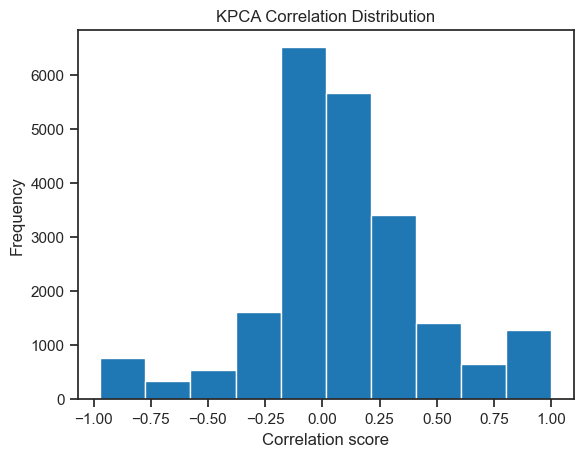

In [107]:
# Histogram of correlation score adjusted to >0.5
# Look at correlation of distribtuion
plt.hist(x=corr["Correlation"])
plt.xlabel('Correlation score')
plt.ylabel('Frequency')
plt.title('KPCA Correlation Distribution')

Text(0, 0.5, 'Frequency')

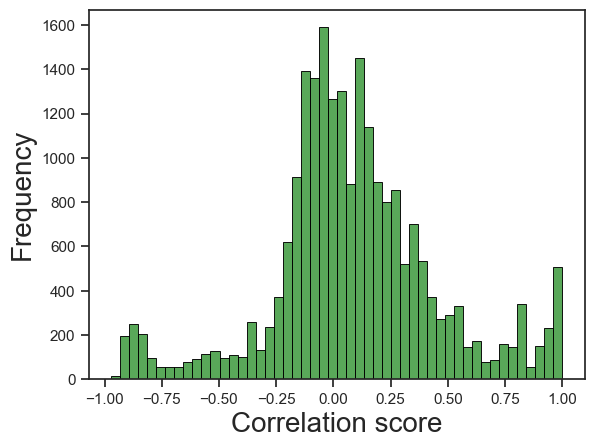

In [108]:
sns.histplot(data=corr["Correlation"], bins=50, legend = False, color = 'forestgreen', edgecolor = 'black')
plt.xlabel('Correlation score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
#plt.title('Metabolite kPCA Correlation Distribution')

/Users/sarapatti/opt/anaconda3/envs/Python_3104/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


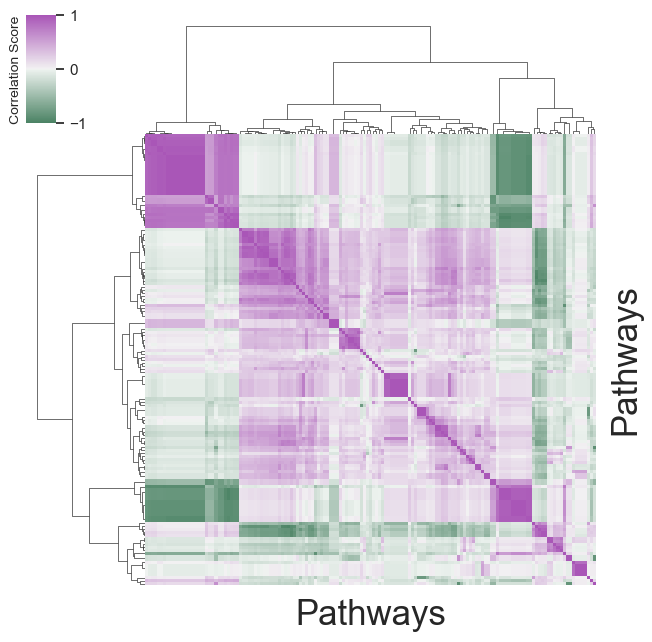

In [109]:
# Clusterheat map of correlation

color = sns.diverging_palette(145, 300, s=60, as_cmap=True)
g_pathway_who = sns.clustermap(correlation_t_test, cmap= color, figsize = (6, 6), vmin=-1, vmax=1, method = 'ward', xticklabels = False,  yticklabels = False)
g_pathway_who.ax_cbar.set_ylabel("Correlation Score",size=10, labelpad=-55)
g_pathway_who.ax_heatmap.set_xlabel("Pathways", fontsize=25)
g_pathway_who.ax_heatmap.set_ylabel("Pathways", fontsize=25)


plt.show()

In [110]:
# Do multi testing corrections - calculate fdr_bh p val

pvals_corrected_stats = statsmodels.stats.multitest.multipletests(pval_corr_list["p_val"], alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)
reject = pvals_corrected_stats[0]
pvals_corrected = pvals_corrected_stats[1]
alphacBonf = pvals_corrected_stats[2]

# Put p value into a dataframe
pvals_corrected_df = pd.DataFrame(pvals_corrected, columns = ["p_val_adjust"])

# Merge dataframes
kpca_scores_corr_pval = corr.merge(pval_corr_list["p_val"], right_index= True, left_index = True)
kpca_scores_corr_pval = kpca_scores_corr_pval.merge(pvals_corrected_df["p_val_adjust"], right_index= True, left_index = True)
kpca_scores_corr_pval

Pathway_1      Pathway_2  Correlation  Correlation_abs  \
0      R-HSA-110331   R-HSA-110331     1.000000         1.000000   
1      R-HSA-110331   R-HSA-112310    -0.349838         0.349838   
2      R-HSA-110331   R-HSA-112311     0.389574         0.389574   
3      R-HSA-110331   R-HSA-112315     0.498185         0.498185   
4      R-HSA-110331  R-HSA-1237112     0.747982         0.747982   
...             ...            ...          ...              ...   
22196  R-HSA-975634  R-HSA-9734207    -0.025499         0.025499   
22197  R-HSA-975634  R-HSA-9735804    -0.049942         0.049942   
22198  R-HSA-975634  R-HSA-9749641     0.082327         0.082327   
22199  R-HSA-975634  R-HSA-9753281    -0.021690         0.021690   
22200  R-HSA-975634   R-HSA-975634     1.000000         1.000000   

              p_val  p_val_adjust  
0      0.000000e+00  0.000000e+00  
1      5.486517e-09  1.218062e-04  
2      5.821297e-11  1.292386e-06  
3      6.655964e-18  1.477691e-13  
4      2.269312e-48  5.038100e-44  
...             ...           ...  
22196  6.806149e-01  1.000000e+00  
22197  4.199130e-01  1.000000e+00  
22198  1.831827e-01  1.000000e+00  
22199  7.262464e-01  1.000000e+00  
22200  0.000000e+00  0.000000e+00  

[22201 rows x 6 columns]

Text(0.5, 1.0, 'Metabolite kPCA Correlation Distribution')

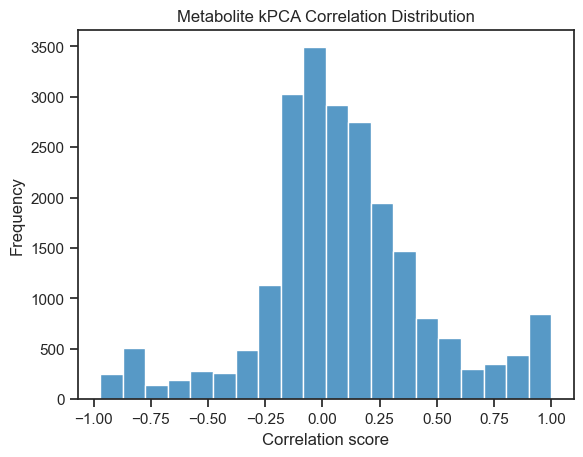

In [111]:
sns.histplot(data=kpca_scores_corr_pval["Correlation"], bins = 20, legend = False)
plt.xlabel('Correlation score')
plt.ylabel('Frequency')
plt.title('Metabolite kPCA Correlation Distribution')

In [112]:
# Sort by adjusted p value

kpca_scores_corr_pval_sort = kpca_scores_corr_pval.sort_values(by = ["p_val_adjust"])
kpca_scores_corr_pval_sort

Pathway_1      Pathway_2  Correlation  Correlation_abs     p_val  \
0       R-HSA-110331   R-HSA-110331     1.000000         1.000000  0.000000   
6695   R-HSA-2187338  R-HSA-9707564     1.000000         1.000000  0.000000   
6696   R-HSA-2187338  R-HSA-9707616     1.000000         1.000000  0.000000   
6697   R-HSA-2187338  R-HSA-9711123     1.000000         1.000000  0.000000   
6704   R-HSA-2187338   R-HSA-975634     1.000000         1.000000  0.000000   
...              ...            ...          ...              ...       ...   
8975    R-HSA-400206   R-HSA-211945    -0.107752         0.107752  0.081125   
8976    R-HSA-400206   R-HSA-211957    -0.100477         0.100477  0.103987   
8977    R-HSA-400206   R-HSA-211976     0.071533         0.071533  0.247671   
8959    R-HSA-400206  R-HSA-1614635    -0.013195         0.013195  0.831351   
11312   R-HSA-433692   R-HSA-917937     0.058350         0.058350  0.345902   

       p_val_adjust  
0               0.0  
6695            0.0  
6696            0.0  
6697            0.0  
6704            0.0  
...             ...  
8975            1.0  
8976            1.0  
8977            1.0  
8959            1.0  
11312           1.0  

[22201 rows x 6 columns]

In [113]:
# Transform to log10

kpca_scores_corr_pval["log10_p_val_adjusted"]= -np.log10(kpca_scores_corr_pval["p_val_adjust"])
kpca_scores_corr_pval

/Users/sarapatti/opt/anaconda3/envs/Python_3104/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Pathway_1      Pathway_2  Correlation  Correlation_abs  \
0      R-HSA-110331   R-HSA-110331     1.000000         1.000000   
1      R-HSA-110331   R-HSA-112310    -0.349838         0.349838   
2      R-HSA-110331   R-HSA-112311     0.389574         0.389574   
3      R-HSA-110331   R-HSA-112315     0.498185         0.498185   
4      R-HSA-110331  R-HSA-1237112     0.747982         0.747982   
...             ...            ...          ...              ...   
22196  R-HSA-975634  R-HSA-9734207    -0.025499         0.025499   
22197  R-HSA-975634  R-HSA-9735804    -0.049942         0.049942   
22198  R-HSA-975634  R-HSA-9749641     0.082327         0.082327   
22199  R-HSA-975634  R-HSA-9753281    -0.021690         0.021690   
22200  R-HSA-975634   R-HSA-975634     1.000000         1.000000   

              p_val  p_val_adjust  log10_p_val_adjusted  
0      0.000000e+00  0.000000e+00                   inf  
1      5.486517e-09  1.218062e-04              3.914331  
2      5.821297e-11  1.292386e-06              5.888608  
3      6.655964e-18  1.477691e-13             12.830416  
4      2.269312e-48  5.038100e-44             43.297733  
...             ...           ...                   ...  
22196  6.806149e-01  1.000000e+00             -0.000000  
22197  4.199130e-01  1.000000e+00             -0.000000  
22198  1.831827e-01  1.000000e+00             -0.000000  
22199  7.262464e-01  1.000000e+00             -0.000000  
22200  0.000000e+00  0.000000e+00                   inf  

[22201 rows x 7 columns]

# Making the Networks using NetworkX

Confirm all pathways are present as nodes

In [114]:
# Remove the same pathways
kpca_scores_corr_pval_network = kpca_scores_corr_pval.loc[(kpca_scores_corr_pval["Pathway_1"] != kpca_scores_corr_pval["Pathway_2"])]

In [115]:
kpca_scores_corr_pval

# Network with no threshold 

# Proprties of graph

test_G = nx.from_pandas_edgelist(kpca_scores_corr_pval_network, source = 'Pathway_1', target= 'Pathway_2')

# Attributes 
number_of_nodes = test_G.number_of_nodes()
print("Number of nodes:", number_of_nodes)

number_of_edges= test_G.number_of_edges()
print("Number of edges:", number_of_edges)

density =nx.density(test_G)
print("Graph density:", density)

Number of nodes: 149
Number of edges: 11026
Graph density: 1.0


Netowrk for protein all with filter of p < 0.005

In [116]:
# Keep only correlations where adjusted P value is < 0.005 

corr_threshold = kpca_scores_corr_pval_sort.loc[
    (kpca_scores_corr_pval_sort["p_val_adjust"] <= 0.005) & 
    (kpca_scores_corr_pval_sort["Pathway_1"] != kpca_scores_corr_pval_sort["Pathway_2"])]
corr_threshold



Pathway_1      Pathway_2  Correlation  Correlation_abs  \
6695   R-HSA-2187338  R-HSA-9707564     1.000000         1.000000   
6696   R-HSA-2187338  R-HSA-9707616     1.000000         1.000000   
6697   R-HSA-2187338  R-HSA-9711123     1.000000         1.000000   
6704   R-HSA-2187338   R-HSA-975634     1.000000         1.000000   
6837   R-HSA-2262752  R-HSA-8953897     1.000000         1.000000   
...              ...            ...          ...              ...   
2716   R-HSA-1614603   R-HSA-211897    -0.312840         0.312840   
17158    R-HSA-73857   R-HSA-168249     0.312823         0.312823   
5834    R-HSA-212436   R-HSA-168249     0.312823         0.312823   
3542    R-HSA-168249    R-HSA-73857     0.312823         0.312823   
3466    R-HSA-168249   R-HSA-212436     0.312823         0.312823   

              p_val  p_val_adjust  
6695   0.000000e+00      0.000000  
6696   0.000000e+00      0.000000  
6697   0.000000e+00      0.000000  
6704   0.000000e+00      0.000000  
6837   0.000000e+00      0.000000  
...             ...           ...  
2716   2.220731e-07      0.004930  
17158  2.224295e-07      0.004938  
5834   2.224295e-07      0.004938  
3542   2.224295e-07      0.004938  
3466   2.224295e-07      0.004938  

[6610 rows x 6 columns]

Text(0.5, 1.0, 'Metabolomics Network (COVID + Healthy) correlation with pval <= 0.01')

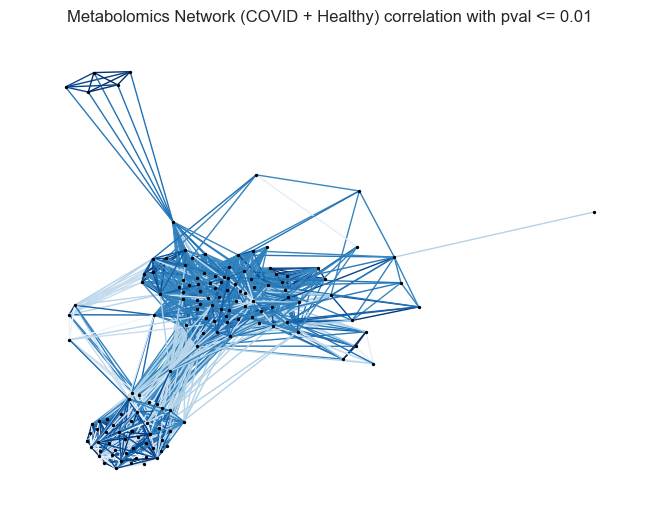

In [117]:
# Create an empty graph structure (a “null graph”) with no nodes and no edges
G_all_corr_thres = nx.Graph()

#Add the nodes from any container (a list, dict, set or even the lines from a file or the nodes from another graph)

# What is happening with my network? Why does it change when I add nodes or not?
#G.add_nodes_from(kpca_scores_stats.columns)
G_all_corr_thres=nx.from_pandas_edgelist(corr_threshold, 'Pathway_1', 'Pathway_2', edge_attr= "Correlation")

weight_corr = [i['Correlation'] for i in dict(G_all_corr_thres.edges).values()]

nx.draw(G_all_corr_thres, with_labels=False, node_color='black', node_size=2, edge_color=weight_corr, font_size=5, edge_cmap=plt.cm.Blues)
plt.title('Metabolomics Network (COVID + Healthy) correlation with pval <= 0.01')

In [118]:
# Statistics of correlation all data : G_all_corr_thres
degree_centrality = nx.degree_centrality(G_all_corr_thres) # Compute the degree centrality for nodes.
print(type(degree_centrality))

betweenness_centrality = nx.betweenness_centrality(G_all_corr_thres, normalized = True)
print(type(betweenness_centrality))

clustering = nx.clustering(G_all_corr_thres) # Compute the clustering coefficent for nodes
print(type(clustering))

#louvain = nx.louvain_communities(G_all_corr_thres)
#print(type(louvain))

<class 'dict'>
<class 'dict'>
<class 'dict'>


Correlations without pval

In [119]:
#Transform into a stacked data frame
links = kpca_scores_corr.stack().reset_index()
links.columns = ["Pathway_1", "Pathway_2", "Correlation"]
links


Pathway_1      Pathway_2  Correlation
0      R-HSA-110331   R-HSA-110331     1.000000
1      R-HSA-110331   R-HSA-112310    -0.349838
2      R-HSA-110331   R-HSA-112311     0.389574
3      R-HSA-110331   R-HSA-112315     0.498185
4      R-HSA-110331  R-HSA-1237112     0.747982
...             ...            ...          ...
22196  R-HSA-975634  R-HSA-9734207    -0.025499
22197  R-HSA-975634  R-HSA-9735804    -0.049942
22198  R-HSA-975634  R-HSA-9749641     0.082327
22199  R-HSA-975634  R-HSA-9753281    -0.021690
22200  R-HSA-975634   R-HSA-975634     1.000000

[22201 rows x 3 columns]

In [120]:
# Take absolute value of correlation value
links_abs = abs(links["Correlation"])

In [121]:
# Merge
links_merg =  pd.merge(links,links_abs, right_index= True, left_index= True)
links_merg.columns = ["Pathway_1", "Pathway_2", "Correlation", "Correlation_abs"]
links_merg

Pathway_1      Pathway_2  Correlation  Correlation_abs
0      R-HSA-110331   R-HSA-110331     1.000000         1.000000
1      R-HSA-110331   R-HSA-112310    -0.349838         0.349838
2      R-HSA-110331   R-HSA-112311     0.389574         0.389574
3      R-HSA-110331   R-HSA-112315     0.498185         0.498185
4      R-HSA-110331  R-HSA-1237112     0.747982         0.747982
...             ...            ...          ...              ...
22196  R-HSA-975634  R-HSA-9734207    -0.025499         0.025499
22197  R-HSA-975634  R-HSA-9735804    -0.049942         0.049942
22198  R-HSA-975634  R-HSA-9749641     0.082327         0.082327
22199  R-HSA-975634  R-HSA-9753281    -0.021690         0.021690
22200  R-HSA-975634   R-HSA-975634     1.000000         1.000000

[22201 rows x 4 columns]

In [122]:
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)

#links_filtered = links_merg.loc[ (links_merg['Correlation_abs'] > 0.8) & (links_merg['Pathway_1'] != links_merg['Pathway_2']) ]
links_filtered = links_merg.loc[ (links_merg['Pathway_1'] != links_merg['Pathway_2']) & (links_merg["Correlation_abs"] > 0.5)]
#links_corr_abs = links_filtered.drop( labels = "Correlation", axis = 1)
links_filtered

Pathway_1      Pathway_2  Correlation  Correlation_abs
4      R-HSA-110331  R-HSA-1237112     0.747982         0.747982
9      R-HSA-110331  R-HSA-1483206     0.512552         0.512552
15     R-HSA-110331    R-HSA-15869    -0.798480         0.798480
19     R-HSA-110331  R-HSA-1614635     0.674815         0.674815
42     R-HSA-110331  R-HSA-2161522     0.637203         0.637203
...             ...            ...          ...              ...
22187  R-HSA-975634  R-HSA-8957322     0.896193         0.896193
22188  R-HSA-975634  R-HSA-8978868    -0.908177         0.908177
22191  R-HSA-975634  R-HSA-9707564     1.000000         1.000000
22192  R-HSA-975634  R-HSA-9707616     1.000000         1.000000
22193  R-HSA-975634  R-HSA-9711123     1.000000         1.000000

[3690 rows x 4 columns]

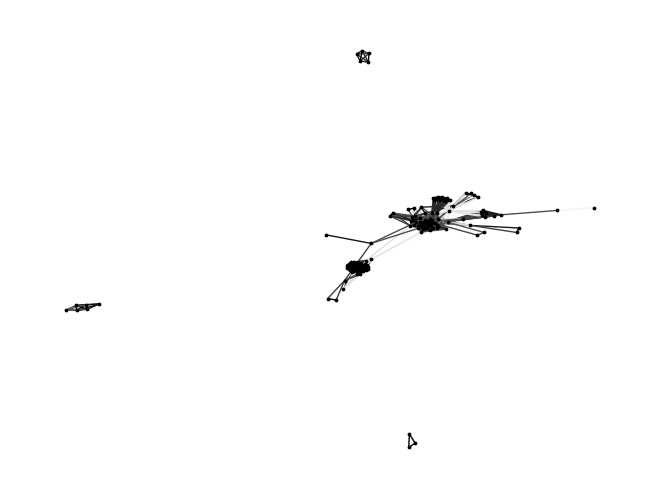

In [123]:
#Creating a networkx with weighted edges for all data

# Create an empty graph structure (a “null graph”) with no nodes and no edges
G_overlap = nx.Graph() 

#Add the nodes from any container (a list, dict, set or even the lines from a file or the nodes from another graph)
G_overlap =nx.from_pandas_edgelist(links_filtered, 'Pathway_1', 'Pathway_2', edge_attr= "Correlation") #G.add_nodes
weight_corr = [i['Correlation'] for i in dict(G_overlap.edges).values()]

nx.draw(G_overlap, with_labels=False, node_color='black', node_size=3, edge_color=weight_corr, font_size=5, edge_cmap=plt.cm.Greys)

# Making Correlation for Healthy and COVID groups individually

In [124]:
kpca_scores_meta['Group'].value_counts()

Healthy Donor     133
COVID19           130
Name: Group, dtype: int64

In [125]:
# Group based on healthy vs disease
Healthy_group_kpca = kpca_scores_meta[kpca_scores_meta["WHO_status"] == "0"].iloc[:, :-2]
COVID19_group_kpca = kpca_scores_meta[kpca_scores_meta["WHO_status"] != "0"].iloc[:, :-2]

In [126]:
# Correlation 

Healthy_group_kpca_corr = Healthy_group_kpca.corr(method='spearman')
COVID19_group_kpca_corr = COVID19_group_kpca.corr(method='spearman')


In [127]:
# Healthy 

Healthy_group_kpca_corr_links = kpca_scores_corr.stack().reset_index()
Healthy_group_kpca_corr_links.columns = ["Pathway_1", "Pathway_2", "Correlation"]
Healthy_group_kpca_corr_links["Correlation_abs"]= Healthy_group_kpca_corr_links["Correlation"].abs()
Healthy_group_kpca_corr_links

Pathway_1      Pathway_2  Correlation  Correlation_abs
0      R-HSA-110331   R-HSA-110331     1.000000         1.000000
1      R-HSA-110331   R-HSA-112310    -0.349838         0.349838
2      R-HSA-110331   R-HSA-112311     0.389574         0.389574
3      R-HSA-110331   R-HSA-112315     0.498185         0.498185
4      R-HSA-110331  R-HSA-1237112     0.747982         0.747982
...             ...            ...          ...              ...
22196  R-HSA-975634  R-HSA-9734207    -0.025499         0.025499
22197  R-HSA-975634  R-HSA-9735804    -0.049942         0.049942
22198  R-HSA-975634  R-HSA-9749641     0.082327         0.082327
22199  R-HSA-975634  R-HSA-9753281    -0.021690         0.021690
22200  R-HSA-975634   R-HSA-975634     1.000000         1.000000

[22201 rows x 4 columns]

In [128]:
# COVID19

COVID_group_kpca_corr_links = COVID19_group_kpca_corr.stack().reset_index()
COVID_group_kpca_corr_links.columns = ["Pathway_1", "Pathway_2", "Correlation"]
COVID_group_kpca_corr_links["Correlation_abs"]= COVID_group_kpca_corr_links["Correlation"].abs()
COVID_group_kpca_corr_links

Pathway_1      Pathway_2  Correlation  Correlation_abs
0      R-HSA-110331   R-HSA-110331     1.000000         1.000000
1      R-HSA-110331   R-HSA-112310    -0.203234         0.203234
2      R-HSA-110331   R-HSA-112311     0.085597         0.085597
3      R-HSA-110331   R-HSA-112315     0.302031         0.302031
4      R-HSA-110331  R-HSA-1237112     0.468309         0.468309
...             ...            ...          ...              ...
22196  R-HSA-975634  R-HSA-9734207     0.058466         0.058466
22197  R-HSA-975634  R-HSA-9735804     0.004968         0.004968
22198  R-HSA-975634  R-HSA-9749641     0.197842         0.197842
22199  R-HSA-975634  R-HSA-9753281    -0.106600         0.106600
22200  R-HSA-975634   R-HSA-975634     1.000000         1.000000

[22201 rows x 4 columns]

In [129]:
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)

healthy_corr = Healthy_group_kpca_corr_links.loc[(Healthy_group_kpca_corr_links['Pathway_1'] != Healthy_group_kpca_corr_links['Pathway_2']) 
    & (Healthy_group_kpca_corr_links["Correlation_abs"] > 0.5)]
healthy_corr


Pathway_1      Pathway_2  Correlation  Correlation_abs
4      R-HSA-110331  R-HSA-1237112     0.747982         0.747982
9      R-HSA-110331  R-HSA-1483206     0.512552         0.512552
15     R-HSA-110331    R-HSA-15869    -0.798480         0.798480
19     R-HSA-110331  R-HSA-1614635     0.674815         0.674815
42     R-HSA-110331  R-HSA-2161522     0.637203         0.637203
...             ...            ...          ...              ...
22187  R-HSA-975634  R-HSA-8957322     0.896193         0.896193
22188  R-HSA-975634  R-HSA-8978868    -0.908177         0.908177
22191  R-HSA-975634  R-HSA-9707564     1.000000         1.000000
22192  R-HSA-975634  R-HSA-9707616     1.000000         1.000000
22193  R-HSA-975634  R-HSA-9711123     1.000000         1.000000

[3690 rows x 4 columns]

In [130]:
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)

COVID_corr = COVID_group_kpca_corr_links.loc[(COVID_group_kpca_corr_links['Pathway_1'] != COVID_group_kpca_corr_links['Pathway_2']) 
    & (COVID_group_kpca_corr_links["Correlation_abs"] > 0.5)]
COVID_corr


Pathway_1      Pathway_2  Correlation  Correlation_abs
15     R-HSA-110331    R-HSA-15869    -0.576239         0.576239
71     R-HSA-110331   R-HSA-425397     0.566784         0.566784
93     R-HSA-110331  R-HSA-5668914     0.726065         0.726065
116    R-HSA-110331    R-HSA-73884     0.854074         0.854074
117    R-HSA-110331    R-HSA-73927     1.000000         1.000000
...             ...            ...          ...              ...
22187  R-HSA-975634  R-HSA-8957322     0.851447         0.851447
22188  R-HSA-975634  R-HSA-8978868    -0.892971         0.892971
22191  R-HSA-975634  R-HSA-9707564     1.000000         1.000000
22192  R-HSA-975634  R-HSA-9707616     1.000000         1.000000
22193  R-HSA-975634  R-HSA-9711123     1.000000         1.000000

[2802 rows x 4 columns]

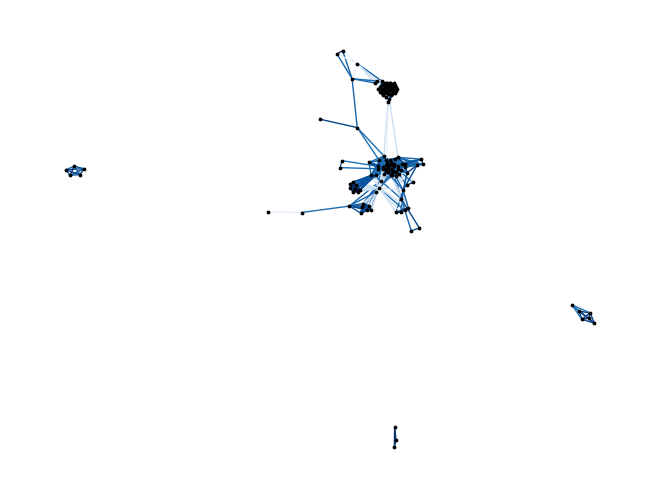

In [131]:
# Graph healthy group with weighted edges 

# Create an empty graph structure (a “null graph”) with no nodes and no edges
G_overlap = nx.Graph() 

#Add the nodes from any container (a list, dict, set or even the lines from a file or the nodes from another graph)
G_overlap =nx.from_pandas_edgelist(healthy_corr, 'Pathway_1', 'Pathway_2', edge_attr= "Correlation") #G.add_nodes
weight_corr = [i['Correlation'] for i in dict(G_overlap.edges).values()]

nx.draw(G_overlap, with_labels=False, node_color='black', node_size=3, edge_color=weight_corr, font_size=5, edge_cmap=plt.cm.Blues)

# Put graph into Cytoscape
nx.write_gml(G_overlap,'Metabolite_Healthy.gml')
nx.write_graphml(G_overlap,'Metabolite_Healthy.gml.gml') # Put graph into Cytoscape

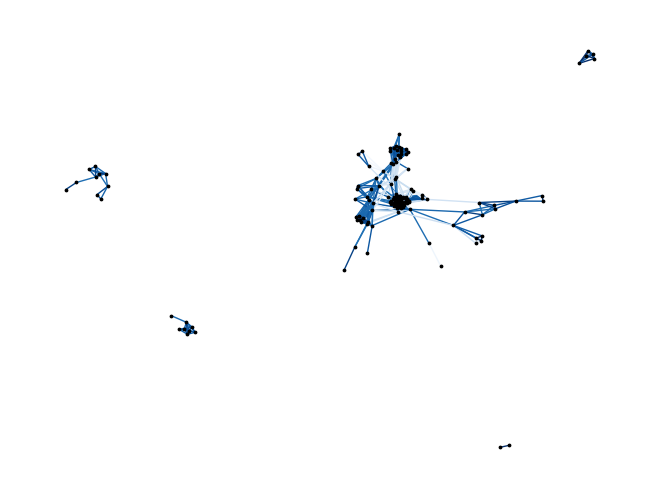

In [132]:
# Graph COVID19 group with weighted edges 

# Create an empty graph structure (a “null graph”) with no nodes and no edges
G_overlap = nx.Graph() 

#Add the nodes from any container (a list, dict, set or even the lines from a file or the nodes from another graph)
G_overlap =nx.from_pandas_edgelist(COVID_corr, 'Pathway_1', 'Pathway_2', edge_attr= "Correlation") #G.add_nodes
weight_corr = [i['Correlation'] for i in dict(G_overlap.edges).values()]

nx.draw(G_overlap, with_labels=False, node_color='black', node_size=3, edge_color=weight_corr, font_size=5, edge_cmap=plt.cm.Blues)

# Put graph into Cytoscape
nx.write_gml(G_overlap,'Metabolite_COVID19.gml')
nx.write_graphml(G_overlap,'Metabolite_COVID19.gml.gml') # Put graph into Cytoscape

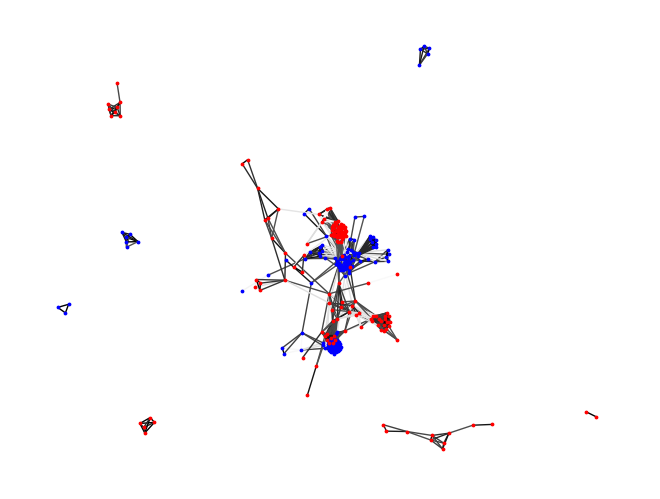

In [133]:
# Graph healthy group with weighted edges 

# Create an empty graph structure (a “null graph”) with no nodes and no edges
G_overlap = nx.Graph() 

#Add the nodes from any container (a list, dict, set or even the lines from a file or the nodes from another graph)
G_overlap =nx.from_pandas_edgelist(healthy_corr, 'Pathway_1', 'Pathway_2', edge_attr= "Correlation") #G.add_nodes
weight_corr = [i['Correlation'] for i in dict(G_overlap.edges).values()]

nx.draw(G_overlap, with_labels=False, node_color='blue', node_size=3, edge_color=weight_corr, font_size=5, edge_cmap=plt.cm.Greys)


# Graph COVID19 group with weighted edges 

# Create an empty graph structure (a “null graph”) with no nodes and no edges
G_overlap = nx.Graph() 

#Add the nodes from any container (a list, dict, set or even the lines from a file or the nodes from another graph)
G_overlap =nx.from_pandas_edgelist(COVID_corr, 'Pathway_1', 'Pathway_2', edge_attr= "Correlation") #G.add_nodes
weight_corr = [i['Correlation'] for i in dict(G_overlap.edges).values()]

nx.draw(G_overlap, with_labels=False, node_color='red', node_size=3, edge_color=weight_corr, font_size=5, edge_cmap=plt.cm.Greys)



Healthy and COVID19 - Correlation and pvalue 

In [134]:
#kPCA score for healthy only # Healthy_group_kpca = kpca_scores_meta[kpca_scores_meta["WHO_status"] == "0"].iloc[:, 1:]
#kPCA score for COVID only # COVID19_group_kpca = kpca_scores_meta[kpca_scores_meta["WHO_status"] != "0"].iloc[:, :]

correlation_t_test_healthy, pval_healthy = stats.spearmanr(Healthy_group_kpca, axis=0, nan_policy='propagate', alternative='two-sided')
correlation_t_test_healthy= pd.DataFrame(correlation_t_test_healthy, columns = Healthy_group_kpca.columns, index = Healthy_group_kpca.columns)
pval_healthy = pd.DataFrame(pval_healthy, columns = Healthy_group_kpca.columns, index = Healthy_group_kpca.columns)

correlation_t_test_COVID19, pval_COVID19 = stats.spearmanr(COVID19_group_kpca, axis=0, nan_policy='propagate', alternative= 'two-sided')
correlation_t_test_COVID19 = pd.DataFrame(correlation_t_test_COVID19, columns=COVID19_group_kpca.columns, index=COVID19_group_kpca.columns)
pval_COVID19 = pd.DataFrame(pval_COVID19, columns=COVID19_group_kpca.columns, index=COVID19_group_kpca.columns)


In [135]:
#Building DataFrame

#Transform into a stacked data frame - Healthy
healthy_corr_spearman = correlation_t_test_healthy.stack().reset_index()
healthy_corr_spearman.columns = ["Pathway_1", "Pathway_2", "Correlation"]

healthy_pval_spearman = pval_healthy.stack().reset_index()
healthy_pval_spearman.columns= ["Pathway_1", "Pathway_2", "p_val"]

healthy_corr_spearman_pval =  healthy_corr_spearman.merge(healthy_pval_spearman["p_val"], left_index = True, right_index = True)

#Multiple testing correction 
healthy_corr_spearman_pval_corrected = statsmodels.stats.multitest.multipletests(
        healthy_corr_spearman_pval["p_val"], alpha = 0.5, method= "bonferroni", is_sorted=False, returnsorted= False)
healthy_corr_spearman_pval_corrected

reject_h = healthy_corr_spearman_pval_corrected[0]
pvals_corrected_h = healthy_corr_spearman_pval_corrected[1]
alphacBonf_h = healthy_corr_spearman_pval_corrected[2]
pvals_corrected_healthy_df  = pd.DataFrame(pvals_corrected_h, columns = ["p_val_adjust"])

# Combining Dataframe
healthy_corr_spearman_pval_corrected = healthy_corr_spearman_pval.merge(pvals_corrected_healthy_df["p_val_adjust"], right_index = True, left_index = True)
healthy_corr_spearman_pval_corrected["Correlation_abs"]= healthy_corr_spearman_pval_corrected["Correlation"].abs()
healthy_corr_spearman_pval_corrected = healthy_corr_spearman_pval_corrected[["Pathway_1", "Pathway_2", "Correlation", "Correlation_abs", "p_val", "p_val_adjust" ]]
healthy_corr_spearman_pval_corrected

Pathway_1      Pathway_2  Correlation  Correlation_abs  \
0      R-HSA-110331   R-HSA-110331     1.000000         1.000000   
1      R-HSA-110331   R-HSA-112310    -0.098989         0.098989   
2      R-HSA-110331   R-HSA-112311     0.222789         0.222789   
3      R-HSA-110331   R-HSA-112315     0.099448         0.099448   
4      R-HSA-110331  R-HSA-1237112     0.517547         0.517547   
...             ...            ...          ...              ...   
22196  R-HSA-975634  R-HSA-9734207     0.009360         0.009360   
22197  R-HSA-975634  R-HSA-9735804     0.009819         0.009819   
22198  R-HSA-975634  R-HSA-9749641     0.093057         0.093057   
22199  R-HSA-975634  R-HSA-9753281     0.107186         0.107186   
22200  R-HSA-975634   R-HSA-975634     1.000000         1.000000   

              p_val  p_val_adjust  
0      0.000000e+00      0.000000  
1      2.569592e-01      1.000000  
2      9.950186e-03      1.000000  
3      2.547486e-01      1.000000  
4      1.782852e-10      0.000004  
...             ...           ...  
22196  9.148438e-01      1.000000  
22197  9.106841e-01      1.000000  
22198  2.867110e-01      1.000000  
22199  2.194452e-01      1.000000  
22200  0.000000e+00      0.000000  

[22201 rows x 6 columns]

In [136]:
#Building DataFrame

#Transform into a stacked data frame - COVID19
COVID19_corr_spearman = correlation_t_test_COVID19.stack().reset_index()
COVID19_corr_spearman.columns = ["Pathway_1", "Pathway_2", "Correlation"]
COVID19_corr_spearman["Correlation_abs"]= COVID19_corr_spearman["Correlation"].abs()

COVID19_pval_spearman = pval_COVID19.stack().reset_index()
COVID19_pval_spearman.columns = ["Pathway_1", "Pathway_2", "p_val"]

COVID19_corr_spearman_pval = COVID19_corr_spearman.merge(COVID19_pval_spearman["p_val"], right_index = True, left_index = True)

# Multiple testing correction
COVID19_pval_corrected = statsmodels.stats.multitest.multipletests(COVID19_pval_spearman["p_val"], alpha = 0.05, method = "bonferroni")

reject_COVID19 = COVID19_pval_corrected[0]
pvals_corrected_COVID19 = COVID19_pval_corrected[1]
alphacBonffloat_COVID19 = COVID19_pval_corrected[2]
pvals_corrected_COVID19 = pd.DataFrame(pvals_corrected_COVID19, columns = ["p_val_adjust"])

# Combining Dataframe
COVID19_corr_spearman_pval_corrected = COVID19_corr_spearman_pval.merge(pvals_corrected_COVID19["p_val_adjust"], right_index = True, left_index = True)
COVID19_corr_spearman_pval_corrected

Pathway_1      Pathway_2  Correlation  Correlation_abs  \
0      R-HSA-110331   R-HSA-110331     1.000000         1.000000   
1      R-HSA-110331   R-HSA-112310    -0.203234         0.203234   
2      R-HSA-110331   R-HSA-112311     0.085597         0.085597   
3      R-HSA-110331   R-HSA-112315     0.302031         0.302031   
4      R-HSA-110331  R-HSA-1237112     0.468309         0.468309   
...             ...            ...          ...              ...   
22196  R-HSA-975634  R-HSA-9734207     0.058466         0.058466   
22197  R-HSA-975634  R-HSA-9735804     0.004968         0.004968   
22198  R-HSA-975634  R-HSA-9749641     0.197842         0.197842   
22199  R-HSA-975634  R-HSA-9753281    -0.106600         0.106600   
22200  R-HSA-975634   R-HSA-975634     1.000000         1.000000   

              p_val  p_val_adjust  
0      0.000000e+00      0.000000  
1      2.038972e-02      1.000000  
2      3.328890e-01      1.000000  
3      4.787964e-04      1.000000  
4      1.924360e-08      0.000427  
...             ...           ...  
22196  5.087783e-01      1.000000  
22197  9.552646e-01      1.000000  
22198  2.405093e-02      1.000000  
22199  2.273823e-01      1.000000  
22200  0.000000e+00      0.000000  

[22201 rows x 6 columns]

array([[<AxesSubplot:title={'center':'Correlation'}>,
        <AxesSubplot:title={'center':'Correlation_abs'}>],
       [<AxesSubplot:title={'center':'p_val'}>,
        <AxesSubplot:title={'center':'p_val_adjust'}>]], dtype=object)

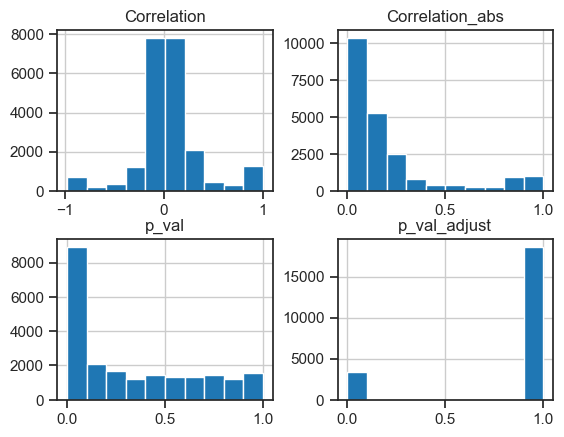

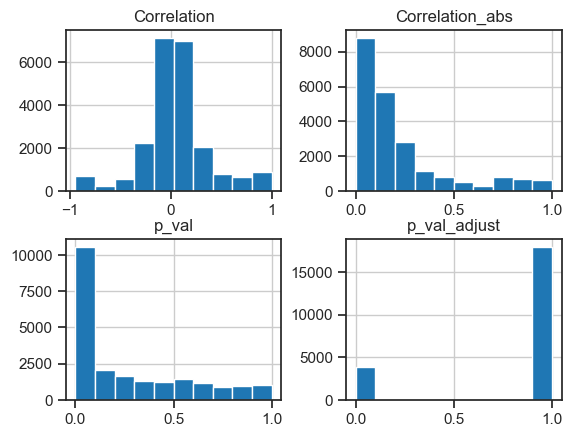

In [137]:
healthy_corr_spearman_pval_corrected.hist()
COVID19_corr_spearman_pval_corrected.hist()

In [138]:
# Threshold values

healthy_filtered = healthy_corr_spearman_pval_corrected.loc[(healthy_corr_spearman_pval_corrected["Pathway_1"] != healthy_corr_spearman_pval_corrected["Pathway_2"]) 
    & (healthy_corr_spearman_pval_corrected["p_val_adjust"] <= 0.005)]

COVID_filtered = COVID19_corr_spearman_pval_corrected.loc[(COVID19_corr_spearman_pval_corrected["Pathway_1"] != COVID19_corr_spearman_pval_corrected["Pathway_2"]) 
    & (COVID19_corr_spearman_pval_corrected["p_val_adjust"] <= 0.005)]

Text(0.5, 1.0, 'Metabolomic Network (Healthy) correlation with pval <= 0.005')

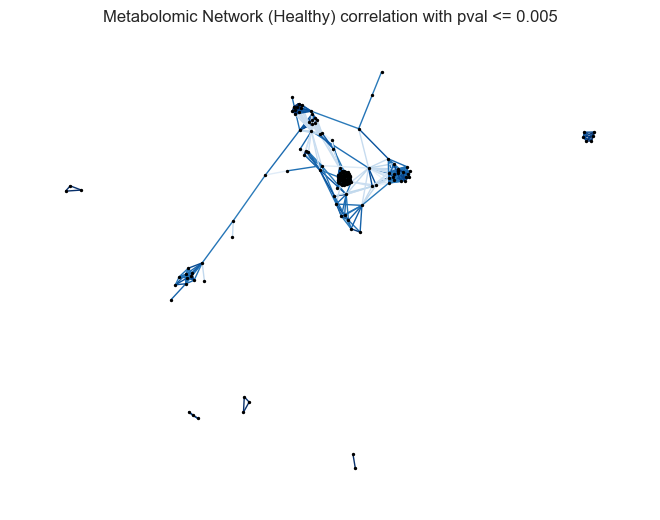

In [139]:
# Making graphs - Healthy

G_healthy =nx.from_pandas_edgelist(healthy_filtered, 'Pathway_1', 'Pathway_2', edge_attr= "Correlation")

weight_corr = [i['Correlation'] for i in dict(G_healthy.edges).values()]

nx.draw(G_healthy, with_labels=False, node_color='black', node_size=2, edge_color=weight_corr, font_size=5, edge_cmap=plt.cm.Blues)
plt.title('Metabolomic Network (Healthy) correlation with pval <= 0.005')

Text(0.5, 1.0, 'Metabolomic Network (COVID19) correlation with pval <= 0.005')

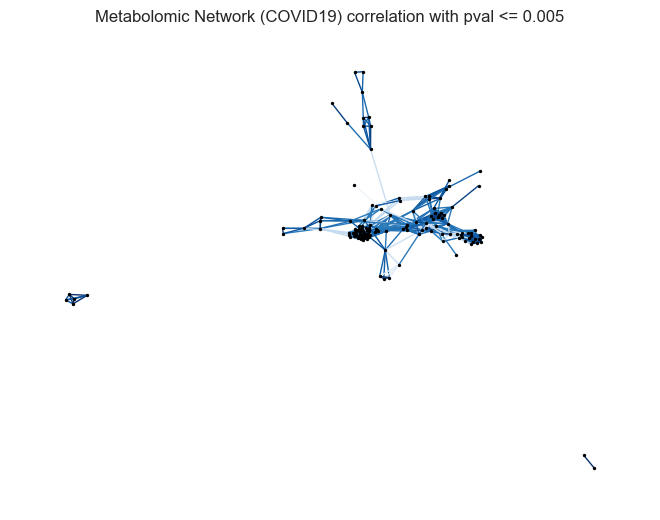

In [140]:
# Making graphs - COVID19

G_COVID19 = nx.from_pandas_edgelist(COVID_filtered, 'Pathway_1', 'Pathway_2', edge_attr= "Correlation")

weight_corr = [i['Correlation'] for i in dict(G_COVID19.edges).values()]

nx.draw(G_COVID19, with_labels=False, node_color='black', node_size=2, edge_color=weight_corr, font_size=5, edge_cmap=plt.cm.Blues)
plt.title('Metabolomic Network (COVID19) correlation with pval <= 0.005')

Text(0.5, 1.0, 'Metabolomic Network (Healthy (blues) and COVID (reds)) correlation with pval <= 0.005')

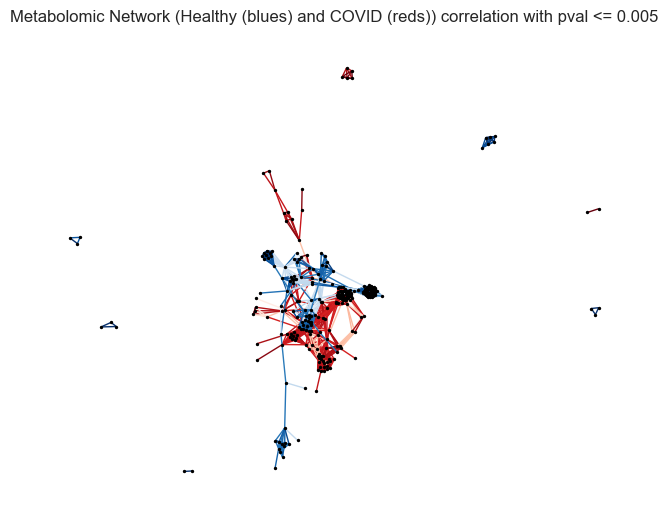

In [141]:
# Making graphs - COVID19

G_COVID19 = nx.from_pandas_edgelist(COVID_filtered, 'Pathway_1', 'Pathway_2', edge_attr= "Correlation")

weight_corr = [i['Correlation'] for i in dict(G_COVID19.edges).values()]

nx.draw(G_COVID19, with_labels=False, node_color='black', node_size=2, edge_color=weight_corr, font_size=5, edge_cmap=plt.cm.Reds)

# Making graphs - Healthy

G_healthy =nx.from_pandas_edgelist(healthy_filtered, 'Pathway_1', 'Pathway_2', edge_attr= "Correlation")

weight_corr = [i['Correlation'] for i in dict(G_healthy.edges).values()]

nx.draw(G_healthy, with_labels=False, node_color='black', node_size=2, edge_color=weight_corr, font_size=5, edge_cmap=plt.cm.Blues)
plt.title('Metabolomic Network (Healthy (blues) and COVID (reds)) correlation with pval <= 0.005')

# Understanding Coverage - Metabolomics pathways

In [142]:
## What is the difference? 
# reactome_pathways = sspa.process_reactome("Homo sapiens", download_latest=True, filepath=".") - 2291

# reactome_dict_metabolites = sspa.utils.pathwaydf_to_dict(reactome_pathways) - 2040

Make a dictionary from all the pathways in reactome and their metabolites

In [143]:
## STILL NEED TO CHANGE FROM THE PROTEIN ONE
# Make dictionary of the pathway and all the metabolites that define that pathway using ChEBI IDs
reactome_dict_metabolites = sspa.utils.pathwaydf_to_dict(reactome_pathways)
print("Number of possible pathways:", len(reactome_dict_metabolites))
print("type:",type(reactome_dict_metabolites))

Number of possible pathways: 2040
type: <class 'dict'>


In [144]:
# All pathways in reactome
reactome_dict_metabolites_series = pd.Series(reactome_dict_metabolites) # Need to put into a series first
reactome_dict_metabolites_df = pd.DataFrame(reactome_dict_metabolites_series, columns = ['All_metabolites_in_path']) # put into a dataframe
reactome_dict_metabolites_df.index.name = "Pathways" # Set the name of a pathway
reactome_dict_metabolites_df

All_metabolites_in_path
Pathways                                                        
R-HSA-1059683                                    [30616, 456216]
R-HSA-109581   [61120, 4705, 28494, 36080, 15377, 43474, 3061...
R-HSA-109582   [15366, 91144, 15377, 15378, 15379, 456215, 45...
R-HSA-109606   [28494, 36080, 15377, 43474, 30616, 47575, 456...
R-HSA-109703        [57836, 15377, 58165, 30616, 456215, 456216]
...                                                          ...
R-HSA-983695   [57540, 57836, 203600, 36080, 29108, 30616, 17...
R-HSA-983705   [57540, 11750, 29034, 57836, 58189, 203600, 29...
R-HSA-983712   [15365, 17544, 57613, 49552, 15377, 15378, 354...
R-HSA-991365   [58189, 29103, 17552, 59888, 43474, 18420, 37565]
R-HSA-997272                                      [59888, 29103]

[2040 rows x 1 columns]

In [145]:
# Computing coverage - which metabolites are in the dataset
su_data_nometa = su_data.iloc[:,:-2]
compounds_present = su_data_nometa.columns.tolist() #metabolites from oringal data set, using ChEBI IDs; turns the column names into a list
print("Number of metabolites from our data:", len(set(compounds_present))) # 333 metabolites

Number of metabolites from our data: 333


In [146]:
# Metabolites in any given pathway 
# out of the entire reactome, only keeping pathways where we have 2+ proteins

pathways_present_dict = {k: v for k, v in reactome_dict_metabolites_series.items() if len([i for i in compounds_present if i in v]) >= 2} 

## The long way of writing it:
# pathways_present = {} # use {} because we want to make a dictionary
# for k, v in reactome_dict_metabolites_series.items():
#     #print(k, v)
#     cpds_mapped = list(set(compounds_present) & set(v)) #make a list with sets (unique values) from both sets which computed the intersecting values
#     #print(cpds_mapped)
#     if len(cpds_mapped) >= 2:
#         pathways_present[k] = v

print(type(pathways_present_dict))
print(("Number of pathways present", len(pathways_present_dict))) #tells you how many pathways you have

<class 'dict'>
('Number of pathways present', 165)


In [147]:
# All the metabolites in a pathways present in the data set into a dataframe
pathways_present = pd.Series(pathways_present_dict) # Need to put into a series first
pathways_present_df = pd.DataFrame(pathways_present, columns = ['All_metabolites_in_path']) # put into a dataframe
pathways_present_df.index.name = "Pathways" # Set the name of a pathway
pathways_present_df # has the pathways in my dataframe, with all the metabolites I could have in any given pathway??

All_metabolites_in_path
Pathways                                                        
R-HSA-110331   [137218, 16708, 23367, 38635, 16991, 142614, 1...
R-HSA-112310   [16000, 59905, 16134, 28938, 32395, 15756, 270...
R-HSA-112311   [57856, 59905, 16134, 30089, 28938, 72587, 597...
R-HSA-112315   [57856, 59905, 251408, 15377, 15378, 15379, 45...
R-HSA-112316   [57856, 59905, 251408, 15377, 15378, 15379, 45...
...                                                          ...
R-HSA-9735804  [58017, 16708, 28997, 17256, 16235, 16750, 163...
R-HSA-9748784  [57856, 15361, 50690, 15365, 29191, 15882, 153...
R-HSA-9749641  [15361, 15365, 29191, 13705, 15882, 30089, 326...
R-HSA-9753281  [30089, 15377, 15378, 15379, 456216, 30616, 78...
R-HSA-975634   [26753, 32386, 15367, 15756, 15377, 15378, 153...

[165 rows x 1 columns]

In [148]:
# Make a dictionary with pathway names and metabolites
pathway_dictionary = pathways_present.to_dict()

In [149]:
# Writing same thing in two ways:

# # List comprehension 
# print([i for i in compounds_present]) # i for i loops over every indivudal item in a list 

# # For loop 
# for i in compounds_present:
#     print(i)


In [150]:
#Metabolites present in my data

path_coverage = {k: [i for i in v if i in compounds_present] for k, v in pathways_present.items()} # making a dictionary where you have the pathway name and then the proteins in the pathway 
 # tells you which proteins from your dataset you have in the pathway 
## Need this to calculate overlap - what you can access in your data
print(type(path_coverage))

# Writen the same way but longer
# for k, v in pathways_present.items():
#     # compute which compounds from data are in the pathway v
#     compounds_data = list(set(compounds_present) & set(v))
#     # add to dict this list 
#     path_coverage[k] =  compounds_data


<class 'dict'>


In [151]:
# Metabolites present in my data
path_coverage_series = pd.Series(path_coverage) # put into a series; I don't know why it has pathways names
path_coverage_df = pd.DataFrame(path_coverage_series, columns = ['Data_metabolites_in_path']) # put into a dataframe
path_coverage_df.index.name = "Pathways" # Set the name of a pathway
path_coverage_series.to_csv('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Exported files/Metabolies_per_pathway_dataset.csv')

In [152]:
# Out of all the pathways in reactome, how many am I seeing
print("Number of pathways in reactome:", len(reactome_dict))
print("Number of pathways in my data set:",len(path_coverage))
path_coverage_percent = (len(pathways_present) / len(reactome_dict)) *100
print("Percent of pathways measured in my data set", path_coverage_percent)

Number of pathways in reactome: 2291
Number of pathways in my data set: 165
Percent of pathways measured in my data set 7.2020951549541685


In [153]:
path_coverage_nums = {k: len([i for i in v if i in compounds_present]) for k, v in pathways_present.items()} 
path_coverage_nums # will tell you how many proteins you have in the pathway 
path_coverage_nums_df = pd.Series(path_coverage_nums) # put into a series
path_coverage_nums_df = pd.DataFrame(path_coverage_nums_df, columns = ['Number_of_metabolites']) # put into a dataframe
path_coverage_nums_df["Number_of_metabolites_Log_10"] = np.log10(path_coverage_nums_df["Number_of_metabolites"])
path_coverage_nums_df.index.name = "Pathways" # Set the name of a pathway

path_coverage_nums_df.to_csv("number_of_metabolites.csv")

path_coverage_nums_df


Number_of_metabolites  Number_of_metabolites_Log_10
Pathways                                                          
R-HSA-110331                       2                      0.301030
R-HSA-112310                       8                      0.903090
R-HSA-112311                       3                      0.477121
R-HSA-112315                      10                      1.000000
R-HSA-112316                      10                      1.000000
...                              ...                           ...
R-HSA-9735804                      4                      0.602060
R-HSA-9748784                      7                      0.845098
R-HSA-9749641                      4                      0.602060
R-HSA-9753281                      2                      0.301030
R-HSA-975634                       2                      0.301030

[165 rows x 2 columns]

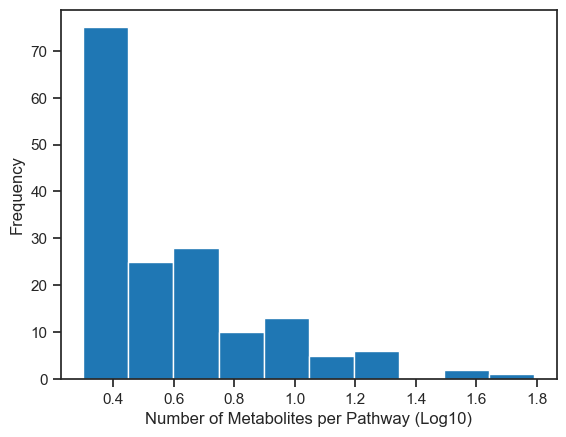

In [154]:
# Looking at number of proteins in any given pathway
plt.hist(path_coverage_nums_df["Number_of_metabolites_Log_10"])
plt.xlabel('Number of Metabolites per Pathway (Log10)')
plt.ylabel('Frequency')
plt.show()

# Calculating hypergeometric distribution using the Fischer exact

In [155]:
# Step 1:
# Calculate background - 77 metabolites in the pathways with ChBEI IDs; 78 I think total

background = []
for k,v in pathways_present_dict.items():
    background.append(v)

background_chain = list(chain.from_iterable(background))
print("All metabolites in pathways present (includes duplicates)", len(background_chain))
background_set = set(background_chain)
print("Unique metabolites in pathways", len(background_set))

background_metabolites = list(set(compounds_present) & set(background_set))
print("Metabolites in the pathway and our data", len(background_metabolites))


All metabolites in pathways present (includes duplicates) 13133
Unique metabolites in pathways 2337
Metabolites in the pathway and our data 78


In [156]:
# Calculate combination pairwise of all combinations of pathway_1 and pathway _2 - can do a nested list or list containing the pairs
pairwise_pathways = []
for x in itertools.permutations(path_coverage, 2): #itertool is a python package that does iter tools; does permutations of all the the things you give it
    pairwise_pathways.append(x)

print("Expected pairwise connections", 165*165)
print("Number of pairwise connections", len(pairwise_pathways), "doesnt include self pairs I think?")

Expected pairwise connections 27225
Number of pairwise connections 27060 doesnt include self pairs I think?


In [157]:
# Calculate combination pairwise of all combinations of pathway_1 and pathway _2 - can do a nested list or list containing the pairs
pairwise_pathways_x = []
pairwise_pathways_y = []  #empty list
for x, y in itertools.permutations(path_coverage, 2): #itertool is a python package that does iter tools; does permutations of all the the things you give it
    pairwise_pathways_x.append(x)
    pairwise_pathways_y.append(y)

print("Expected pairwise connections", 165*165)
print("Number of pairwise connections", len(pairwise_pathways), "doesnt include self pairs I think?")

pairwise_labels = pd.DataFrame({'Pathway1':pairwise_pathways_x, 'Pathway2': pairwise_pathways_y})
len(pairwise_labels)

Expected pairwise connections 27225
Number of pairwise connections 27060 doesnt include self pairs I think?


27060

In [158]:
# Make a list with all possible pathway pairs - attempt 2

fisher_exact_pathway_p_val = [] #empty list
for x in pairwise_pathways: #itertool is a python package that does iter tools; does permutations of all the the things you give it
    # in P1 and P2
    ##print(x)
    p1_and_p2 = len(set((path_coverage[x[0]])) & set(((path_coverage[x[1]]))))
    ##print(p1_and_p2)
    ##pairwise_metabolites.append(p1_and_p2)
    # in P1 and not in P2
    in_p1_and_not_p2 = len(np.setdiff1d((path_coverage[x[0]]),(path_coverage[x[1]])))
    # in P2 and not in P1
    in_p2_and_not_p1 = len(np.setdiff1d((path_coverage[x[1]]),(path_coverage[x[0]])))
    # not in P1 or P2
    neither_p1_p2 = len(np.setdiff1d(background_metabolites,((path_coverage[x[0]])+path_coverage[x[1]])))
    table = np.array([[p1_and_p2, in_p2_and_not_p1], [in_p1_and_not_p2, neither_p1_p2]])
    #print(table)
    res, p_val = stats.fisher_exact(table, alternative='two-sided')
    fisher_exact_pathway_p_val.append(p_val)
    

In [159]:
## Sanity Check
print("Pathways:", pairwise_pathways[0])
print("Pathway_1", len(path_coverage["R-HSA-110331"]), path_coverage["R-HSA-110331"])
print("Pathway_2", len(path_coverage["R-HSA-112310"]), path_coverage["R-HSA-112310"] )

## Table
p1_and_p2 = len(set(path_coverage["R-HSA-110331"]) & set(path_coverage["R-HSA-112310"]))
in_p1_and_not_p2 = len(np.setdiff1d(path_coverage["R-HSA-110331"],path_coverage["R-HSA-112310"]))
in_p2_and_not_p1 = len(np.setdiff1d(path_coverage["R-HSA-112310"],path_coverage["R-HSA-110331"]))
p1_and_p2_combined = (path_coverage["R-HSA-110331"])+(path_coverage["R-HSA-112310"])
neither_p1_p2 = len(np.setdiff1d(background_metabolites, p1_and_p2_combined))

# Making table
table_1 = np.array([[p1_and_p2, in_p2_and_not_p1], [in_p1_and_not_p2, neither_p1_p2]])
print(table_1)

res, p_val = stats.fisher_exact(table_1, alternative='two-sided')
print(p_val) # validate that you get more significant value based on the more overlap you have 

Pathways: ('R-HSA-110331', 'R-HSA-112310')
Pathway_1 2 ['16708', '17368']
Pathway_2 8 ['15756', '2700', '71464', '16958', '28875', '30805', '17750', '15354']
[[ 0  8]
 [ 2 68]]
1.0


In [160]:
## Sanity Check
print("Pathways:", pairwise_pathways[2992])
print("Pathway_1", len(path_coverage["R-HSA-156584"]), path_coverage["R-HSA-156584"])
print("Pathway_2", len(path_coverage["R-HSA-211897"]), path_coverage["R-HSA-211897"] )

## Table
p1_and_p2 = len(set(path_coverage["R-HSA-156584"]) & set(path_coverage["R-HSA-211897"]))
in_p1_and_not_p2 = len(np.setdiff1d(path_coverage["R-HSA-156584"],path_coverage["R-HSA-211897"]))
in_p2_and_not_p1 = len(np.setdiff1d(path_coverage["R-HSA-211897"],path_coverage["R-HSA-156584"]))
p1_and_p2_combined = (path_coverage["R-HSA-156584"])+(path_coverage["R-HSA-211897"])
neither_p1_p2 = len(np.setdiff1d(background_metabolites, p1_and_p2_combined))

# Making table
table = np.array([[p1_and_p2, in_p2_and_not_p1], [in_p1_and_not_p2, neither_p1_p2]])
print(table)

res, p_val = stats.fisher_exact(table_1, alternative='two-sided')
print(p_val) # validate that you get more significant value based on the more overlap you have 

Pathways: ('R-HSA-15869', 'R-HSA-211897')
Pathway_1 6 ['27905', '37946', '17474', '17864', '32635', '46195']
Pathway_2 7 ['27732', '30805', '46195', '28834', '25858', '16827', '31697']
[[ 1  6]
 [ 5 66]]
1.0


In [161]:
# Making table
table_test = np.array([[10, 0], [0, 68]])
print(table_test )

res, p_val = stats.fisher_exact(table_test , alternative='two-sided')
print(p_val) # validate that you get more significant value based on the more overlap you have 

[[10  0]
 [ 0 68]]
7.947129565905259e-13


In [162]:
# Store p value and pair in a dataframe to then make a network 

# Putting the list into a matrix 
# all_pathways = [k for k, v in path_coverage.items()] - Cecilia's list comprhension
all_pathways = []
for k,v in path_coverage.items():
    all_pathways.append(k)

len(all_pathways) # contains pathway names


165

In [163]:
165*165 - 165

27060

In [164]:
# Putting fisher_exact_pathway_p_val into a matrix
fisher_exact_pathway_p_val_array = np.array(fisher_exact_pathway_p_val)
fisher_exact_pathway_p_val_df = pd.DataFrame(fisher_exact_pathway_p_val_array, columns= ["Fisher_exact_p_val"])
print(len(fisher_exact_pathway_p_val_df))

27060


In [165]:
# # Merge pathways
fisher_exact_pathway_p_val_df_full = pd.merge(pairwise_labels,fisher_exact_pathway_p_val_df, right_index=True, left_index=True )
fisher_exact_pathway_p_val_df_full

Pathway1       Pathway2  Fisher_exact_p_val
0      R-HSA-110331   R-HSA-112310            1.000000
1      R-HSA-110331   R-HSA-112311            1.000000
2      R-HSA-110331   R-HSA-112315            1.000000
3      R-HSA-110331   R-HSA-112316            1.000000
4      R-HSA-110331  R-HSA-1237112            0.050949
...             ...            ...                 ...
27055  R-HSA-975634  R-HSA-9734207            1.000000
27056  R-HSA-975634  R-HSA-9735804            1.000000
27057  R-HSA-975634  R-HSA-9748784            1.000000
27058  R-HSA-975634  R-HSA-9749641            1.000000
27059  R-HSA-975634  R-HSA-9753281            1.000000

[27060 rows x 3 columns]

In [166]:
# Renaming columns
fisher_exact_pathway_p_val_keep = fisher_exact_pathway_p_val_df.loc[fisher_exact_pathway_p_val_df["Fisher_exact_p_val"]> 0.05]
fisher_exact_pathway_p_val_keep

## Keep when p value is large, not small 
# get rid of ones with higher overlap (not loweroverlap), which should mean the ones with the lower p value - double check
#rank overlap by size and see the p-values 
# plot overlap coefficient vs the log(pvalue) and their should be a strong correlation between them 
#check were throwing the right ones away
# think about multiple testing correction - then you'd throw away fewer pathways - need to explain WHY were not doing multiple testing correction ; look at both

Fisher_exact_p_val
0                1.000000
1                1.000000
2                1.000000
3                1.000000
4                0.050949
...                   ...
27055            1.000000
27056            1.000000
27057            1.000000
27058            1.000000
27059            1.000000

[24650 rows x 1 columns]

# Calculating the Overlap Coefficient 

In [167]:
#Define the overlap coefficient

# useful for pathways because some pathways have 10 and some have 2; so captures when smaller set is inside the other bigger set
def overlap_coefficient(list1, list2):
    # Szymkiewicz–Simpson coefficient
    intersection = len(list(set(list1).intersection(list(set(list2))))) 
    smaller_set = min(len(list1), len(list2)) # tells which length is the smallest, normalizes it
    return float(intersection) / smaller_set

    ## set() method is used to convert any of the iterable to sequence of iterable elements with distinct elements; a set is essentially all values have to be unique
    ## in a set you can only have one of each value; use when you want to only count something once
    # sets have attributes to them - ex. .intersection which will calculate the intersection aka what exists in both sets aka thats common to both of them
    # sets.union = all of the elemnts togethers; only the uniques

    # can look at difference between ways of calculating overlap 

In [168]:
# Overlap coefficient

# all pathways, need to get all pairwise coffecient - that will give you matrix
# need to loop over every pairwise combintion
overlap_cf = overlap_coefficient(path_coverage_df, path_coverage_df)
overlap_cf

0.006060606060606061

In [169]:
# Looking at *all* the keys (k; i.e pathway names) and their respective values (v; the proteins in the pathway) for the dictionary "path_coverage"
# .items is an interator; interator is used in a loop
# dont have to call them k and v
for k,v in path_coverage.items(): 
	print(k,v) 

R-HSA-110331 ['16708', '17368']
R-HSA-112310 ['15756', '2700', '71464', '16958', '28875', '30805', '17750', '15354']
R-HSA-112311 ['545959', '27823', '15354']
R-HSA-112315 ['16958', '30805', '2700', '545959', '27823', '28875', '71464', '17750', '15756', '15354']
R-HSA-112316 ['16958', '30805', '2700', '545959', '27823', '28875', '71464', '17750', '15756', '15354']
R-HSA-1237112 ['16708', '17509']
R-HSA-1266738 ['15756', '17351']
R-HSA-1368082 ['17351', '15756']
R-HSA-1368108 ['17351', '15756']
R-HSA-1428517 ['422', '30769', '18012']
R-HSA-1430728 ['16525', '16530', '16566', '16680', '16704', '16708', '16737', '422', '16827', '16946', '16962', '16995', '17066', '9008', '17268', '17310', '17351', '17368', '17405', '17474', '17482', '17509', '17533', '17553', '17562', '17568', '17596', '25858', '17712', '17750', '17754', '17775', '17802', '17864', '18012', '18132', '18145', '18332', '2700', '27468', '27732', '27905', '4208', '28834', '29746', '37946', '46195', '30769', '30805', '30831', '

In [170]:
# Make a list of all pathway codes
all_pathways = [k for k, v in path_coverage.items()] # Makes a list of all the pathway names from the dictionary
## this line is a list comprenstion; make an empty list and then everytime you loop over, you would add them into the list
#k - keys, v - value, d - dictionary
# df.items() = Iterates over the DataFrame columns, returning a tuple with the column name and the content as a Series.
print(type(all_pathways)) # is a list


<class 'list'>


In [171]:
overlap_coefficient_list = [] #empty list
for pathway_pair in itertools.permutations(all_pathways, 2): #itertool is a python package that does iter tools; does permutations of all the the things you give it 
    overlap_coefficient_list.append(overlap_coefficient(path_coverage[pathway_pair[0]], path_coverage[pathway_pair[1]]))

# itertools.permutations(iterable, r=None)
# Return successive r length permutations of elements in the iterable.
# If r is not specified or is None, then r defaults to the length of the iterable and all possible full-length permutations are generated

# this is a standard normal way of doing things
#make an empty list and store the overlap coefficent into the list for every pairwaise comparisons 
# for pathway_pair in itertools.permutations(all_pathways, 2) --  the 2 is what is telling you the pairwise part
#overlap_coefficient_list.append - adding to the open list 
# path_coverage[pathway_pair[0]] - pathway_coverage is our dictionary; pathway_pair is a tuple the we named from the itertools.permutations
# every pathway pair is a tuple containing 2 things; 0 and 1 is thing 1 in the tuple and thing 2 in the tuple


In [172]:
# # this is the first pathway pair of the list 
# for x in itertools.permutations(all_pathways, 2):
#     print(x)
#     break

# # prints the first item in the tuple
# for x in itertools.permutations(all_pathways, 2):
#     print(x[0])
#     print(path_coverage[x[0]])
#     break

# # prints the second item in the tuple
# for x in itertools.permutations(all_pathways, 2):
#     print(x[1])
#     break


In [173]:
# Putting the list into a matrix 
all_pathways = [k for k, v in path_coverage.items()]
rows = [] # makes an empty list

for i in all_pathways:
    curr_row = []
    for p in all_pathways:
        curr_row.append(overlap_coefficient(path_coverage[i], path_coverage[p]))
    rows.append(curr_row)

# building the matrix row by row
# when you iterate over something, you can call it whatever you want- here cecelia uses i and p ; youre trying to get the pairs
#within the loop you get another loop and by doing this you get pairs of everything 

In [174]:
# Making the data frame of the overlap matrix 
overlap_ar = np.array(rows)
overlap_df = pd.DataFrame(overlap_ar, index=path_coverage.keys(), columns=path_coverage.keys())
overlap_df


R-HSA-110331  R-HSA-112310  R-HSA-112311  R-HSA-112315  \
R-HSA-110331            1.0      0.000000      0.000000           0.0   
R-HSA-112310            0.0      1.000000      0.333333           1.0   
R-HSA-112311            0.0      0.333333      1.000000           1.0   
R-HSA-112315            0.0      1.000000      1.000000           1.0   
R-HSA-112316            0.0      1.000000      1.000000           1.0   
...                     ...           ...           ...           ...   
R-HSA-9735804           1.0      0.000000      0.000000           0.0   
R-HSA-9748784           0.0      0.000000      0.000000           0.0   
R-HSA-9749641           0.0      0.000000      0.000000           0.0   
R-HSA-9753281           0.0      0.000000      0.000000           0.0   
R-HSA-975634            0.0      0.500000      0.000000           0.5   

               R-HSA-112316  R-HSA-1237112  R-HSA-1266738  R-HSA-1368082  \
R-HSA-110331            0.0            0.5            0.0            0.0   
R-HSA-112310            1.0            0.0            0.5            0.5   
R-HSA-112311            1.0            0.0            0.0            0.0   
R-HSA-112315            1.0            0.0            0.5            0.5   
R-HSA-112316            1.0            0.0            0.5            0.5   
...                     ...            ...            ...            ...   
R-HSA-9735804           0.0            0.5            0.0            0.0   
R-HSA-9748784           0.0            0.0            0.0            0.0   
R-HSA-9749641           0.0            0.0            0.0            0.0   
R-HSA-9753281           0.0            0.0            0.0            0.0   
R-HSA-975634            0.5            0.0            1.0            1.0   

               R-HSA-1368108  R-HSA-1428517  ...  R-HSA-9709957  \
R-HSA-110331             0.0       0.000000  ...       0.000000   
R-HSA-112310             0.5       0.000000  ...       0.250000   
R-HSA-112311             0.0       0.000000  ...       0.000000   
R-HSA-112315             0.5       0.000000  ...       0.200000   
R-HSA-112316             0.5       0.000000  ...       0.200000   
...                      ...            ...  ...            ...   
R-HSA-9735804            0.0       0.000000  ...       0.000000   
R-HSA-9748784            0.0       0.333333  ...       0.285714   
R-HSA-9749641            0.0       0.333333  ...       0.500000   
R-HSA-9753281            0.0       0.000000  ...       0.500000   
R-HSA-975634             1.0       0.000000  ...       1.000000   

               R-HSA-9711123  R-HSA-9717189  R-HSA-9717207  R-HSA-9734207  \
R-HSA-110331             0.0       0.000000           0.00       1.000000   
R-HSA-112310             0.5       0.000000           0.00       0.000000   
R-HSA-112311             0.0       0.000000           0.00       0.000000   
R-HSA-112315             0.5       0.000000           0.00       0.000000   
R-HSA-112316             0.5       0.000000           0.00       0.000000   
...                      ...            ...            ...            ...   
R-HSA-9735804            0.0       0.000000           0.00       1.000000   
R-HSA-9748784            0.0       0.166667           0.20       0.333333   
R-HSA-9749641            0.0       0.250000           0.25       0.000000   
R-HSA-9753281            0.0       0.500000           0.50       0.000000   
R-HSA-975634             1.0       0.000000           0.00       0.000000   

               R-HSA-9735804  R-HSA-9748784  R-HSA-9749641  R-HSA-9753281  \
R-HSA-110331             1.0            0.0            0.0            0.0   
R-HSA-112310             0.0            0.0            0.0            0.0   
R-HSA-112311             0.0            0.0            0.0            0.0   
R-HSA-112315             0.0            0.0            0.0            0.0   
R-HSA-112316             0.0            0.0            0.0            0.0   
...                      ...     

In [175]:
# Dont do mapper rename
# overlap_df = overlap_df.rename(mapper= reactome_dict, axis=1)
# overlap_df = overlap_df.rename(mapper= reactome_dict, axis=0)

# overlap_df

In [176]:
pairwise_pathways_lists = overlap_df.stack().reset_index()
print(len(pairwise_pathways_lists))
pairwise_pathways_lists = pairwise_pathways_lists.loc[pairwise_pathways_lists["level_0"] != pairwise_pathways_lists["level_1"]]
print(len(pairwise_pathways_lists))


27225
27060


In [177]:
print("Number of unqiue pathways:", len(set(overlap_df.columns.to_list())))
print("Shape of matrix:", overlap_df.shape)
print("Number of connections:", 165*165)
#sanity check, the diagnols should be 1; the matrix should be square

Number of unqiue pathways: 165
Shape of matrix: (165, 165)
Number of connections: 27225


In [178]:
print("Number of unique pariwise correlations:", len(set(overlap_df.index.to_list())))

Number of unique pariwise correlations: 165


/Users/sarapatti/opt/anaconda3/envs/Python_3104/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


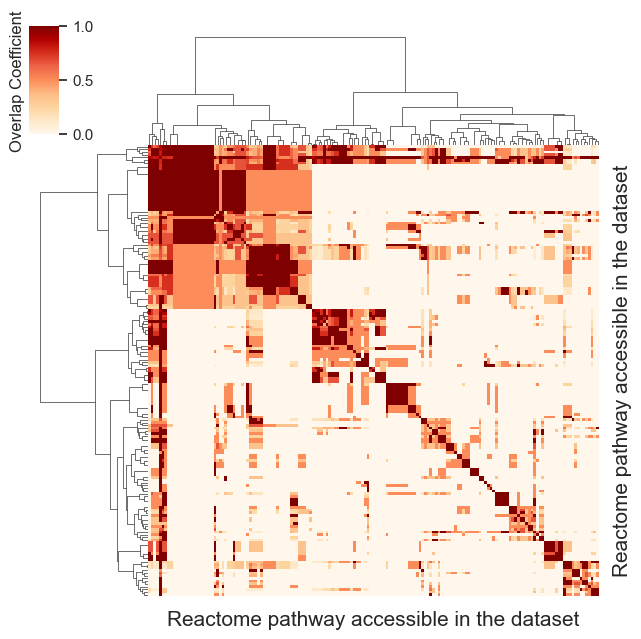

In [236]:
# Clustermap of overlap 

g = sns.clustermap(overlap_df, yticklabels= False, xticklabels= False, cmap = "OrRd", figsize = (6, 6), method = 'ward')
g.ax_heatmap.set_ylabel("Reactome pathway accessible in the dataset", fontsize=15)
g.ax_heatmap.set_xlabel("Reactome pathway accessible in the dataset", fontsize=15)
g.ax_cbar.set_ylabel("Overlap Coefficient",size=12, labelpad=-60)
plt.show()

Overlap of entire reactome database

In [180]:
# Making a heatmap of the overlap of the proteins in all dataset

overlap_coefficient_list_all = [] #empty list
for pathway_pair in itertools.permutations(reactome_dict_metabolites_series.keys(), 2): #itertool is a python package that does iter tools; does permutations of all the the things you give it 
    overlap_coefficient_list.append(overlap_coefficient(reactome_dict_metabolites_series[pathway_pair[0]], reactome_dict_metabolites_series[pathway_pair[1]]))

# itertools.permutations(iterable, r=None)
# Return successive r length permutations of elements in the iterable - we do 2 becauase we are doing a pairwise comparision so comparing 1 thing to 1 other thing

# this is a standard normal way of doing things
# make an empty list and store the overlap coefficent into the list for every pairwaise comparisons 
# for pathway_pair in itertools.permutations(all_pathways, 2) --  the 2 is what is telling you the pairwise part
# overlap_coefficient_list.append - adding to the open list 
# path_coverage[pathway_pair[0]] - pathway_coverage is our dictionary; pathway_pair is a tuple the we named from the itertools.permutations
# every pathway pair is a tuple containing 2 things; 0 and 1 is thing 1 in the tuple and thing 2 in the tuple


In [181]:
# Putting the list into a matrix 
#pathways_all = [k for k, v in all_pathways.items()]
rows = [] # makes an empty list

for i in reactome_dict_metabolites_series.keys():
    curr_row = []
    for p in reactome_dict_metabolites.keys():
        curr_row.append(overlap_coefficient(reactome_dict_metabolites_series[i],reactome_dict_metabolites_series[p]))
    rows.append(curr_row)

# building the matrix row by row
# when you iterate over something, you can call it whatever you want- here cecelia uses i and p ; youre trying to get the pairs
#within the loop you get another loop and by doing this you get pairs of everything 

In [182]:
overlap_ar_all = np.array(rows)
overlap_df_all = pd.DataFrame(overlap_ar_all, index=reactome_dict_metabolites.keys(), columns=reactome_dict_metabolites.keys())
overlap_df_all

R-HSA-1059683  R-HSA-109581  R-HSA-109582  R-HSA-109606  \
R-HSA-1059683            1.0      1.000000      1.000000      1.000000   
R-HSA-109581             1.0      1.000000      0.600000      1.000000   
R-HSA-109582             1.0      0.600000      1.000000      0.714286   
R-HSA-109606             1.0      1.000000      0.714286      1.000000   
R-HSA-109703             1.0      0.500000      0.833333      0.500000   
...                      ...           ...           ...           ...   
R-HSA-983695             1.0      0.333333      0.888889      0.428571   
R-HSA-983705             1.0      0.300000      0.857143      0.428571   
R-HSA-983712             1.0      0.500000      0.440000      0.714286   
R-HSA-991365             0.0      0.142857      0.714286      0.142857   
R-HSA-997272             0.0      0.000000      0.000000      0.000000   

               R-HSA-109703  R-HSA-109704  R-HSA-110056  R-HSA-110312  \
R-HSA-1059683      1.000000      1.000000           1.0          0.00   
R-HSA-109581       0.500000      0.444444           1.0          0.00   
R-HSA-109582       0.833333      0.888889           1.0          0.25   
R-HSA-109606       0.500000      0.428571           1.0          0.00   
R-HSA-109703       1.000000      1.000000           1.0          0.00   
...                     ...           ...           ...           ...   
R-HSA-983695       0.500000      0.444444           1.0          0.00   
R-HSA-983705       0.500000      0.444444           1.0          0.00   
R-HSA-983712       0.500000      0.333333           1.0          0.00   
R-HSA-991365       0.000000      0.000000           0.0          0.00   
R-HSA-997272       0.000000      0.000000           0.0          0.00   

               R-HSA-110313  R-HSA-110320  ...  R-HSA-983168  R-HSA-983169  \
R-HSA-1059683      1.000000      1.000000  ...      0.500000      1.000000   
R-HSA-109581       0.300000      0.333333  ...      0.142857      0.600000   
R-HSA-109582       0.600000      0.500000  ...      0.714286      0.551724   
R-HSA-109606       0.428571      0.333333  ...      0.142857      0.714286   
R-HSA-109703       0.500000      0.333333  ...      0.333333      0.666667   
...                     ...           ...  ...           ...           ...   
R-HSA-983695       0.222222      0.333333  ...      0.142857      0.555556   
R-HSA-983705       0.200000      0.333333  ...      0.142857      0.500000   
R-HSA-983712       0.500000      0.333333  ...      0.285714      0.320000   
R-HSA-991365       0.142857      0.000000  ...      0.142857      0.571429   
R-HSA-997272       0.000000      0.000000  ...      0.000000      0.000000   

               R-HSA-983170  R-HSA-983189  R-HSA-983231  R-HSA-983695  \
R-HSA-1059683      1.000000           1.0      1.000000      1.000000   
R-HSA-109581       0.500000           0.6      0.400000      0.333333   
R-HSA-109582       0.666667           1.0      1.000000      0.888889   
R-HSA-109606       0.714286           0.6      0.428571      0.428571   
R-HSA-109703       0.500000           0.4      0.500000      0.500000   
...                     ...           ...           ...           ...   
R-HSA-983695       0.333333           0.6      0.333333      1.000000   
R-HSA-983705       0.416667           1.0      0.357143      1.000000   
R-HSA-983712       0.416667           0.6      0.166667      0.444444   
R-HSA-991365       0.428571           0.4      0.285714      0.000000   
R-HSA-997272       0.000000           0.0      0.000000      0.000000   

               R-HSA-983705  R-HSA-983712  R-HSA-991365  R-HSA-997272  
R-HSA-1059683      1.000000      1.000000      0.000000           0.0  
R-HSA-109581       0.300000      0.500000      0.142857           0.0  
R-HSA-109582       0.857143      0.440000      0.714286           0.0  
R-HSA-109606       0.428571      0.714286      0.142857           0.0  
R-HSA-109703       0.500000      0.500000      0.000000           0.0  
...

/Users/sarapatti/opt/anaconda3/envs/Python_3104/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


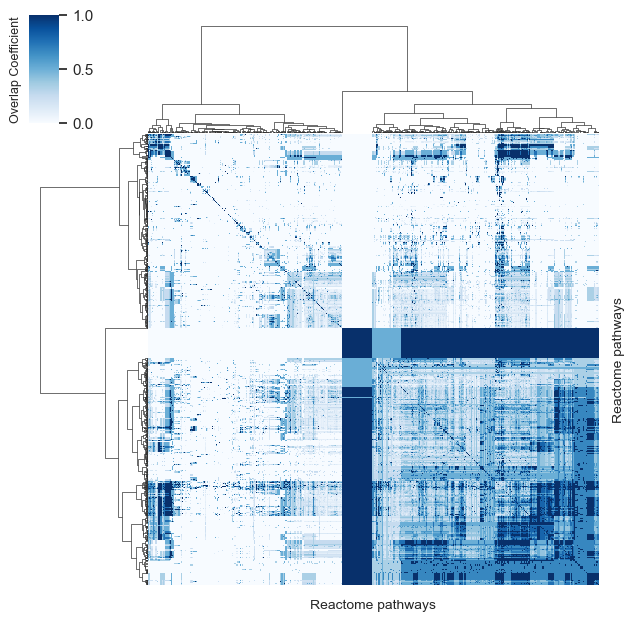

In [183]:
# Clustermap of overlap  - it looks exactly the same
color = sns.color_palette("Blues", as_cmap=True)
g = sns.clustermap(overlap_df_all, yticklabels= False, xticklabels= False, cmap = color, figsize = (6, 6), method = 'ward')
g.ax_heatmap.set_ylabel("Reactome pathways", fontsize=10)
g.ax_heatmap.set_xlabel("Reactome pathways", fontsize=10)
g.ax_cbar.set_ylabel("Overlap Coefficient",size=9, labelpad=-60)
plt.show()

In [184]:
# Making overlap dataframe
overlap_network = overlap_df.stack().reset_index()
overlap_network.columns = ["Pathway_1", "Pathway_2", "Overlap_Correlation"]
overlap_network

Pathway_1      Pathway_2  Overlap_Correlation
0      R-HSA-110331   R-HSA-110331                  1.0
1      R-HSA-110331   R-HSA-112310                  0.0
2      R-HSA-110331   R-HSA-112311                  0.0
3      R-HSA-110331   R-HSA-112315                  0.0
4      R-HSA-110331   R-HSA-112316                  0.0
...             ...            ...                  ...
27220  R-HSA-975634  R-HSA-9735804                  0.0
27221  R-HSA-975634  R-HSA-9748784                  0.0
27222  R-HSA-975634  R-HSA-9749641                  0.0
27223  R-HSA-975634  R-HSA-9753281                  0.0
27224  R-HSA-975634   R-HSA-975634                  1.0

[27225 rows x 3 columns]

In [185]:
# Check all connections are unique 
len(set(overlap_network.index.to_list())) 

27225

In [186]:
# Removing the 0 overlap 
overlap_network_nozero = overlap_network[overlap_network["Overlap_Correlation"] != 0]
overlap_network_nozero

Pathway_1      Pathway_2  Overlap_Correlation
0      R-HSA-110331   R-HSA-110331                  1.0
5      R-HSA-110331  R-HSA-1237112                  0.5
10     R-HSA-110331  R-HSA-1430728                  1.0
18     R-HSA-110331    R-HSA-15869                  1.0
22     R-HSA-110331  R-HSA-1614635                  0.5
...             ...            ...                  ...
27213  R-HSA-975634  R-HSA-9707564                  1.0
27214  R-HSA-975634  R-HSA-9707616                  1.0
27215  R-HSA-975634  R-HSA-9709957                  1.0
27216  R-HSA-975634  R-HSA-9711123                  1.0
27224  R-HSA-975634   R-HSA-975634                  1.0

[8335 rows x 3 columns]

Text(0.5, 1.0, 'Overlap Coefficient Metabolites (excluding 0)')

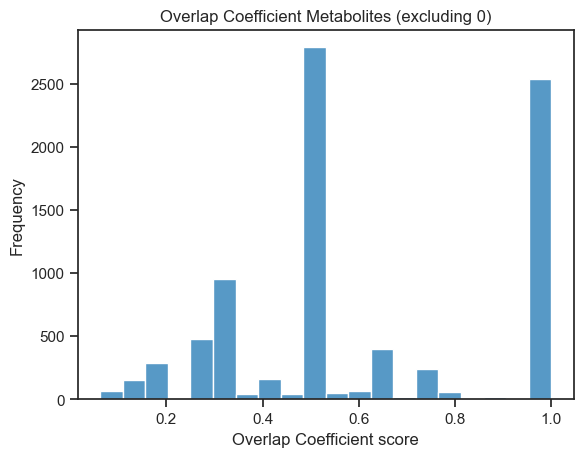

In [187]:
# Histogram of correlation score 

sns.histplot(data=overlap_network_nozero["Overlap_Correlation"], bins = 20)
plt.xlabel('Overlap Coefficient score')
plt.ylabel('Frequency')
plt.title('Overlap Coefficient Metabolites (excluding 0)')


In [188]:
# Thresholding overlap network
overlap_all_connections = overlap_network.loc[(overlap_network["Pathway_1"] != overlap_network["Pathway_2"])]
overlap_all_connections # All the pathways with high overlap

Pathway_1      Pathway_2  Overlap_Correlation
1      R-HSA-110331   R-HSA-112310                  0.0
2      R-HSA-110331   R-HSA-112311                  0.0
3      R-HSA-110331   R-HSA-112315                  0.0
4      R-HSA-110331   R-HSA-112316                  0.0
5      R-HSA-110331  R-HSA-1237112                  0.5
...             ...            ...                  ...
27219  R-HSA-975634  R-HSA-9734207                  0.0
27220  R-HSA-975634  R-HSA-9735804                  0.0
27221  R-HSA-975634  R-HSA-9748784                  0.0
27222  R-HSA-975634  R-HSA-9749641                  0.0
27223  R-HSA-975634  R-HSA-9753281                  0.0

[27060 rows x 3 columns]

In [189]:
fisher_and_overlap = pd.merge(fisher_exact_pathway_p_val_df_full, overlap_all_connections["Overlap_Correlation"], right_index= True, left_index= True)
fisher_and_overlap

Pathway1       Pathway2  Fisher_exact_p_val  Overlap_Correlation
1      R-HSA-110331   R-HSA-112311            1.000000                  0.0
2      R-HSA-110331   R-HSA-112315            1.000000                  0.0
3      R-HSA-110331   R-HSA-112316            1.000000                  0.0
4      R-HSA-110331  R-HSA-1237112            0.050949                  0.0
5      R-HSA-110331  R-HSA-1266738            1.000000                  0.5
...             ...            ...                 ...                  ...
27054  R-HSA-975634  R-HSA-9717207            1.000000                  0.0
27055  R-HSA-975634  R-HSA-9734207            1.000000                  0.0
27056  R-HSA-975634  R-HSA-9735804            1.000000                  1.0
27057  R-HSA-975634  R-HSA-9748784            1.000000                  0.5
27059  R-HSA-975634  R-HSA-9753281            1.000000                  0.0

[26896 rows x 4 columns]

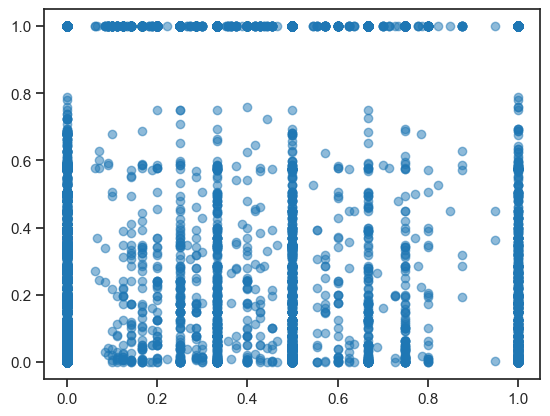

In [190]:
plt.scatter(fisher_and_overlap["Overlap_Correlation"], fisher_and_overlap["Fisher_exact_p_val"], alpha=0.5, )
plt.show()
# Check effect of pathway size on the calculations - map on size of largest pathway ; s = bubble size aka make larger pathway
# Make sure there are no bugs in the code 


# Creating a Network - Overlap

Text(0.5, 1.0, 'Metabolomics Network (COVID + Healthy)')

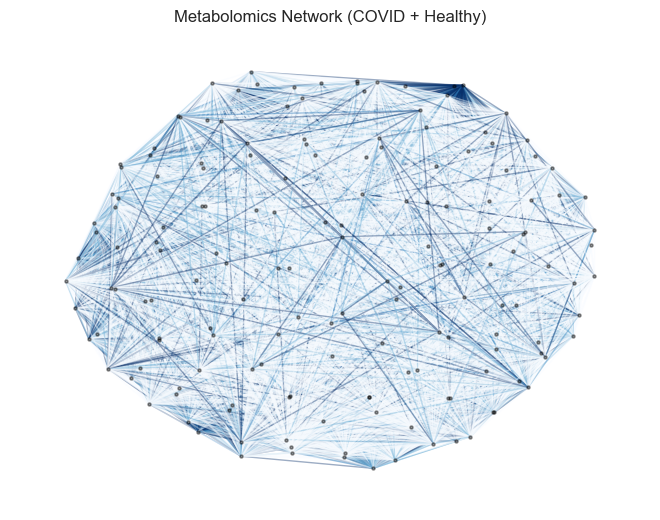

In [191]:
#Creating a networkx

# Create an empty graph structure (a “null graph”) with no nodes and no edges
G_overlap_all = nx.Graph() 

#Add the nodes from any container (a list, dict, set or even the lines from a file or the nodes from another graph)
G_overlap_all =nx.from_pandas_edgelist(overlap_all_connections, 'Pathway_1', 'Pathway_2', edge_attr= "Overlap_Correlation") #G.add_nodes
weight_corr = [i['Overlap_Correlation'] for i in dict(G_overlap_all.edges).values()]

nx.draw(G_overlap_all, with_labels=False, node_color='black', node_size=5, edge_color=weight_corr, font_size=5, edge_cmap=plt.cm.Blues, alpha = 0.4)
plt.title('Metabolomics Network (COVID + Healthy)')


In [192]:
# Proprties of graph

number_of_nodes = G_overlap_all.number_of_nodes()
print("Number of nodes:", number_of_nodes)

number_of_edges= G_overlap_all.number_of_edges()
print("Number of edges:", number_of_edges)

density =nx.density(G_overlap_all)
print("Graph density:", density)

Number of nodes: 165
Number of edges: 13530
Graph density: 1.0


In [193]:
# Save file to put into Cytoscape
nx.write_gml(G_overlap_all,'/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Cytoscape_files/Metabolomics_overlap_network_allconnections_V2.gml')

In [194]:
# Thresholding overlap network
overlap_thres = overlap_network.loc[(overlap_network["Overlap_Correlation"] >= 0.5) & (overlap_network["Pathway_1"] != overlap_network["Pathway_2"])]
overlap_thres # All the pathways with high overlap

Pathway_1      Pathway_2  Overlap_Correlation
5      R-HSA-110331  R-HSA-1237112                  0.5
10     R-HSA-110331  R-HSA-1430728                  1.0
18     R-HSA-110331    R-HSA-15869                  1.0
22     R-HSA-110331  R-HSA-1614635                  0.5
25     R-HSA-110331  R-HSA-1643685                  1.0
...             ...            ...                  ...
27210  R-HSA-975634  R-HSA-8978868                  1.0
27213  R-HSA-975634  R-HSA-9707564                  1.0
27214  R-HSA-975634  R-HSA-9707616                  1.0
27215  R-HSA-975634  R-HSA-9709957                  1.0
27216  R-HSA-975634  R-HSA-9711123                  1.0

[5994 rows x 3 columns]

Text(0.5, 1.0, 'Metabolomics Network (COVID + Healthy) overlap > 0.5')

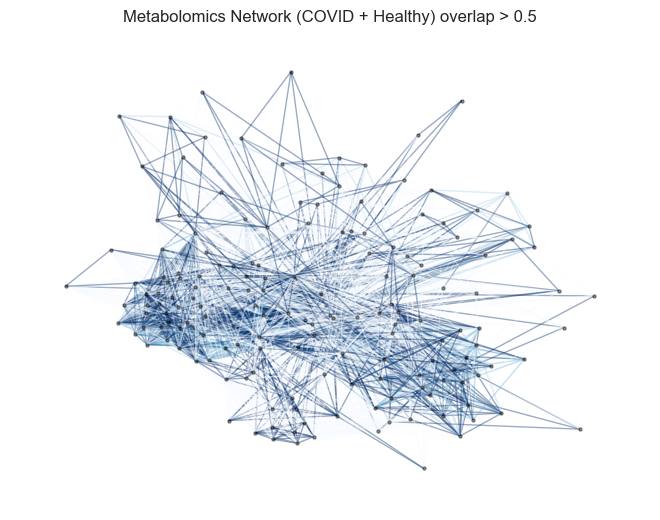

In [195]:
#Creating a networkx

# Create an empty graph structure (a “null graph”) with no nodes and no edges
G_overlap = nx.Graph() 

#Add the nodes from any container (a list, dict, set or even the lines from a file or the nodes from another graph)
G_overlap =nx.from_pandas_edgelist(overlap_thres, 'Pathway_1', 'Pathway_2', edge_attr= "Overlap_Correlation") #G.add_nodes
weight_corr = [i['Overlap_Correlation'] for i in dict(G_overlap.edges).values()]

nx.draw(G_overlap, with_labels=False, node_color='black', node_size=5, edge_color=weight_corr, font_size=5, edge_cmap=plt.cm.Blues, alpha = 0.4)

# Put graph into Cytoscape
nx.write_gml(G_overlap,'Metabolite_null_network.gml')
nx.write_graphml(G_overlap,'Metabolite_null_network.gml.gml') # Put graph into Cytoscape
plt.title('Metabolomics Network (COVID + Healthy) overlap > 0.5')


In [196]:
# Proprties of graph

number_of_nodes = G_overlap.number_of_nodes()
print("Number of nodes:", number_of_nodes)

number_of_edges= G_overlap.number_of_edges()
print("Number of edges:", number_of_edges)

density =nx.density(G_overlap)
print("Graph density:", density)

Number of nodes: 165
Number of edges: 2997
Graph density: 0.22150776053215077


Combine Correlation, p_val, and null network overlap scores

In [197]:
# All data (Healthy + COVID19)
kpca_scores_corr_pval

Pathway_1      Pathway_2  Correlation  Correlation_abs  \
0      R-HSA-110331   R-HSA-110331     1.000000         1.000000   
1      R-HSA-110331   R-HSA-112310    -0.349838         0.349838   
2      R-HSA-110331   R-HSA-112311     0.389574         0.389574   
3      R-HSA-110331   R-HSA-112315     0.498185         0.498185   
4      R-HSA-110331  R-HSA-1237112     0.747982         0.747982   
...             ...            ...          ...              ...   
22196  R-HSA-975634  R-HSA-9734207    -0.025499         0.025499   
22197  R-HSA-975634  R-HSA-9735804    -0.049942         0.049942   
22198  R-HSA-975634  R-HSA-9749641     0.082327         0.082327   
22199  R-HSA-975634  R-HSA-9753281    -0.021690         0.021690   
22200  R-HSA-975634   R-HSA-975634     1.000000         1.000000   

              p_val  p_val_adjust  log10_p_val_adjusted  
0      0.000000e+00  0.000000e+00                   inf  
1      5.486517e-09  1.218062e-04              3.914331  
2      5.821297e-11  1.292386e-06              5.888608  
3      6.655964e-18  1.477691e-13             12.830416  
4      2.269312e-48  5.038100e-44             43.297733  
...             ...           ...                   ...  
22196  6.806149e-01  1.000000e+00             -0.000000  
22197  4.199130e-01  1.000000e+00             -0.000000  
22198  1.831827e-01  1.000000e+00             -0.000000  
22199  7.262464e-01  1.000000e+00             -0.000000  
22200  0.000000e+00  0.000000e+00                   inf  

[22201 rows x 7 columns]

In [198]:
# Total overlap and correlation dataframe
all_df = kpca_scores_corr_pval.merge(overlap_network["Overlap_Correlation"], right_index = True, left_index = True)
print(len(all_df))

# Save to files
all_df.to_csv('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Exported files/metabolite_all.csv')
all_df 

22201


Pathway_1      Pathway_2  Correlation  Correlation_abs  \
0      R-HSA-110331   R-HSA-110331     1.000000         1.000000   
1      R-HSA-110331   R-HSA-112310    -0.349838         0.349838   
2      R-HSA-110331   R-HSA-112311     0.389574         0.389574   
3      R-HSA-110331   R-HSA-112315     0.498185         0.498185   
4      R-HSA-110331  R-HSA-1237112     0.747982         0.747982   
...             ...            ...          ...              ...   
22196  R-HSA-975634  R-HSA-9734207    -0.025499         0.025499   
22197  R-HSA-975634  R-HSA-9735804    -0.049942         0.049942   
22198  R-HSA-975634  R-HSA-9749641     0.082327         0.082327   
22199  R-HSA-975634  R-HSA-9753281    -0.021690         0.021690   
22200  R-HSA-975634   R-HSA-975634     1.000000         1.000000   

              p_val  p_val_adjust  log10_p_val_adjusted  Overlap_Correlation  
0      0.000000e+00  0.000000e+00                   inf                  1.0  
1      5.486517e-09  1.218062e-04              3.914331                  0.0  
2      5.821297e-11  1.292386e-06              5.888608                  0.0  
3      6.655964e-18  1.477691e-13             12.830416                  0.0  
4      2.269312e-48  5.038100e-44             43.297733                  0.0  
...             ...           ...                   ...                  ...  
22196  6.806149e-01  1.000000e+00             -0.000000                  0.5  
22197  4.199130e-01  1.000000e+00             -0.000000                  0.0  
22198  1.831827e-01  1.000000e+00             -0.000000                  0.5  
22199  7.262464e-01  1.000000e+00             -0.000000                  0.0  
22200  0.000000e+00  0.000000e+00                   inf                  0.5  

[22201 rows x 8 columns]

In [199]:
# Threshold
all_df_threshold = all_df[(all_df["Pathway_1"] != all_df["Pathway_2"]) & (all_df["p_val_adjust"] <= 0.005) & (all_df["Overlap_Correlation"] < 0.5)]
print(len(all_df_threshold))

# Removed pathways that are the same
# Removed pathways with bonferroni adjusted p val > 0.05
# Removed pathways with overlap coefficent >= 0.5

# Save to files
all_df.to_csv('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Exported files/metabolite_all_threshold.csv')

all_df_threshold

5109


Pathway_1      Pathway_2  Correlation  Correlation_abs  \
1      R-HSA-110331   R-HSA-112310    -0.349838         0.349838   
2      R-HSA-110331   R-HSA-112311     0.389574         0.389574   
3      R-HSA-110331   R-HSA-112315     0.498185         0.498185   
4      R-HSA-110331  R-HSA-1237112     0.747982         0.747982   
9      R-HSA-110331  R-HSA-1483206     0.512552         0.512552   
...             ...            ...          ...              ...   
22153  R-HSA-975634  R-HSA-6806667     0.959832         0.959832   
22155  R-HSA-975634    R-HSA-70171    -0.499954         0.499954   
22156  R-HSA-975634    R-HSA-70326    -0.499954         0.499954   
22174  R-HSA-975634    R-HSA-75105     0.727894         0.727894   
22187  R-HSA-975634  R-HSA-8957322     0.896193         0.896193   

               p_val   p_val_adjust  log10_p_val_adjusted  Overlap_Correlation  
1       5.486517e-09   1.218062e-04              3.914331                  0.0  
2       5.821297e-11   1.292386e-06              5.888608                  0.0  
3       6.655964e-18   1.477691e-13             12.830416                  0.0  
4       2.269312e-48   5.038100e-44             43.297733                  0.0  
9       5.079082e-19   1.127607e-14             13.947842                  0.0  
...              ...            ...                   ...                  ...  
22153  4.485735e-146  9.958780e-142            141.001794                  0.0  
22155   4.880178e-18   1.083448e-13             12.965192                  0.0  
22156   4.880178e-18   1.083448e-13             12.965192                  0.0  
22174   1.145422e-44   2.542951e-40             39.594662                  0.0  
22187   4.186651e-94   9.294785e-90             89.031761                  0.0  

[5109 rows x 8 columns]

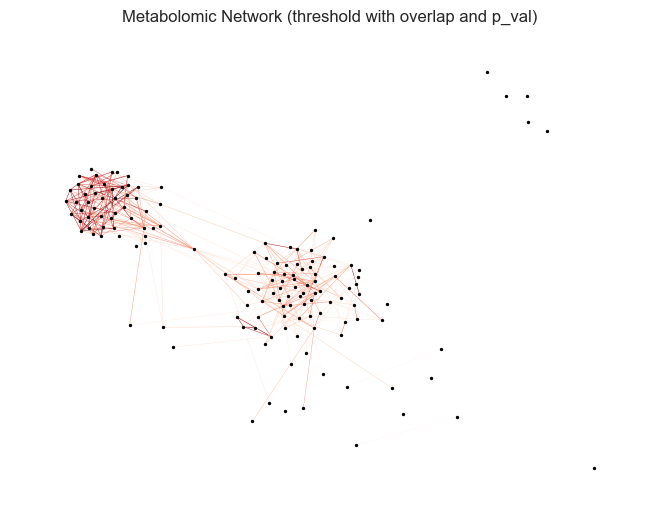

In [200]:
##Metabolomic data set - all samples 

G_all_df_threshold = nx.from_pandas_edgelist(all_df_threshold, 'Pathway_1', 'Pathway_2', edge_attr= ["Correlation_abs","Overlap_Correlation","p_val_adjust"])

weight_corr = [i['Correlation_abs'] for i in dict(G_all_df_threshold.edges).values()]
overlap_coef = [i['Overlap_Correlation'] for i in dict(G_all_df_threshold.edges).values()] 
p_val_adjust = [i['p_val_adjust'] for i in dict(G_all_df_threshold.edges).values()] 

nx.draw(G_all_df_threshold, with_labels=False, node_color='black', node_size=2, edge_color=weight_corr, width = overlap_coef, font_size=5, edge_cmap=plt.cm.Reds)
plt.title('Metabolomic Network (threshold with overlap and p_val)')

#Save file
nx.write_gml(G_all_df_threshold, '/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Cytoscape_files/Metabolite_correlation_overlap_1.10.23.gml')


In [201]:
# Proprties of graph
density = nx.density(G_all_df_threshold)
print("Density:", density)

number_of_edges= G_all_df_threshold .number_of_edges()
print("Number of edges:", number_of_edges)

density =nx.density(G_all_df_threshold )
print("Graph density:", density)

number_of_nodes = G_all_df_threshold.number_of_nodes()
print("Number of nodes:", number_of_nodes)


Density: 0.29177150312179667
Number of edges: 3131
Graph density: 0.29177150312179667
Number of nodes: 147


In [202]:

## Add more attributes
degree_centrality = nx.degree_centrality(G_all_df_threshold) # Compute the degree centrality for nodes
degree_centrality_df = pd.DataFrame(list(degree_centrality.items()), columns= ["Node", "Degree_centrality"])
degree_centrality_df


clustering = nx.clustering(G_all_df_threshold) # Compute the clustering coefficent for nodes
clustering_df = pd.DataFrame(list(clustering.items()), columns= ["Node", "Clustering"])
clustering_df

btwn_centrality = nx.betweenness_centrality(G_all_df_threshold)
btwn_centrality_df = pd.DataFrame(list(btwn_centrality.items()), columns= ["Node", "Betweenness_centrality"])
btwn_centrality_df

degree = list(G_all_df_threshold.degree)
degree_df = pd.DataFrame(degree, columns = ["Nodes", "Degree"])
degree_df 

# Merge attributes

attributes_df = pd.merge(degree_centrality_df, clustering_df["Clustering"], left_index = True, right_index = True)
attributes_df = pd.merge(attributes_df, btwn_centrality_df["Betweenness_centrality"], left_index = True, right_index = True)
attributes_df = pd.merge(attributes_df, degree_df["Degree"], left_index = True, right_index = True)



In [203]:
# # LOCKING BECAUSE IT DOES RANDOM SEEDING

# # Community 

# import networkx.algorithms.community as nx_comm
# louvain_communities = nx_comm.louvain_communities(G_all_df_threshold)
# louvain_communities = pd.DataFrame(louvain_communities)
# louvain_communities


In [204]:
# # Export to excel
# louvain_communities.to_excel('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Exported files/louvain_communities_metabolites.xlsx')

In [205]:
# #Transpose
# community = louvain_communities.transpose()

# # Seperate into seperate lists 
# community_1 = louvain_communities.iloc[0,:]
# community_2 = louvain_communities.iloc[1,:]
# community_3 = louvain_communities.iloc[2,:]
# community_4 = louvain_communities.iloc[3,:]
# community_5 = louvain_communities.iloc[4,:]

# # To list
# community_1_list = community_1.to_list()
# community_2_list = community_2.to_list()
# community_3_list = community_3.to_list()
# community_4_list = community_4.to_list()
# community_5_list = community_5.to_list()

In [206]:
# # Drop empty values

# community_1_lists = []
# for val in community_1_list:
#     if val != None :
#         community_1_lists.append(val)

# community_2_lists = []
# for val in community_2_list:
#     if val != None :
#         community_2_lists.append(val)

# community_3_lists = []
# for val in community_3_list:
#     if val != None :
#         community_3_lists.append(val)

# community_4_lists = []
# for val in community_4_list:
#     if val != None :
#         community_4_lists.append(val)

# community_5_lists = []
# for val in community_5_list:
#     if val != None :
#         community_5_lists.append(val)


# print("Length of community 1:", len(community_1_lists))
# print("Length of community 2:", len(community_2_lists))
# print("Length of community 3:", len(community_3_lists))
# print("Length of community 4:", len(community_4_lists))
# print("Length of community 5:", len(community_5_lists))

In [207]:
# Import from excel
louvain_communities = pd.read_excel('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Exported files/organized_communities.xlsx')

In [208]:
# Combine data frames

# Mean value for pathway score for each WHO status

kPCA_0 = kPCA_WHO_status_stack[kPCA_WHO_status_stack["WHO_status"] == "0"]
kPCA_0 = kPCA_0.rename(columns={'Mean_Pathway_score': 'Pathway_Score_healthy'})
kPCA_0= kPCA_0.set_index("Pathway")


kPCA_1_2 = kPCA_WHO_status_stack[kPCA_WHO_status_stack["WHO_status"] == "1-2"]
kPCA_1_2 = kPCA_1_2.rename(columns={'Mean_Pathway_score': 'Pathway_Score_mild'})
kPCA_1_2= kPCA_1_2.set_index("Pathway")

kPCA_3_4 = kPCA_WHO_status_stack[kPCA_WHO_status_stack["WHO_status"] == "3-4"]
kPCA_3_4 = kPCA_3_4.rename(columns={'Mean_Pathway_score': 'Pathway_Score_moderate'})
kPCA_3_4= kPCA_3_4.set_index("Pathway")

kPCA_5_7 = kPCA_WHO_status_stack[kPCA_WHO_status_stack["WHO_status"] == "5-7"]
kPCA_5_7 = kPCA_5_7.rename(columns={'Mean_Pathway_score': 'Pathway_Score_severe'})
kPCA_5_7= kPCA_5_7.set_index("Pathway")

In [209]:
# Make data fram with mean pathway score for each WHO status

who_status_mean = pd.merge(kPCA_0["Pathway_Score_healthy"], kPCA_1_2["Pathway_Score_mild"], on= ["Pathway"])
who_status_mean = pd.merge(who_status_mean, kPCA_3_4["Pathway_Score_moderate"], on= ["Pathway"])
who_status_mean = pd.merge(who_status_mean, kPCA_5_7["Pathway_Score_severe"], on= ["Pathway"])
who_status_mean = who_status_mean.reset_index()
who_status_mean = who_status_mean.rename(columns = {"Pathway": "Node"})
who_status_mean


Node  Pathway_Score_healthy  Pathway_Score_mild  \
0     R-HSA-110331              -0.288637            0.228416   
1     R-HSA-112310               0.101868            0.066278   
2     R-HSA-112311              -0.142209           -0.005135   
3     R-HSA-112315              -0.158051           -0.005103   
4    R-HSA-1237112              -0.296531            0.308802   
..             ...                    ...                 ...   
144  R-HSA-9734207              -0.272835            0.243460   
145  R-HSA-9735804              -0.316299            0.260565   
146  R-HSA-9749641              -0.120805           -0.050578   
147  R-HSA-9753281              -0.085742            0.242084   
148   R-HSA-975634               0.048451           -0.250370   

     Pathway_Score_moderate  Pathway_Score_severe  
0                  0.297549              0.398201  
1                 -0.184388             -0.215029  
2                  0.178810              0.319740  
3                  0.230301              0.290117  
4                  0.271669              0.359193  
..                      ...                   ...  
144                0.266097              0.362994  
145                0.325515              0.420997  
146                0.198752              0.250507  
147               -0.011686              0.042001  
148                0.089494             -0.009944  

[149 rows x 5 columns]

In [210]:
# Save to file 
who_status_mean.to_csv('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Exported files/Metabolite_pathwayscores.csv')

In [211]:
# Pathway hiercharcy
hierarchy = pd.read_csv('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Exported files/hierarchy_hsa_all.csv', index_col=0)
hierarchy.columns = ['Parent', 'Node', 'Hierarchy']
hierarchy

Parent           Node      Hierarchy
10591   R-HSA-109581   R-HSA-109606  R-HSA-5357801
10592   R-HSA-109581   R-HSA-169911  R-HSA-5357801
10593   R-HSA-109581  R-HSA-5357769  R-HSA-5357801
10594   R-HSA-109581    R-HSA-75153  R-HSA-5357801
10595   R-HSA-109582   R-HSA-140877   R-HSA-109582
...              ...            ...            ...
24     R-HSA-8963743  R-HSA-8963743  R-HSA-8963743
25     R-HSA-9609507  R-HSA-9609507  R-HSA-9609507
26     R-HSA-9612973  R-HSA-9612973  R-HSA-9612973
27     R-HSA-9709957  R-HSA-9709957  R-HSA-9709957
28     R-HSA-9748784  R-HSA-9748784  R-HSA-9748784

[2657 rows x 3 columns]

In [212]:
# Name pathways with names

hierarchy['Hierarchy'] = hierarchy['Hierarchy'].map(reactome_dict)
hierarchy

Parent           Node                 Hierarchy
10591   R-HSA-109581   R-HSA-109606     Programmed Cell Death
10592   R-HSA-109581   R-HSA-169911     Programmed Cell Death
10593   R-HSA-109581  R-HSA-5357769     Programmed Cell Death
10594   R-HSA-109581    R-HSA-75153     Programmed Cell Death
10595   R-HSA-109582   R-HSA-140877                Hemostasis
...              ...            ...                       ...
24     R-HSA-8963743  R-HSA-8963743  Digestion and absorption
25     R-HSA-9609507  R-HSA-9609507      Protein localization
26     R-HSA-9612973  R-HSA-9612973                 Autophagy
27     R-HSA-9709957  R-HSA-9709957        Sensory Perception
28     R-HSA-9748784  R-HSA-9748784                 Drug ADME

[2657 rows x 3 columns]

In [213]:
# Adding mean value for WHO status

attributes_df_WHO_status = pd.merge(attributes_df, who_status_mean, on= ["Node"])
attributes_df_WHO_status = attributes_df_WHO_status.drop_duplicates(subset=['Node'])

# Save to files
attributes_df_WHO_status.to_csv('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Exported files/Metabolite_node_attributes.csv')

In [214]:
# Adding heirchary 
attributes_df_WHO_status_hierarchy = attributes_df_WHO_status.merge(hierarchy, how='left', on='Node')

# Adding community
attributes_df_WHO_status_hierarchy_communities = attributes_df_WHO_status_hierarchy.merge(louvain_communities, how='left', on='Node')
# how do I have a new pathway?? I have a duplicated node

# Dropping duplicates
attributes_df_WHO_status_hierarchy_communities = attributes_df_WHO_status_hierarchy_communities.drop_duplicates(subset=['Node'])

In [215]:
# Make edgelist
edgelist = all_df_threshold.drop(columns = ["p_val", "log10_p_val_adjusted"])
edgelist

Pathway_1      Pathway_2  Correlation  Correlation_abs  \
1      R-HSA-110331   R-HSA-112310    -0.349838         0.349838   
2      R-HSA-110331   R-HSA-112311     0.389574         0.389574   
3      R-HSA-110331   R-HSA-112315     0.498185         0.498185   
4      R-HSA-110331  R-HSA-1237112     0.747982         0.747982   
9      R-HSA-110331  R-HSA-1483206     0.512552         0.512552   
...             ...            ...          ...              ...   
22153  R-HSA-975634  R-HSA-6806667     0.959832         0.959832   
22155  R-HSA-975634    R-HSA-70171    -0.499954         0.499954   
22156  R-HSA-975634    R-HSA-70326    -0.499954         0.499954   
22174  R-HSA-975634    R-HSA-75105     0.727894         0.727894   
22187  R-HSA-975634  R-HSA-8957322     0.896193         0.896193   

        p_val_adjust  Overlap_Correlation  
1       1.218062e-04                  0.0  
2       1.292386e-06                  0.0  
3       1.477691e-13                  0.0  
4       5.038100e-44                  0.0  
9       1.127607e-14                  0.0  
...              ...                  ...  
22153  9.958780e-142                  0.0  
22155   1.083448e-13                  0.0  
22156   1.083448e-13                  0.0  
22174   2.542951e-40                  0.0  
22187   9.294785e-90                  0.0  

[5109 rows x 6 columns]

In [216]:
# Add pathway names
names_pathways = reactome_pathways.iloc[:,:1]
names_pathways.index.name = 'Node'
attributes_df_WHO_status_hierarchy_communities = pd.merge(attributes_df_WHO_status_hierarchy_communities, names_pathways, on=['Node'])


In [217]:
# Complete node attributes
complete_attributes_metabolites = attributes_df_WHO_status_hierarchy_communities
complete_attributes_metabolites

Node  Degree_centrality  Clustering  Betweenness_centrality  \
0     R-HSA-110331           0.410959    0.755367                0.002788   
1     R-HSA-112310           0.547945    0.465506                0.127307   
2     R-HSA-112311           0.397260    0.701149                0.008928   
3     R-HSA-112315           0.547945    0.428797                0.104313   
4    R-HSA-1237112           0.356164    0.776018                0.001494   
..             ...                ...         ...                     ...   
142   R-HSA-351202           0.143836    0.728571                0.004574   
143    R-HSA-71288           0.102740    0.933333                0.000014   
144   R-HSA-549132           0.034247    0.300000                0.001039   
145   R-HSA-196071           0.006849    0.000000                0.000000   
146   R-HSA-420499           0.041096    0.600000                0.000298   

     Degree  Pathway_Score_healthy  Pathway_Score_mild  \
0        60              -0.288637            0.228416   
1        80               0.101868            0.066278   
2        58              -0.142209           -0.005135   
3        80              -0.158051           -0.005103   
4        52              -0.296531            0.308802   
..      ...                    ...                 ...   
142      21              -0.118564           -0.176431   
143      15              -0.133590           -0.045516   
144       5              -0.069261            0.182296   
145       1              -0.040647           -0.078189   
146       6              -0.122146            0.078004   

     Pathway_Score_moderate  Pathway_Score_severe         Parent  \
0                  0.297549              0.398201    R-HSA-73927   
1                 -0.184388             -0.215029   R-HSA-112315   
2                  0.178810              0.319740   R-HSA-112315   
3                  0.230301              0.290117   R-HSA-112316   
4                  0.271669              0.359193  R-HSA-1614635   
..                      ...                   ...            ...   
142                0.237450              0.363350    R-HSA-71291   
143                0.194705              0.311342    R-HSA-71291   
144                0.033128             -0.031427   R-HSA-425366   
145                0.133966              0.046016  R-HSA-8957322   
146                0.174079              0.100456   R-HSA-500792   

                        Hierarchy  Community  \
0                      DNA Repair          4   
1                 Neuronal System          5   
2                 Neuronal System          4   
3                 Neuronal System          4   
4                      Metabolism          4   
..                            ...        ...   
142                    Metabolism          4   
143                    Metabolism          4   
144  Transport of small molecules          1   
145                    Metabolism          1   
146           Signal Transduction          1   

                                          Pathway_name  
0                       Cleavage of the damaged purine  
1                       Neurotransmitter release cycle  
2                           Neurotransmitter clearance  
3                Transmission across Chemical Synapses  
4                           Methionine salvage pathway  
..                                                 ...  
142                           Metabolism of polyamines  
143                                Creatine metabolism  
144          Organic cation/anion/zwitterion transport  
145                     Metabolism of steroid hormones  
146  Class C/3 (Metabotropic glutamate/pheromone re...  

[147 rows x 13 columns]

In [218]:
# Make a dictionary with the node as a key
complete_attributes_metabolites = complete_attributes_metabolites.set_index('Node')
complete_attributes_metabolites_dict = complete_attributes_metabolites.to_dict('index')
# index makes a nested formatted dictionary 

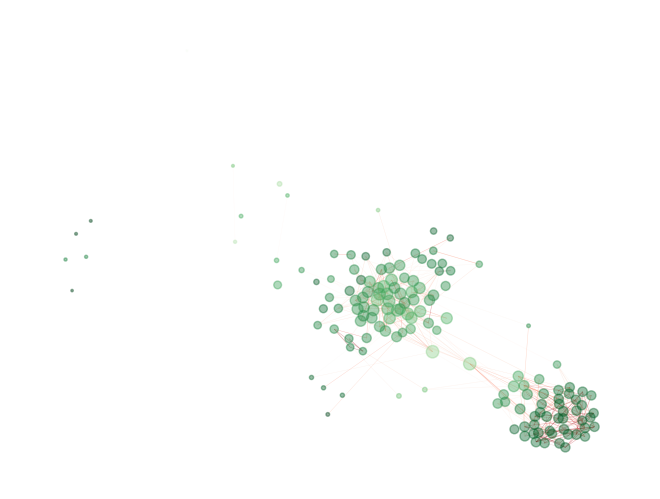

In [219]:
# Make edges
G_metabolite = nx.from_pandas_edgelist(df=edgelist, source='Pathway_1', target='Pathway_2', edge_attr=['Correlation_abs', 'Overlap_Correlation'])

weight_corr = [i['Correlation_abs'] for i in dict(G_metabolite.edges).values()] # Will ensure that the order is correct
overlap_coef = [i['Overlap_Correlation'] for i in dict(G_metabolite.edges).values()] 

#Set Node Attributes
nx.set_node_attributes(G_metabolite, complete_attributes_metabolites_dict)

#Draw graph
nx.draw(G_metabolite, with_labels=False, node_color = attributes_df["Clustering"], node_size= attributes_df["Degree"], 
    edge_color=weight_corr, width = overlap_coef, font_size=5, edge_cmap=plt.cm.Reds, cmap=plt.cm.Greens, alpha=0.4)

In [220]:
dict(G_metabolite.edges)

{('R-HSA-110331', 'R-HSA-112310'): {'Correlation_abs': 0.3498375916597842,
  'Overlap_Correlation': 0.0},
 ('R-HSA-110331', 'R-HSA-112311'): {'Correlation_abs': 0.38957354287659335,
  'Overlap_Correlation': 0.0},
 ('R-HSA-110331', 'R-HSA-112315'): {'Correlation_abs': 0.4981846151410484,
  'Overlap_Correlation': 0.3333333333333333},
 ('R-HSA-110331', 'R-HSA-1237112'): {'Correlation_abs': 0.7479820994609255,
  'Overlap_Correlation': 0.0},
 ('R-HSA-110331', 'R-HSA-1483206'): {'Correlation_abs': 0.5125520142064419,
  'Overlap_Correlation': 0.0},
 ('R-HSA-110331', 'R-HSA-1483257'): {'Correlation_abs': 0.48895860764203136,
  'Overlap_Correlation': 0.0},
 ('R-HSA-110331', 'R-HSA-156582'): {'Correlation_abs': 0.3263721591733665,
  'Overlap_Correlation': 0.0},
 ('R-HSA-110331', 'R-HSA-15869'): {'Correlation_abs': 0.7984797471126671,
  'Overlap_Correlation': 0.0},
 ('R-HSA-110331', 'R-HSA-1614635'): {'Correlation_abs': 0.6748145695189492,
  'Overlap_Correlation': 0.0},
 ('R-HSA-110331', 'R-HSA-1

In [221]:
# To look at node information
G_metabolite.nodes['R-HSA-425393']

{'Degree_centrality': 0.4520547945205479,
 'Clustering': 0.6261072261072261,
 'Betweenness_centrality': 0.012104620078077897,
 'Degree': 66,
 'Pathway_Score_healthy': 0.13745442069565367,
 'Pathway_Score_mild': 0.07353023800815339,
 'Pathway_Score_moderate': -0.21758985435050712,
 'Pathway_Score_severe': -0.32813132017535496,
 'Parent': 'R-HSA-425407',
 'Hierarchy': 'Transport of small molecules',
 'Community': 4,
 'Pathway_name': 'Transport of inorganic cations/anions and amino acids/oligopeptides'}

In [222]:
# To look at edge information
G_metabolite.edges['R-HSA-425393','R-HSA-6782315']

{'Correlation_abs': 0.5549912529058031, 'Overlap_Correlation': 0.0}

In [223]:
#Save file
nx.write_gml(G_metabolite,'/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Cytoscape_files/Metabolite_full_network_withattributes_V6.gml')

# Work in progress

In [224]:
# # Healthy 

# healthy_df = healthy_corr_spearman_pval_corrected.merge(overlap_network["Overlap_Correlation"], right_index = True, left_index = True)
# print(len(healthy_df))

# healthy_df_threshold = healthy_df[(healthy_df["Pathway_1"] != healthy_df["Pathway_2"]) & (healthy_df["p_val_adjust"] <= 0.05) & (healthy_df["Overlap_Correlation"] < 0.5)]
# print(len(healthy_df_threshold))

# # COVID19

# COVID19_df = COVID19_corr_spearman_pval_corrected.merge(overlap_network["Overlap_Correlation"], right_index = True, left_index = True)
# print(len(COVID19_df))

# COVID19_df_threshold = COVID19_df [(COVID19_df ["Pathway_1"] != COVID19_df ["Pathway_2"]) & (COVID19_df ["p_val_adjust"] <= 0.05) & (COVID19_df ["Overlap_Correlation"] < 0.5)]
# print(len(COVID19_df_threshold))


In [225]:
# ##Network for healthy samples

# G_healthy_df_threshold = nx.from_pandas_edgelist(healthy_df_threshold, 'Pathway_1', 'Pathway_2', edge_attr= "Correlation")

# weight_corr = [i['Correlation'] for i in dict(G_healthy_df_threshold.edges).values()]

# nx.draw(G_healthy_df_threshold, with_labels=False, node_color='black', node_size=2, edge_color=weight_corr, font_size=5, edge_cmap=plt.cm.Greens)
# plt.title('Metabolomic Network threshold with overlap and p_val - Healthy')

In [226]:
# ##Network for COVID19 samples

# G_COVID19_df_threshold = nx.from_pandas_edgelist(COVID19_df_threshold, 'Pathway_1', 'Pathway_2', edge_attr= "Correlation")

# weight_corr = [i['Correlation'] for i in dict(G_COVID19_df_threshold.edges).values()]

# nx.draw(G_COVID19_df_threshold, with_labels=False, node_color='black', node_size=2, edge_color=weight_corr, font_size=5, edge_cmap=plt.cm.Reds)
# plt.title('Metabolomic Network threshold with overlap and p_val - COVID19')

In [227]:
# ##Network for healthy samples Combined

# G_healthy_df_threshold = nx.from_pandas_edgelist(healthy_df_threshold, 'Pathway_1', 'Pathway_2', edge_attr= "Correlation")

# weight_corr = [i['Correlation'] for i in dict(G_healthy_df_threshold.edges).values()]

# nx.draw(G_healthy_df_threshold, with_labels=False, node_color='black', node_size=2, edge_color=weight_corr, font_size=5, edge_cmap=plt.cm.Greens)
# plt.title('Metabolomic Network threshold with overlap and p_val - Healthy')

# G_COVID19_df_threshold = nx.from_pandas_edgelist(COVID19_df_threshold, 'Pathway_1', 'Pathway_2', edge_attr= "Correlation")

# weight_corr = [i['Correlation'] for i in dict(G_COVID19_df_threshold.edges).values()]

# nx.draw(G_COVID19_df_threshold, with_labels=False, node_color='black', node_size=2, edge_color=weight_corr, font_size=5, edge_cmap=plt.cm.Reds)
# plt.title('Metabolomic Network threshold with overlap and p_val - COVID19')

# Simulating Data

### Creation of semi-synthetic simulated data
The method is outlined in Wieder, C., Lai, R.P.J. & Ebbels, T.M.D. Single sample pathway analysis in metabolomics: performance evaluation and application. BMC Bioinformatics 23, 481 (2022). https://doi.org/10.1186/s12859-022-05005-1

The code is contained in ```simulate_pathway_signals.py```

Step 1:  Load in data

In [228]:
all_df

Pathway_1      Pathway_2  Correlation  Correlation_abs  \
0      R-HSA-110331   R-HSA-110331     1.000000         1.000000   
1      R-HSA-110331   R-HSA-112310    -0.349838         0.349838   
2      R-HSA-110331   R-HSA-112311     0.389574         0.389574   
3      R-HSA-110331   R-HSA-112315     0.498185         0.498185   
4      R-HSA-110331  R-HSA-1237112     0.747982         0.747982   
...             ...            ...          ...              ...   
22196  R-HSA-975634  R-HSA-9734207    -0.025499         0.025499   
22197  R-HSA-975634  R-HSA-9735804    -0.049942         0.049942   
22198  R-HSA-975634  R-HSA-9749641     0.082327         0.082327   
22199  R-HSA-975634  R-HSA-9753281    -0.021690         0.021690   
22200  R-HSA-975634   R-HSA-975634     1.000000         1.000000   

              p_val  p_val_adjust  log10_p_val_adjusted  Overlap_Correlation  
0      0.000000e+00  0.000000e+00                   inf                  1.0  
1      5.486517e-09  1.218062e-04              3.914331                  0.0  
2      5.821297e-11  1.292386e-06              5.888608                  0.0  
3      6.655964e-18  1.477691e-13             12.830416                  0.0  
4      2.269312e-48  5.038100e-44             43.297733                  0.0  
...             ...           ...                   ...                  ...  
22196  6.806149e-01  1.000000e+00             -0.000000                  0.5  
22197  4.199130e-01  1.000000e+00             -0.000000                  0.0  
22198  1.831827e-01  1.000000e+00             -0.000000                  0.5  
22199  7.262464e-01  1.000000e+00             -0.000000                  0.0  
22200  0.000000e+00  0.000000e+00                   inf                  0.5  

[22201 rows x 8 columns]

In [229]:
all_df.to_excel('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Exported files/metabolites_correlation_overlap.xlsx')

In [230]:
all_df_filtered = all_df.loc[(all_df["Pathway_1"] != all_df["Pathway_2"]) & (all_df["Overlap_Correlation"]<=0.3)]
all_df_filtered = all_df_filtered.drop(columns=["log10_p_val_adjusted"])
all_df_filtered = all_df_filtered.sort_values(by=["Overlap_Correlation", "Correlation_abs"])
all_df_filtered

Pathway_1      Pathway_2  Correlation  Correlation_abs  \
5656    R-HSA-211976  R-HSA-9717207    -0.000352         0.000352   
21344  R-HSA-9717207   R-HSA-211976    -0.000352         0.000352   
4434    R-HSA-196071    R-HSA-73614    -0.000354         0.000354   
16866    R-HSA-73614   R-HSA-196071    -0.000354         0.000354   
6908   R-HSA-2408508   R-HSA-372790     0.000479         0.000479   
...              ...            ...          ...              ...   
13369  R-HSA-5619102    R-HSA-71387    -0.605137         0.605137   
741    R-HSA-1237112  R-HSA-9735804     0.742920         0.742920   
13368  R-HSA-5619102    R-HSA-71291    -0.787682         0.787682   
13545  R-HSA-5619108  R-HSA-8957322    -0.850080         0.850080   
13038  R-HSA-5619071   R-HSA-433692     0.910652         0.910652   

               p_val  p_val_adjust  Overlap_Correlation  
5656    9.954637e-01  1.000000e+00                  0.0  
21344   9.954637e-01  1.000000e+00                  0.0  
4434    9.954382e-01  1.000000e+00                  0.0  
16866   9.954382e-01  1.000000e+00                  0.0  
6908    9.938327e-01  1.000000e+00                  0.0  
...              ...           ...                  ...  
13369   1.159030e-27  2.573162e-23                  0.3  
741     2.096892e-47  4.655310e-43                  0.3  
13368   7.787651e-57  1.728936e-52                  0.3  
13545   1.205112e-74  2.675470e-70                  0.3  
13038  3.500133e-102  7.770645e-98                  0.3  

[15968 rows x 7 columns]

In [231]:
no_overlap = all_df_filtered.loc[(all_df_filtered["Overlap_Correlation"] == 0) & (all_df_filtered["Correlation_abs"] < 0.91) ]
no_overlap

Pathway_1      Pathway_2  Correlation  Correlation_abs  \
5656    R-HSA-211976  R-HSA-9717207    -0.000352         0.000352   
21344  R-HSA-9717207   R-HSA-211976    -0.000352         0.000352   
4434    R-HSA-196071    R-HSA-73614    -0.000354         0.000354   
16866    R-HSA-73614   R-HSA-196071    -0.000354         0.000354   
6908   R-HSA-2408508   R-HSA-372790     0.000479         0.000479   
...              ...            ...          ...              ...   
8853    R-HSA-388396   R-HSA-400508    -0.908699         0.908699   
8869    R-HSA-388396   R-HSA-444209    -0.908699         0.908699   
11676   R-HSA-444209   R-HSA-372790    -0.908699         0.908699   
11681   R-HSA-444209   R-HSA-388396    -0.908699         0.908699   
20216  R-HSA-8957322  R-HSA-6806667     0.908811         0.908811   

               p_val  p_val_adjust  Overlap_Correlation  
5656    9.954637e-01  1.000000e+00                  0.0  
21344   9.954637e-01  1.000000e+00                  0.0  
4434    9.954382e-01  1.000000e+00                  0.0  
16866   9.954382e-01  1.000000e+00                  0.0  
6908    9.938327e-01  1.000000e+00                  0.0  
...              ...           ...                  ...  
8853   5.160454e-101  1.145672e-96                  0.0  
8869   5.160454e-101  1.145672e-96                  0.0  
11676  5.160454e-101  1.145672e-96                  0.0  
11681  5.160454e-101  1.145672e-96                  0.0  
20216  4.433021e-101  9.841749e-97                  0.0  

[14606 rows x 7 columns]

Step 2: Simulate Data
- The effect size is a log fold change
- `enriched paths` is a list of pathways you want to artificially enrich

In [232]:
enriched_names = ['SLC transporter disorders', 'Metabolism of amino acids and derivatives']
enriched_names ## need put in pathway ID

print(list(reactome_dict.keys())[list(reactome_dict.values()).index('SLC transporter disorders')])
print(list(reactome_dict.keys())[list(reactome_dict.values()).index('Metabolism of amino acids and derivatives')])

enriched = ['R-HSA-5619102', 'R-HSA-71291']
enriched

# overlap of pathways = 0.3, abs_correlation = 0.787682

R-HSA-5619102
R-HSA-71291


['R-HSA-5619102', 'R-HSA-71291']

In [233]:
type(pathway_dictionary)
print("Number of metabolites in R-HSA-5619102:", len(pathway_dictionary["R-HSA-5619102"]))
print("Number of metabolites in R-HSA-71291:", len(pathway_dictionary["R-HSA-71291"]))

Number of metabolites in R-HSA-5619102: 83
Number of metabolites in R-HSA-71291: 300


In [234]:
su_data.to_csv('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Exported files/su_data_metabolites')

In [235]:
sd = SimulateData(
    input_data=[su_data.iloc[:,:-2]],
    metadata=[su_data['Group']],
    pathways=pathway_dictionary,
    enriched_paths=enriched)
sd

NameError: name 'SimulateData' is not defined

In [ ]:
sim_data = sd.enrich_paths_base

In [ ]:
sim_data = sd.enrich_paths_base(effect=1) # effect side is adding the constant; its keeping all the other correlations outside of the ones chosen as enriched
sim_data
# This data matrix would replace the original COVID one 

[                 1372     16610     72665     27823     30915     37373  \
 sample_id                                                                 
 1004596     -0.822470  0.370169  0.537246  0.362243 -0.578361 -1.201938   
 1008097      0.149291 -0.802638 -1.220563 -0.774417 -0.123663 -0.453530   
 1008631      1.012771 -1.033291  0.145690  0.524050 -0.073503 -0.229649   
 1012545     -0.979554 -0.395854  2.449097  0.866752 -0.354040 -0.345205   
 1022407     -0.739817 -0.288710 -0.782552 -0.526128  0.288048  0.550284   
 ...               ...       ...       ...       ...       ...       ...   
 INCOV135-BL -2.228940 -0.101002 -0.679609  0.000163  0.284214  0.734004   
 INCOV136-BL -0.169748  1.599117  0.173275  0.046243 -0.470655  1.219268   
 INCOV137-BL  0.317113  0.383352 -0.981562  0.857227 -1.462299  0.594609   
 INCOV139-BL  0.856401  1.847067  1.837225  2.220553 -0.167827  0.148805   
 INCOV142-BL -0.955167  2.240840 -1.548758 -1.160095 -1.424368  1.334007   
 
          

In [ ]:
# this is where the simulated data is stored
metab_sim = sim_data[0]
metab_sim

1372     16610     72665     27823     30915     37373  \
sample_id                                                                 
1004596     -0.822470  0.370169  0.537246  0.362243 -0.578361 -1.201938   
1008097      0.149291 -0.802638 -1.220563 -0.774417 -0.123663 -0.453530   
1008631      1.012771 -1.033291  0.145690  0.524050 -0.073503 -0.229649   
1012545     -0.979554 -0.395854  2.449097  0.866752 -0.354040 -0.345205   
1022407     -0.739817 -0.288710 -0.782552 -0.526128  0.288048  0.550284   
...               ...       ...       ...       ...       ...       ...   
INCOV135-BL -2.228940 -0.101002 -0.679609  0.000163  0.284214  0.734004   
INCOV136-BL -0.169748  1.599117  0.173275  0.046243 -0.470655  1.219268   
INCOV137-BL  0.317113  0.383352 -0.981562  0.857227 -1.462299  0.594609   
INCOV139-BL  0.856401  1.847067  1.837225  2.220553 -0.167827  0.148805   
INCOV142-BL -0.955167  2.240840 -1.548758 -1.160095 -1.424368  1.334007   

                16831    545959     17050     16359  ...    133677    133693  \
sample_id                                            ...                       
1004596     -1.195697 -0.253528  0.237192 -0.502347  ...  0.125720  0.057068   
1008097     -0.956306 -0.805678 -0.840364  0.320534  ...  0.741096  0.565895   
1008631      1.475643 -0.437623 -0.827898 -0.462676  ...  0.529527  0.507601   
1012545      0.057663 -0.306422 -0.908367 -0.533817  ... -0.288374 -0.091666   
1022407     -0.550971 -0.640346 -0.833565 -0.451067  ...  0.594955  0.233939   
...               ...       ...       ...       ...  ...       ...       ...   
INCOV135-BL -0.041038 -0.210435  0.070459 -0.374044  ... -0.485733 -0.525115   
INCOV136-BL  0.504222  1.204577  2.016911  0.431724  ... -0.633350 -0.768909   
INCOV137-BL  0.561018 -0.709397  0.361510 -0.550916  ... -1.539176 -1.380566   
INCOV139-BL  0.901317  0.782439  2.592986 -0.374388  ... -1.152791 -1.104065   
INCOV142-BL -0.021600 -0.290402  2.540530 -0.508633  ... -1.430479 -1.316335   

               133694     28036     28238     76341     89312     17861  \
sample_id                                                                 
1004596      0.228500 -0.546769 -0.587946 -0.175542 -0.693254 -1.201150   
1008097      0.544281 -0.053133 -0.048306 -0.920090 -1.434730 -0.475391   
1008631      1.009191  0.099614  0.508498 -1.272854  0.448616  1.207374   
1012545      0.782065 -0.341433  1.612615  0.851680 -0.504009  0.084370   
1022407      0.883763 -0.576132 -0.567979 -1.182109 -0.260231 -1.009292   
...               ...       ...       ...       ...       ...       ...   
INCOV135-BL -0.495566 -0.182214  0.714288 -0.265526 -0.151931  1.330576   
INCOV136-BL -0.829643 -0.247622 -1.579635  0.567450 -0.364475  1.220314   
INCOV137-BL -1.338709  2.431694  0.961980  0.630608 -0.262134  0.475143   
INCOV139-BL -1.005903  1.430243 -0.016018 -0.279534  1.291420 -1.179473   
INCOV142-BL -1.294325 -0.292315 -0.281823 -0.788803  0.266498  1.055099   

                89188  Group  
sample_id                     
1004596      0.403074      1  
1008097      0.134784      0  
1008631     -0.637957      1  
1012545     -0.279907      1  
1022407     -0.095161      0  
...               ...    ...  
INCOV135-BL -1.105986      1  
INCOV136-BL -0.755291      0  
INCOV137-BL -1.235598      0  
INCOV139-BL  0.417561      0  
INCOV142-BL -0.409015      1  

[263 rows x 334 columns]